# Partie 1: Extraction des tweets 
``REMARQUE: Le code source de cette étape doit étre executer si seulement vous aimerai traiter le code from Scratch``

Pour faire du machine learning sur des tweets il faut des tweets. Pour cela on va utiliser l’API que Twitter lui-même propose. 

Elle permet de récupérer des tweets en ajoutant certaines conditions sur le type de tweets que nous souhaitons

J’ai choisi de récupérer les tweets sur **trois fois** qui contiennent les ***news*** ou ***actualités***

Les tweets doivent être en français et anglais 

voici comment récupérer des tweets avec **Tweepy**: 

1.	D’abord nous aurons besoin d’un compte Twitter développeur. 
2.	Une fois notre compte développeur crée, il vous faudra quelques informations : l***’API key***, l’***API secret key***, l’***Access token***, l’***Access token secret***. 
3.	Enfin, on peut extraire  les tweets



**`!pip install python-twitter`**


### 1.1   Authentifacation

In [1]:
import twitter

api = twitter.Api(consumer_key="FHolBw3mVFGLtbfLb1m8zGVFV",
                  consumer_secret="dIT8PT37qcpZkbaV1gnHfCiSHq60B9OmJnfxGQwwGyHacQ2n2T",
                  access_token_key="1334257369027579907-CrBHS22plIxU4wpSHaRR1wtZdNuKYv",
                  access_token_secret="Mga6h9zLXCZB53CPtDmbEAzprF8saZSI44Fis9ZfV7ooI")

**`!pip install tweepy`**


In [2]:
import tweepy

auth = tweepy.OAuthHandler("FHolBw3mVFGLtbfLb1m8zGVFV", "dIT8PT37qcpZkbaV1gnHfCiSHq60B9OmJnfxGQwwGyHacQ2n2T")
auth.set_access_token("1334257369027579907-CrBHS22plIxU4wpSHaRR1wtZdNuKYv", "Mga6h9zLXCZB53CPtDmbEAzprF8saZSI44Fis9ZfV7ooI")

api = tweepy.API(auth)


### 1.2   Extraction :

In [3]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
search_words = "news OR actualité"
new_search = search_words + " -filter:retweets"
date_since = "2020-12-08"
date_until = ""
totalTweets =2000
count = 1000
lang = "fr" or "en"
geocode = ""
result_type = "recent"
include_entities = True
filename = "testT3witter"

**Remarque** : pour ne pas extracter des tweets unitiles, on a définit des fonctions quit  exclure les retweets, trop de mentions et trop de hashtags

In [4]:
# Fonction de gestion de la pagination dans notre recherche
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print('Reached rate limite. Sleeping for >15 minutes')
            time.sleep(15 * 61)

In [5]:
# Fonction pour effectuer la recherche à l'aide de l'API Twitter
def search_tweets(new_search, date_since):

    # effectue la recherche à l'aide des variables définies
    for tweet in limit_handled(tweepy.Cursor(api.search,
                               q=new_search,
                               count=count,
                               tweet_mode='extended',
                               lang=lang,
                               geocode=geocode,
                               result_type=result_type,
                               include_entities=include_entities,
                               since=date_since,
                               until=date_until).items(totalTweets)):

        try:

            # Vérifie s'il s'agit d'un tweet étendu (> 140 caractères)
            content = tweet.full_text

            '''Convertir toutes les références de caractères nommés et numériques
             (par exemple & gt ;, & # 62 ;, & # x3e;) dans la chaîne s au
             caractères Unicode correspondants'''
            content = (content.replace('&amp;', '&').replace('&lt;', '<')
                       .replace('&gt;', '>').replace('&quot;', '"')
                       .replace('&#39;', "'").replace(';', " ")
                       .replace(r'\u', " ").replace('\u2026', ""))

            # Enregistrer d'autres informations du tweet
            user = tweet.author.screen_name
            timeTweet = tweet.created_at
            source = tweet.source
            tweetId = tweet.id
            tweetUrl = "https://twitter.com/statuses/" + str(tweetId)

            # Exclure les retweets, trop de mentions et trop de hashtags
            if not any((('RT @' in content, 'RT' in content,
                       content.count('@') >= 2, content.count('#') >= 3))):

                # Enregistre les informations du tweet dans une nouvelle ligne du fichier CSV
                writer.writerow([content, timeTweet,
                                user, source, tweetId, tweetUrl])

        except Exception as e:
            print('Encountered Exception:', e)
            pass


In [6]:
"""
import csv
from requests.exceptions import Timeout, ConnectionError
import ssl
from requests.packages.urllib3.exceptions import ReadTimeoutError
def work():

    # Ouverture d'un fichier CSV pour enregistrer les tweets rassemblés
    with open(filename+".csv", 'w') as file:
        global writer
        writer = csv.writer(file)

        # Ajouter une ligne d'en-tête au CSV
        writer.writerow(["Contenu_", "Date_", "Utilisateur_",
                         "Source_", "ID_", "Tweet URL"])

        # Initialisation de la recherche Twitter
        try:
            search_tweets(search_words, date_since)

        # Arrêtez temporairement lorsque vous atteignez la limite de taux Twitter
        except tweepy.RateLimitError:
            print("RateLimitError...waiting ~15 minutes to continue")
            time.sleep(1001)
            search_tweets(search_words, date_since)

        # Arrêtez temporairement en cas de dépassement de délai ou d'erreur de connexion
        except (Timeout, ssl.SSLError, ReadTimeoutError,
                ConnectionError) as exc:
            print("Timeout/connection error...waiting ~15 minutes to continue")
            time.sleep(1001)
            search_tweets(search_words, date_since)

        # Arrêtez temporairement lorsque vous recevez d'autres erreurs
        except tweepy.TweepError as e:
            if 'Failed to send request:' in e.reason:
                print("Time out error caught.")
                time.sleep(1001)
                search_tweets(search_words, date_since)
            elif'Too Many Requests' in e.reason:
                print("Too many requests, sleeping for 15 min")
                time.sleep(1001)
                search_tweets(search_words, date_since)
            else:
                print(e)
                print("Other error with this user...passing")
                pass


if __name__ == '__main__':

    work()
"""    

'\nimport csv\nfrom requests.exceptions import Timeout, ConnectionError\nimport ssl\nfrom requests.packages.urllib3.exceptions import ReadTimeoutError\ndef work():\n\n    # Ouverture d\'un fichier CSV pour enregistrer les tweets rassemblés\n    with open(filename+".csv", \'w\') as file:\n        global writer\n        writer = csv.writer(file)\n\n        # Ajouter une ligne d\'en-tête au CSV\n        writer.writerow(["Contenu_", "Date_", "Utilisateur_",\n                         "Source_", "ID_", "Tweet URL"])\n\n        # Initialisation de la recherche Twitter\n        try:\n            search_tweets(search_words, date_since)\n\n        # Arrêtez temporairement lorsque vous atteignez la limite de taux Twitter\n        except tweepy.RateLimitError:\n            print("RateLimitError...waiting ~15 minutes to continue")\n            time.sleep(1001)\n            search_tweets(search_words, date_since)\n\n        # Arrêtez temporairement en cas de dépassement de délai ou d\'erreur de conn

source de code : [Cliquer ici](https://github.com/Loucas347/Twitter/blob/master/extrait_tweet.py) 

# Partie 2 : Prétraitement des tweets

il faut tout d'abord collecter les trois fichiers qu'on a crée : 
    
    extractionNews1Twitter.csv
    extractionNews2Twitter.csv
    extractionNews3Twitter.csv

## 2.1) Sauvgarder les tweets dans une dataframe :
### 2.1.1)  1ere dataframe ***03/12/2020***

In [7]:
import pandas as pd
données1 = pd.read_csv ('extractionNews1Twitter.csv',encoding= 'unicode_escape') 
données1.head(5)

Contenu_                Date_  \
0  White House communications director Alyssa Far...  2020-12-03 22:19:11   
1  Sen. Loeffler made large donations to anti-abo...  2020-12-03 22:19:09   
2  Fake news, Barth na biso. Le jour viendra où c...  2020-12-03 22:19:05   
3  L'homme d'affaires était... à Barcelone\r\n\r\...  2020-12-03 22:18:40   
4  Consultation Développement soutenable 2020-202...  2020-12-03 22:17:16   

      Utilisateur_              Source_                  ID_  \
0          PTekach  Twitter for Android  1334623241416151040   
1    chemasilva123      Twitter Web App  1334623233178558464   
2   Mutombolaurent      Twitter Web App  1334623218016063488   
3       YahooPopFR            TweetDeck  1334623111640125441   
4  LifeSciencesUPS             Scoop.it  1334622757632569344   

                                          Tweet URL  
0  https://twitter.com/statuses/1334623241416151040  
1  https://twitter.com/statuses/1334623233178558464  
2  https://twitter.com/statuses/1334623218016063488  
3  https://twitter.com/statuses/1334623111640125441  
4  https://twitter.com/statuses/1334622757632569344

In [8]:
print(données1.shape)

(3162, 6)


### 2.1.2) 2eme dataframe ***07/12/2020***

In [9]:
données2 = pd.read_csv ('extractionNews2Twitter.csv',encoding= 'unicode_escape') 
données2.head(5)

Contenu_                Date_  \
0      Lesbians, man.\r\n\r\nhttps://t.co/3A86nx0FAA  2020-12-07 21:02:55   
1  Actualités - AR - Après deux nouveaux crimes, ...  2020-12-07 21:02:36   
2  Le président Tebboune serait en Algérie ce soi...  2020-12-07 21:02:29   
3  Actualités - AR - La Suède et la Grèce dans le...  2020-12-07 21:02:27   
4  @Workyz_ Comment ça pour lutter contre les fak...  2020-12-07 21:02:24   

   Utilisateur_                 Source_                  ID_  \
0  Civil_Beaver     Twitter for Android  1336053598992674817   
1    ebenesport  ebenesport autopublish  1336053521184157696   
2      Dmounir6     Twitter for Android  1336053488632131585   
3    ebenesport  ebenesport autopublish  1336053483703775233   
4        blmawo     Twitter for Android  1336053470609149952   

                                          Tweet URL  
0  https://twitter.com/statuses/1336053598992674817  
1  https://twitter.com/statuses/1336053521184157696  
2  https://twitter.com/statuses/1336053488632131585  
3  https://twitter.com/statuses/1336053483703775233  
4  https://twitter.com/statuses/1336053470609149952

In [10]:
print(données2.shape)

(3237, 6)


### 2.1.3)   3eme dataframe ***11/12/2020***

In [11]:
import pandas as pd
données3 = pd.read_csv ('extractionNews3Twitter.csv',encoding= 'unicode_escape') 
données3.head(5)

Contenu_                Date_  \
0  Ford livre des repas en voitures autonomes à M...  2020-12-11 16:20:44   
1  MERCATO: Limmense défi de Messi en Italie ? -...  2020-12-11 16:20:42   
2  Le jeu de stratégie et de gestion en bac à sab...  2020-12-11 16:20:37   
3  Eddie Van Halen fait partie des personnes les ...  2020-12-11 16:20:24   
4  Votez pour le meilleur album Metal/Rock de l'a...  2020-12-11 16:20:20   

   Utilisateur_                 Source_                  ID_  \
0  Alorscaroule     Twitter for Android  1337432137956548609   
1    ebenesport  ebenesport autopublish  1337432130905845760   
2  N_Difference               TweetDeck  1337432109619814402   
3   MetalZoneFR                   IFTTT  1337432055085461505   
4   MetalZoneFR                   IFTTT  1337432035993022464   

                                          Tweet URL  
0  https://twitter.com/statuses/1337432137956548609  
1  https://twitter.com/statuses/1337432130905845760  
2  https://twitter.com/statuses/1337432109619814402  
3  https://twitter.com/statuses/1337432055085461505  
4  https://twitter.com/statuses/1337432035993022464

In [12]:
print(données3.shape)

(3125, 6)


###  2.1.4) Concatiner les trois dataFrames 

In [13]:
df_merge_col = pd.concat([données3,données1, données2 ])
print(df_merge_col.shape)

(9524, 6)


In [14]:
df_merge_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 0 to 3236
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Contenu_      9524 non-null   object
 1   Date_         9524 non-null   object
 2   Utilisateur_  9524 non-null   object
 3   Source_       9507 non-null   object
 4   ID_           9524 non-null   int64 
 5   Tweet URL     9524 non-null   object
dtypes: int64(1), object(5)
memory usage: 520.8+ KB


on va s'interesser juste sur la colonne **Contenu_**

## 2.2) Prétraitement des tweets

Dans cette étape, l’objectif est d’éliminer le texte inutile des tweets tels que les #, les noms des utilisateurs, les url, …

Le nettoyage des tweets comprendra plusieurs choses 

pour ne pas se tromper il vaut mieux aller du plus restrictif au moins restrictif.


### 2.2.1) Eliminer les données unitilies : nom-utilisateur, URL...

In [15]:
delete=["Tweet URL","ID_","Source_","Utilisateur_","Date_"]
alldata = df_merge_col.drop(delete, axis=1)
alldata.head(20)

Contenu_
0   Ford livre des repas en voitures autonomes à M...
1   MERCATO: Limmense défi de Messi en Italie ? -...
2   Le jeu de stratégie et de gestion en bac à sab...
3   Eddie Van Halen fait partie des personnes les ...
4   Votez pour le meilleur album Metal/Rock de l'a...
5   Ella's Absence Seizures Explained by Ella  EP...
6   The game awards, les annonces - Shady Part of ...
7   Cyberpunk 2077 : oups, des pénis sortent des p...
8   J'aime beaucoup les frères #Tadros ( #DigitalW...
9   Persona 5 Strikers : On a vu la suite de Perso...
10  "Felicity Machado" est ma 1093 ième source d'a...
11  Un tournevis semble l'outil le plus simple au ...
12  Un sénateur républicain blanc et solitaire blo...
13  @EmmanuelMacron \r\n#ViolencesPolicières \r\nM...
14                     @VirusWar Merci pour la News !
15  @resilie28575107 Donc ce n'est jamais arrivé.....
16  #rclens #RCLMHSC  | Lens - Montpellier: Le gro...
17  L'IA pourrait remplacer l'Homme dans le secteu...
18  Depuis un moment\r\nIl semblerait qu'il fasse ...
19  Ultra-gauche : sept personnes soupçonnées d'av...

### 2.2.2) Eliminer les les caractéres non utiles : #, @ ...

Voilà à quoi ressemble notre pipeline :

In [16]:
import re

def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    text = re.sub(r"\Ã", "", text)
    text = re.sub(r"\©", "", text)
    
    

    return text

Ce pipeline nous permet d’avoir des tweets à peu prés propres

on va l'appliquer sur la colonne`Contenu_`

In [17]:
corpus = alldata['Contenu_']
corpus_clean = corpus.apply(nlp_pipeline)

In [18]:
corpus_clean.head(20)

0     ford livre des repas en voitures autonomes à m...
1     mercato limmense défi de messi en italie http...
2     le jeu de stratégie et de gestion en bac à sab...
3     eddie van halen fait partie des personnes les ...
4     votez pour le meilleur album metalrock de l'an...
5     ella's absence seizures explained by ella  ep...
6     the game awards les annoncesshady part of me e...
7     cyberpunk   oups des pénis sortent des pantalo...
8     j'aime beaucoup les frères tadros  digitalworl...
9     persona  strikers  on a vu la suite de persona...
10    felicity machado est ma  ième source d'actuali...
11    un tournevis semble l'outil le plus simple au ...
12    un sénateur républicain blanc et solitaire blo...
13    emmanuelmacron violencespolicières manifestant...
14                         viruswar merci pour la news 
15              donc ce n'est jamais arrivé.. fake news
16    rclens rclmhsc | lensmontpellier le groupe len...
17    l'ia pourrait remplacer l'homme dans le se

### 2.2.3) sauvgarder les donner dans un fichier csv 

In [19]:
corpus_clean.to_csv("corpus_clean.csv",index=False, encoding='utf-8')

In [20]:
import pandas as pd
df = pd.read_csv ('corpus_clean.csv',encoding= 'utf-8') 
df.head(20)

Contenu_
0   ford livre des repas en voitures autonomes à m...
1   mercato limmense défi de messi en italie http...
2   le jeu de stratégie et de gestion en bac à sab...
3   eddie van halen fait partie des personnes les ...
4   votez pour le meilleur album metalrock de l'an...
5   ella's absence seizures explained by ella  ep...
6   the game awards les annoncesshady part of me e...
7   cyberpunk   oups des pénis sortent des pantalo...
8   j'aime beaucoup les frères tadros  digitalworl...
9   persona  strikers  on a vu la suite de persona...
10  felicity machado est ma  ième source d'actuali...
11  un tournevis semble l'outil le plus simple au ...
12  un sénateur républicain blanc et solitaire blo...
13  emmanuelmacron violencespolicières manifestant...
14                       viruswar merci pour la news 
15            donc ce n'est jamais arrivé.. fake news
16  rclens rclmhsc | lensmontpellier le groupe len...
17  l'ia pourrait remplacer l'homme dans le secteu...
18  depuis un moment il semblerait qu'il fasse un ...
19  ultragauche  sept personnes soupçonnées d'avoi...

In [21]:
import numpy as np
array=np.array(df)
import pandas as pd 
dataframe=pd.DataFrame(array,columns=['Contenu_'])

# Partie 3 : Traitement des tweets : NLP (Natural LanguageProcessing)

## **Install NLTK** 
*Natural Language Toolkit*

`!pip3 install nltk`

In [22]:
import nltk

In [23]:
#nltk.download()

`nltk.download()`

## 3.1) Segmentation

> on peut appliquer la segmentation mes ca sert à rien puisque en utilie une Dataframe

In [24]:
from nltk.tokenize import sent_tokenize
with open("corpus_clean.csv") as f:
    s=f.read()
sents=(sent_tokenize(s))
#print(sents)

## 3.2) Tokenization

### extracter tous les mots 

> on peut extracter tous les mots comme indique le code suivant 

In [25]:
from nltk.tokenize import word_tokenize
import re

In [26]:
from nltk.tokenize import word_tokenize
with open("corpus_clean.csv") as f:
    s=f.read()
words=word_tokenize(s)

print(words)

print (words[50])

['Contenu_', 'ford', 'livre', 'des', 'repas', 'en', 'voitures', 'autonomes', 'Ã', 'miami', 'httpst.co', 'via', 'autoplus', 'mercato', 'lÂ', '’', 'immense', 'dÃ©fi', 'de', 'messi', 'en', 'italie', 'httpst.co', 'httpst.co', 'le', 'jeu', 'de', 'stratÃ©gie', 'et', 'de', 'gestion', 'en', 'bac', 'Ã', 'sable', 'heatwave', 'passe', 'en', 'mode', 'survie', 'sur', 'nintendo', 'switch', 'et', 'pc', 'httpst.co', 'httpst.cogdnxzbxdto', 'eddie', 'van', 'halen', 'fait', 'partie', 'des', 'personnes', 'les', 'plus', 'recherchÃ©es', 'sur', 'google', 'en', 'httpst.co', 'httpst.co', 'votez', 'pour', 'le', 'meilleur', 'album', 'metalrock', 'de', "l'annÃ©e", 'metalzone', 'awards', 'httpst.co', 'httpst.co', 'ella', "'s", 'absence', 'seizures', 'explained', 'by', 'ella', 'Â–', 'epic', 'httpst.co', 'the', 'game', 'awards', 'les', 'annoncesshady', 'part', 'of', 'me', 'est', 'disponible', 'dÃ¨s', 'maintenant', 'gamer', 'httpst.co', 'cyberpunk', 'oups', 'des', 'pÃ©nis', 'sortent', 'des', 'pantalons', 'httpst.coml

mais on a besoins de tokenization de chaque tweet comme suivant : 

### transformer chaque tweet en un ensemble de mots

In [27]:
df_token=dataframe
df_token['Contenu_']=df_token['Contenu_'].apply(word_tokenize)

In [28]:
print(df_token.shape)

(9524, 1)


In [29]:
df_token.head(10)

Contenu_
0  [ford, livre, des, repas, en, voitures, autono...
1  [mercato, limmense, défi, de, messi, en, ital...
2  [le, jeu, de, stratégie, et, de, gestion, en, ...
3  [eddie, van, halen, fait, partie, des, personn...
4  [votez, pour, le, meilleur, album, metalrock, ...
5  [ella, 's, absence, seizures, explained, by, e...
6  [the, game, awards, les, annoncesshady, part, ...
7  [cyberpunk, oups, des, pénis, sortent, des, pa...
8  [j'aime, beaucoup, les, frères, tadros, digita...
9  [persona, strikers, on, a, vu, la, suite, de, ...

 > notre data frame est transformée à une data frame des listes 

## 3.3) lemmatisation 

In [30]:
import nltk

`nltk.download()`

In [31]:
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
word_lem=WordNetLemmatizer()
for word in words:
    print(word +":" + word_lem.lemmatize(word))

Contenu_:Contenu_
ford:ford
livre:livre
des:de
repas:repas
en:en
voitures:voitures
autonomes:autonomes
Ã:Ã
miami:miami
httpst.co:httpst.co
via:via
autoplus:autoplus
mercato:mercato
lÂ:lÂ
’:’
immense:immense
dÃ©fi:dÃ©fi
de:de
messi:messi
en:en
italie:italie
httpst.co:httpst.co
httpst.co:httpst.co
le:le
jeu:jeu
de:de
stratÃ©gie:stratÃ©gie
et:et
de:de
gestion:gestion
en:en
bac:bac
Ã:Ã
sable:sable
heatwave:heatwave
passe:passe
en:en
mode:mode
survie:survie
sur:sur
nintendo:nintendo
switch:switch
et:et
pc:pc
httpst.co:httpst.co
httpst.cogdnxzbxdto:httpst.cogdnxzbxdto
eddie:eddie
van:van
halen:halen
fait:fait
partie:partie
des:de
personnes:personnes
les:le
plus:plus
recherchÃ©es:recherchÃ©es
sur:sur
google:google
en:en
httpst.co:httpst.co
httpst.co:httpst.co
votez:votez
pour:pour
le:le
meilleur:meilleur
album:album
metalrock:metalrock
de:de
l'annÃ©e:l'annÃ©e
metalzone:metalzone
awards:award
httpst.co:httpst.co
httpst.co:httpst.co
ella:ella
's:'s
absence:absence
seizures:seizure
explained:exp

d'autres:d'autres
arrivent:arrivent
httpst.co:httpst.co
httpst.co:httpst.co
prÃ¨s:prÃ¨s
de:de
lyon:lyon
un:un
jeune:jeune
homme:homme
de:de
ans:an
meurt:meurt
dans:dans
un:un
accident:accident
de:de
la:la
route:route
httpst.coxyroklbuel:httpst.coxyroklbuel
httpst.co:httpst.co
loiret:loiret
christophe:christophe
hay:hay
sacrÃ©:sacrÃ©
cuisinier:cuisinier
de:de
lÂ:lÂ
’:’
annÃ©e:annÃ©e
par:par
le:le
gault:gault
millau:millau
httpst.co:httpst.co
je:je
me:me
suis:suis
dÃ©jÃ:dÃ©jÃ
connectÃ©:connectÃ©
jours:jours
au:au
total:total
je:je
ne:ne
peux:peux
pas:pa
m'en:m'en
passer:passer
httpst.cooipohgaqgk:httpst.cooipohgaqgk
httpst.co:httpst.co
varet:varet
prÃ¨s:prÃ¨s
naissance:naissance
d'un:d'un
cabinet:cabinet
en:en
droit:droit
de:de
lÂ:lÂ
’:’
immatÃ©riel:immatÃ©riel
httpst.co:httpst.co
via:via
magdecideurs:magdecideurs
a:a
vos:vos
partages:partages
les:le
dofusiens:dofusiens
httpst.co:httpst.co
la:la
saison:saison
de:de
themandalorian:themandalorian
arrivera:arrivera
pour:pour
noÃ:noÃ
«:«
l:l

les:le
politiques:politiques
retour:retour
sur:sur
la:la
visite:visite
Ã©clair:Ã©clair
de:de
florence:florence
parly:parly
en:en
guyanehttpst.co:guyanehttpst.co
uefa:uefa
nombreux:nombreux
africains:africains
aux:aux
prochains:prochains
tours:tour
httpst.co:httpst.co
httpst.co:httpst.co
yonne:yonne
lÂ:lÂ
’:’
hÃ´pital:hÃ´pital
de:de
sens:sen
recrute:recrute
des:de
soignants:soignants
dans:dans
un:un
clip:clip
vidÃ©o:vidÃ©o
httpst.costrbteicsw:httpst.costrbteicsw
app:app
store:store
cydia:cydia
porte:porte
plainte:plainte
contre:contre
apple:apple
httpst.coqqnoemtmyg:httpst.coqqnoemtmyg
un:un
peu:peu
de:de
bonheur:bonheur
dans:dans
cette:cette
actualitÃ©:actualitÃ©
football:football
de:de
brutes:brute
httpst.codsdvzowavc:httpst.codsdvzowavc
le:le
jura:jura
parmi:parmi
les:le
exceptions:exception
httpst.co:httpst.co
le:le
plus:plus
grand:grand
chantier:chantier
du:du
jura:jura
est:est
Ã:Ã
miparcours:miparcours
httpst.co:httpst.co
valdemarne:valdemarne
le:le
mÃ©tro:mÃ©tro
Ã:Ã
valdefontenay

la:la
deuxiÃ¨me:deuxiÃ¨me
vague:vague
du:du
covid_:covid_
httpst.co:httpst.co
httpst.co:httpst.co
mort:mort
de:de
l'acteur:l'acteur
tommy:tommy
lister:lister
jr.:jr.
le:le
cinquiÃ¨me:cinquiÃ¨me
Ã©lÃ©ment:Ã©lÃ©ment
jackie:jackie
brown:brown
Ã:Ã
l:l
':'
Ã¢ge:Ã¢ge
de:de
ans:an
httpst.co:httpst.co
lhommetristan:lhommetristan
fake:fake
news:news
je:je
crois:crois
d:d
et:et
pas:pa
que:que
les:le
Ã©lÃ¨ves:Ã©lÃ¨ves
sourds:sourds
.:.
les:le
enfants:enfants
pour:pour
leur:leur
dÃ©veloppement:dÃ©veloppement
ont:ont
besoin:besoin
de:de
voir:voir
les:le
lÃ¨vres:lÃ¨vres
et:et
expressions:expression
du:du
visage:visage
des:de
professeurs:professeurs
les:le
Ã©lÃ¨ves:Ã©lÃ¨ves
sourds:sourds
victimes:victimes
collatÃ©rales:collatÃ©rales
de:de
la:la
crise:crise
sanitaire:sanitaire
httpst.co:httpst.co
via:via
le_figaro:le_figaro
haÃ¯tiactualitÃ©:haÃ¯tiactualitÃ©
zapping:zapping
...:...
httpst.co:httpst.co
via:via
haitilibre:haitilibre
les:le
tests:test
motogp:motogp
de:de
sepang:sepang
confirmÃ©s:confirmÃ©

dÃ©cÃ¨s:dÃ©cÃ¨s
de:de
la:la
mÃ¨re:mÃ¨re
du:du
prÃ©sident:prÃ©sident
du:du
parti:parti
el:el
bina:bina
abdelkader:abdelkader
bengrina:bengrina
httpst.co:httpst.co
httpst.co:httpst.co
high:high
school:school
musical:musical
la:la
comÃ©die:comÃ©die
musicale:musicale
disney:disney
zac:zac
efron:efron
ashley:ashley
tisdale:tisdale
...:...
que:que
deviennent:deviennent
les:le
acteurs:acteurs
de:de
la:la
saga:saga
photos:photo
httpst.co:httpst.co
httpst.co:httpst.co
courtois:courtois
alderweireld:alderweireld
et:et
de:de
bruyne:bruyne
visent:visent
une:une
place:place
dans:dans
le:le
onze:onze
de:de
l'annÃ©e:l'annÃ©e
de:de
la:la
fifa:fifa
httpst.cobikstdxzka:httpst.cobikstdxzka
httpst.co:httpst.co
pour:pour
son:son
rÃ´le:rÃ´le
dans:dans
le:le
film:film
netflix:netflix
minuitdanslunivers:minuitdanslunivers
george:george
clooney:clooney
s'est:s'est
mis:mi
en:en
danger:danger
en:en
perdant:perdant
du:du
poids:poids
un:un
peu:peu
trop:trop
vite:vite
.:.
httpst.co:httpst.co
mÃ©chante:mÃ©chante
laÃ

brand:brand
avec:avec
la:la
curry:curry
basketusa:basketusa
httpst.co:httpst.co
des:de
odeurs:odeurs
de:de
cannabis:cannabis
Ã:Ã
bÃ©cancour:bÃ©cancour
httpst.co:httpst.co
le:le
service:service
minimum:minimum
en:en
cas:ca
de:de
grÃ¨ve:grÃ¨ve
chez:chez
de:de
lijn:lijn
sur:sur
la:la
table:table
du:du
gouvernement:gouvernement
flamand:flamand
httpst.co:httpst.co
il:il
y:y
a:a
bien:bien
longtemps:longtemps
que:que
ces:ce
gouvernementsultracapitalistes:gouvernementsultracapitalistes
veulent:veulent
abolir:abolir
le:le
droit:droit
de:de
grÃ¨ve:grÃ¨ve
rÃ©flechisez:rÃ©flechisez
pour:pour
qui:qui
voter:voter
l'union:l'union
europÃ©enne:europÃ©enne
relÃ¨ve:relÃ¨ve
son:son
ambition:ambition
avec:avec
une:une
baisse:baisse
des:de
Ã©missions:Ã©missions
de:de
gaz:gaz
Ã:Ã
effet:effet
de:de
serre:serre
de:de
dÂ:dÂ
’:’
ici:ici
une:une
bonne:bonne
nouvelle:nouvelle
Ã:Ã
la:la
veille:veille
du:du
cinquiÃ¨me:cinquiÃ¨me
anniversaire:anniversaire
de:de
l'accord:l'accord
de:de
paris:paris
Ã:Ã
lire:lira
via:vi

fuir:fuir
l'ombre:l'ombre
de:de
johnny:johnny
hallyday:hallyday
httpst.co:httpst.co
video:video
les:le
zÂ:zÂ
’:’
amours:amour
bruno:bruno
guillon:guillon
sidÃ©rÃ©:sidÃ©rÃ©
par:par
la:la
performance:performance
magistralement:magistralement
ratÃ©e:ratÃ©e
d'un:d'un
couple:couple
httpst.co:httpst.co
httpst.covfjlgeecqb:httpst.covfjlgeecqb
gorilla_soul:gorilla_soul
prison:prison
.:.
news:news
code:code
discussionsmachinelearning:discussionsmachinelearning
learning:learning
via:via
httpst.cofkzquurwcg:httpst.cofkzquurwcg
httpst.co:httpst.co
mediavenir:mediavenir
chaque:chaque
jour:jour
que:que
dieu:dieu
fait:fait
ya:ya
tjr:tjr
une:une
news:news
plus:plus
absurde:absurde
que:que
la:la
prÃ©cÃ©dente:prÃ©cÃ©dente
.:.
..:..
un:un
vaccin:vaccin
pour:pour
stÃ©riliser:stÃ©riliser
la:la
population:population
gros:gros
lapsus:lapsus
du:du
professeur:professeur
sir:sir
john:john
bell:bell
sur:sur
channel:channel
news:news
httpst.cojgekqeyycb:httpst.cojgekqeyycb
via:via
youtube:youtube
boston:boston
dy

le:le
rÃ©alisateur:rÃ©alisateur
sudcorÃ©en:sudcorÃ©en
kim:kim
kiduk:kiduk
est:est
dÃ©cÃ©dÃ©:dÃ©cÃ©dÃ©
du:du
covid:covid
httpst.co:httpst.co
jackposobiec:jackposobiec
faux:faux
news:news
.:.
join:join
parler:parler
plan:plan
dÂ:dÂ
’:’
eau:eau
au:au
decembre:decembre
httpst.co:httpst.co
toujours:toujours
d'actualitÃ©:d'actualitÃ©
httpst.co:httpst.co
y:y
a:a
des:de
news:news
qui:qui
donnent:donnent
le:le
smile:smile
quand:quand
mÃªme:mÃªme
httpst.co:httpst.co
abdelaziz:abdelaziz
rahabi:rahabi
Â:Â
«:«
lÂ:lÂ
’:’
algÃ©rie:algÃ©rie
est:est
encerclÃ©e:encerclÃ©e
Â:Â
»:»
httpst.coldfulxaaqy:httpst.coldfulxaaqy
httpst.co:httpst.co
y:y
a:a
tu:tu
quelququ'un:quelququ'un
qui:qui
peux:peux
m'expliquer:m'expliquer
c'est:c'est
quoi:quoi
la:la
flambÃ©e:flambÃ©e
de:de
fake:fake
news:news
Ã:Ã
propos:propos
des:de
actions:action
policiÃ¨res:policiÃ¨res
en:en
lien:lien
avec:avec
la:la
covid:covid
barrages:barrage
covid:covid
tickets:ticket
covoiturage:covoiturage
vÃ©rifications:vÃ©rifications
sur:sur
la:la

de:de
lancer:lancer
toutes:toutes
des:de
petites:petite
news:news
sans:sans
intÃ©rÃªt:intÃ©rÃªt
pour:pour
tenter:tenter
de:de
soutenir:soutenir
le:le
cours:cours
.:.
sÃ©rieusement:sÃ©rieusement
pour:pour
balancer:balancer
de:de
pareil:pareil
information:information
taisez:taisez
vous:vous
.:.
communiquez:communiquez
seulement:seulement
quand:quand
il:il
y:y
aura:aura
quelque:quelque
chose:chose
de:de
sÃ©rieux:sÃ©rieux
Ã:Ã
dire:dire
.:.
le:le
complotisme:complotisme
existe:existe
rÃ©ellement:rÃ©ellement
on:on
ne:ne
peux:peux
le:le
nier:nier
et:et
il:il
fait:fait
Ã©normÃ©ment:Ã©normÃ©ment
de:de
mal:mal
Ã:Ã
l'information:l'information
.:.
mais:mais
oui:oui
le:le
gouvernement:gouvernement
joue:joue
la:la
dessus:dessus
en:en
sÂ:sÂ
’:’
imposant:imposant
face:face
au:au
franÃ§ais:franÃ§ais
comme:comme
l'unique:l'unique
source:source
de:de
vÃ©ritÃ©:vÃ©ritÃ©
tout:tout
en:en
balanÃ§ant:balanÃ§ant
des:de
fake:fake
news:news
...:...
nouveau:nouveau
plan:plan
de:de
transport:transport
de:de
la:la
s

les:le
airpods:airpods
max:max
sont:sont
en:en
prÃ©paration:prÃ©paration
depuis:depuis
quatre:quatre
ans:an
httpst.co:httpst.co
news:news
httpst.co:httpst.co
teampsg:teampsg
istanbul:istanbul
deux:deux
titres:titre
honorifiques:honorifiques
pour:pour
neymarjr:neymarjr
httpst.cohxqocopmqx:httpst.cohxqocopmqx
httpst.co:httpst.co
c'est:c'est
un:un
flÃ©au:flÃ©au
dans:dans
les:le
rues:rue
des:de
villes:villes
les:le
vols:vols
de:de
vÃ©los:vÃ©los
.:.
pour:pour
contrer:contrer
ce:ce
phÃ©nomÃ¨ne:phÃ©nomÃ¨ne
l'euromÃ©tropole:l'euromÃ©tropole
de:de
strasbourg:strasbourg
va:va
tester:tester
le:le
suivi:suivi
de:de
deuxroues:deuxroues
grÃ¢ce:grÃ¢ce
Ã:Ã
l'intÃ©gration:l'intÃ©gration
d'une:d'une
puce:puce
.:.
ilsontlasolution:ilsontlasolution
httpst.co:httpst.co
ppda:ppda
publie:publie
la:la
Â:Â
«:«
derniÃ¨re:derniÃ¨re
photo:photo
Â:Â
»:»
de:de
solenn:solenn
sa:sa
fille:fille
qui:qui
s'est:s'est
suicidÃ©e:suicidÃ©e
en:en
httpst.co:httpst.co
httpst.co:httpst.co
httpst.co:httpst.co
Â:Â
«:«
faites:fait

gens:gen
responsables:responsables
la:la
fÃªte:fÃªte
peut:peut
se:se
faire:faire
Ã:Ã
un:un
autre:autre
moment:moment
....:....
pas:pa
si:si
l'on:l'on
est:est
malade:malade
du:du
covid:covid
en:en
rÃ©a:rÃ©a
ou:ou
pieds:pieds
sous:sou
terre:terre
.:.
httpst.codmdrmqrjfl:httpst.codmdrmqrjfl
les:le
partenaires:partenaires
socialistes:socialistes
et:et
Ã©cologistes:Ã©cologistes
mettent:mettent
en:en
garde:garde
contre:contre
la:la
dÃ©loyautÃ©:dÃ©loyautÃ©
du:du
mr.:mr.
les:le
libÃ©raux:libÃ©raux
ont:ont
montrÃ©:montrÃ©
Ã:Ã
deux:deux
reprises:reprises
qu'il:qu'il
redoutait:redoutait
sans:sans
le:le
dire:dire
de:de
se:se
faire:faire
remonter:remonter
les:le
bretelles:bretelles
par:par
le:le
premier:premier
ministre:ministre
.:.
httpst.cosqduldyqql:httpst.cosqduldyqql
expression:expression
diffusion:diffusion
and:and
molecular:molecular
interactions:interaction
determine:determine
distribution:distribution
httpst.co:httpst.co
via:via
physorg_com:physorg_com
prÃ¨s:prÃ¨s
de:de
lyon:lyon
armÃ©s:ar

benoÃ®t:benoÃ®t
teilleriale:teilleriale
figaro:figaro
httpst.co:httpst.co
ya:ya
des:de
news:news
qui:qui
donnent:donnent
le:le
smile:smile
httpst.co:httpst.co
politique:politique
|:|
les:le
dÃ©putÃ©s:dÃ©putÃ©s
ont:ont
adoptÃ©:adoptÃ©
une:une
rÃ©solution:rÃ©solution
visant:visant
Ã:Ã
intÃ©grer:intÃ©grer
les:le
objectifs:objectifs
de:de
dÃ©veloppement:dÃ©veloppement
durable:durable
odd:odd
dans:dans
la:la
constitution:constitution
.:.
un:un
engagement:engagement
qui:qui
reste:reste
cependant:cependant
non:non
contraignant:contraignant
.:.
l'analyse:l'analyse
de:de
beatriceheraud:beatriceheraud
httpst.co:httpst.co
facile:facile
de:de
prendre:prendre
la:la
pp:pp
des:de
autres:autres
pour:pour
diffuser:diffuser
des:de
fake:fake
news:news
ok:ok
je:je
signale:signale
pour:pour
usurpation:usurpation
d'identitÃ©:d'identitÃ©
retrouvez:retrouvez
l'actualitÃ©:l'actualitÃ©
des:de
semaines:semaines
Ã©coulÃ©es:Ã©coulÃ©es
et:et
les:le
dates:date
des:de
prochains:prochains
rdv:rdv
de:de
httpst.coiutqil

que:que
les:le
contenus:contenus
clivants:clivants
.:.
httpst.co:httpst.co
premiÃ¨re:premiÃ¨re
levÃ©e:levÃ©e
de:de
fonds:fonds
de:de
la:la
startup:startup
africaine:africaine
starnews:starnews
mobile:mobile
avec:avec
investors:investor
partners:partner
ihttpst.codfdcuoqosd:ihttpst.codfdcuoqosd
business:business
montres:montres
x:x
atlantico:atlantico
quand:quand
l'antarctique:l'antarctique
devient:devient
chic:chic
et:et
quand:quand
le:le
titane:titane
tient:tient
le:le
choc:choc
c'est:c'est
l'actualitÃ©:l'actualitÃ©
prÃ©hivernale:prÃ©hivernale
des:de
montreshttpst.co:montreshttpst.co
httpst.co:httpst.co
toujours:toujours
dÂ:dÂ
’:’
actualitÃ©:actualitÃ©
httpst.co:httpst.co
dÃ©cisions:dÃ©cisions
du:du
conseil:conseil
des:de
ministres:ministres
du:du
dÃ©cembre:dÃ©cembre
begov:begov
httpst.co:httpst.co
httpst.co:httpst.co
la:la
majoritÃ©:majoritÃ©
de:de
la:la
majoritÃ©:majoritÃ©
me:me
soutient:soutient
[:[
...:...
]:]
dit:dit
darmanin:darmanin
en:en
privÃ©:privÃ©
.:.
si:si
j'en:j'en
juge:

les:le
institutions:institution
europÃ©ennes:europÃ©ennes
se:se
rapprochent:rapprochent
dÂ:dÂ
’:’
un:un
accord:accord
sur:sur
le:le
Â:Â
«:«
paquet:paquet
cohÃ©sion:cohÃ©sion
Â:Â
»:»
les:le
lÃ©gislateurs:lÃ©gislateurs
europÃ©ens:europÃ©ens
ont:ont
conclu:conclu
un:un
accord:accord
sur:sur
les:le
fonds:fonds
structurels:structurels
ils:il
deviendraient:deviendraient
donc:donc
bientÃ´t:bientÃ´t
parvenir:parvenir
Ã:Ã
un:un
compromis:compromis
sur:sur
le:le
soutien:soutien
octroyÃ©:octroyÃ©
aux:aux
...:...
httpst.co:httpst.co
ue:ue
europe:europe
httpst.co:httpst.co
mort:mort
du:du
rÃ©alisateur:rÃ©alisateur
sudcorÃ©en:sudcorÃ©en
kim:kim
kiduk:kiduk
du:du
covidhttpst.cosyhuvqcpmk:covidhttpst.cosyhuvqcpmk
httpst.coxjlvsvamqv:httpst.coxjlvsvamqv
thor:thor
love:love
and:and
thunder:thunder
christian:christian
bale:bale
jouera:jouera
gorr:gorr
le:le
boucher:boucher
des:de
dieuxhttpst.co:dieuxhttpst.co
httpst.co:httpst.co
[:[
edito:edito
]:]
salles:salles
fermÃ©es:fermÃ©es
de:de
l'absurditÃ©:l'abs

actif:actif
en:en
faveur:faveur
des:de
droits:droits
de:de
lÂ:lÂ
’:’
homme:homme
ali:ali
yahia:yahia
abdenour:abdenour
rÃ©cipiendaire:rÃ©cipiendaire
du:du
Â:Â
«:«
prix:prix
national:national
des:de
droits:droits
humains:humains
Â:Â
»:»
httpst.co:httpst.co
httpst.co:httpst.co
actualitÃ©:actualitÃ©
la:la
police:police
se:se
voit:voit
octroyer:octroyer
de:de
nouvelles:nouvelles
possibilitÃ©s:possibilitÃ©s
de:de
fichage:fichage
par:par
trois:trois
dÃ©crets:dÃ©crets
...:...
trois:trois
dÃ©cre:dÃ©cre
...:...
[:[
infographie:infographie
]:]
accorddeparis:accorddeparis
une:une
entrÃ©e:entrÃ©e
en:en
vigueur:vigueur
Ã©clair:Ã©clair
ternie:ternie
par:par
le:le
retrait:retrait
des:de
Ã©tatsunis:Ã©tatsunis
httpst.co:httpst.co
httpst.co:httpst.co
argentina:argentina
abortion:abortion
legalisation:legalisation
bill:bill
passes:pass
key:key
vote:vote
httpst.co:httpst.co
l'incroyable:l'incroyable
histoire:histoire
de:de
tamim:tamim
addÃ¢ri:addÃ¢ri
le:le
chrÃ©tien:chrÃ©tien
qui:qui
a:a
rencontrÃ©:rencon

objectif:objectif
de:de
simplifier:simplifier
et:et
harmoniser:harmoniser
les:le
rÃ©gimes:rÃ©gimes
de:de
polices:police
administratives:administratives
en:en
matiÃ¨re:matiÃ¨re
de:de
lutte:lutte
contre:contre
l'habitat:l'habitat
indigne:indigne
.:.
prÃ©sentation:prÃ©sentation
par:par
flavienmeunier:flavienmeunier
valentin:valentin
vacher:vacher
httpst.cogpqzgsjcxg:httpst.cogpqzgsjcxg
droitpublic:droitpublic
habitatindigne:habitatindigne
httpst.co:httpst.co
shehulk:shehulk
la:la
sÃ©rie:sÃ©rie
sur:sur
la:la
cousine:cousine
de:de
hulk:hulk
a:a
Ã©tÃ©:Ã©tÃ©
un:un
peu:peu
dÃ©taillÃ©e:dÃ©taillÃ©e
par:par
le:le
boss:bos
de:de
marvel:marvel
et:et
elle:elle
rÃ©serve:rÃ©serve
dÃ©jÃ:dÃ©jÃ
quelques:quelques
surprises:surprise
.:.
httpst.cosfkjbyycbv:httpst.cosfkjbyycbv
avec:avec
atos:atos
pasqal:pasqal
rÃªve:rÃªve
de:de
placer:placer
la:la
france:france
en:en
tÃªte:tÃªte
des:de
technologies:technology
quantiques:quantiques
httpst.co:httpst.co
actualitÃ©:actualitÃ©
tech:tech
httpst.co:httpst.co
lyon:

.:.
j'ai:j'ai
voulu:voulu
faire:faire
preuve:preuve
d'esprit:d'esprit
solidaire:solidaire
vu:vu
l'actualitÃ©:l'actualitÃ©
et:et
cela:cela
s'est:s'est
retournÃ©:retournÃ©
contre:contre
moi:moi
.:.
tout:tout
le:le
monde:monde
se:se
trompe:trompe
.:.
la:la
leÃ§on:leÃ§on
est:est
retenue:retenue
.:.
au:au
revoir:revoir
aux:aux
personnes:personnes
qui:qui
en:en
ont:ont
profitÃ©:profitÃ©
pour:pour
se:se
dÃ©sabonner:dÃ©sabonner
de:de
mon:mon
compte:compte
.:.
encore:encore
du:du
nouveau:nouveau
dans:dans
le:le
xboxgamepass:xboxgamepass
skyrim:skyrim
among:among
us:u
code:code
vein:vein
man:man
of:of
medan:medan
moto:moto
my:my
friend:friend
pedro:pedro
...:...
httpst.co:httpst.co
via:via
xboxfr:xboxfr
couvrefeu:couvrefeu
restrictions:restriction
que:que
font:font
les:le
pays:pay
europÃ©ens:europÃ©ens
face:face
Ã:Ã
la:la
pandÃ©mie:pandÃ©mie
de:de
covid:covid
httpst.co:httpst.co
les:le
dÃ©putÃ©s:dÃ©putÃ©s
argentins:argentins
ont:ont
votÃ©:votÃ©
vendredi:vendredi
la:la
lÃ©galisation:lÃ©galisation

on:on
news:news
sciences:science
nouvelles:nouvelles
technologies:technology
et:et
dÃ©couverteshttpst.co:dÃ©couverteshttpst.co
covid:covid
classes:class
fermÃ©es:fermÃ©es
en:en
hautesaÃ´nela:hautesaÃ´nela
presse:presse
de:de
vesoul:vesoul
httpst.co:httpst.co
bellman:bellman
group:group
acquires:acquires
ivarssons:ivarssons
entreprenad:entreprenad
httpst.cofjgaejzqcr:httpst.cofjgaejzqcr
hyundai:hyundai
tucson:tucson
le:le
suv:suv
hybride:hybride
rechargeable:rechargeable
se:se
dÃ©voile:dÃ©voile
en:en
dÃ©tail:dÃ©tail
httpst.co:httpst.co
httpst.co:httpst.co
samsung:samsung
lance:lance
la:la
location:location
de:de
ses:s
smartphones:smartphones
haut:haut
de:de
gamme:gamme
en:en
allemagne:allemagne
un:un
modÃ¨le:modÃ¨le
intÃ©ressant:intÃ©ressant
httpst.co:httpst.co
httpst.co:httpst.co
drdenagrayson:drdenagrayson
fabulous:fabulous
legal:legal
news:news
landoune:landoune
sÃ©rie:sÃ©rie
sur:sur
landocalrissian:landocalrissian
en:en
dÃ©veloppement:dÃ©veloppement
httpst.co:httpst.co
luxemburg:lux

Ã§a:Ã§a
ne:ne
console:console
pas:pa
de:de
la:la
funÃ¨bre:funÃ¨bre
actualitÃ©:actualitÃ©
culturelle:culturelle
mais:mais
Ã§a:Ã§a
rÃ©conforte:rÃ©conforte
un:un
peu:peu
lacinetek:lacinetek
haut:haut
lieu:lieu
de:de
la:la
cinÃ©philie:cinÃ©philie
en:en
ligne:ligne
propose:propose
les:le
aventures:aventures
du:du
prince:prince
ahmed:ahmed
chefdÂ:chefdÂ
’:’
Âœuvre:Âœuvre
de:de
lotte:lotte
reiniger:reiniger
onze:onze
avant:avant
blancheneige:blancheneige
long:long
de:de
disney:disney
httpst.co:httpst.co
noddus_:noddus_
dark:dark
and:and
light:light
.:.
je:je
checkais:checkais
toutes:toutes
les:le
news:news
et:et
photo:photo
sur:sur
mondespersistants:mondespersistants
j'avais:j'avais
mÃªme:mÃªme
rÃ©cupÃ©rÃ©:rÃ©cupÃ©rÃ©
l'alpha:l'alpha
offline:offline
sur:sur
edonkey:edonkey
sur:sur
laquelle:laquelle
j'avais:j'avais
passÃ©:passÃ©
des:de
heures:heures
Ã:Ã
juste:juste
marcher:marcher
dans:dans
la:la
neige:neige
mali:mali
apej:apej
le:le
dg:dg
yaya:yaya
dao:dao
dÃ©missionne:dÃ©missionne
de:de
son:

lÂ:lÂ
’:’
actualitÃ©:actualitÃ©
hein:hein
mais:mais
personnel:personnel
jamais:jamais
httpst.co:httpst.co
clap:clap
de:de
fin:fin
pour:pour
tÃ©lÃ©foot:tÃ©lÃ©foot
la:la
lfp:lfp
aurait:aurait
trouvÃ©:trouvÃ©
un:un
accord:accord
avec:avec
le:le
groupe:groupe
mediapro:mediapro
httpst.co:httpst.co
httpst.co:httpst.co
teampsg:teampsg
le:le
tacle:tacle
de:de
victor:victor
font:font
Ã:Ã
neymarjr:neymarjr
httpst.co:httpst.co
httpst.coljxbycgdxd:httpst.coljxbycgdxd
je:je
me:me
trouve:trouve
grave:grave
sensuelle:sensuelle
aujourdÂ:aujourdÂ
’:’
hui:hui
je:je
pense:pense
quÂ:quÂ
’:’
un:un
voyage:voyage
sur:sur
la:la
lune:lune
va:va
Ãªtre:Ãªtre
dÂ:dÂ
’:’
actualitÃ©:actualitÃ©
pour:pour
ce:ce
grand:grand
jour:jour
xwinten:xwinten
prÃ©sente:prÃ©sente
les:le
news:news
tech:tech
ende:ende
minutes:minute
c:c
':'
Ã©tait:Ã©tait
dans:dans
la:la
matinadeszagrums:matinadeszagrums
today:today
httpst.comompahougz:httpst.comompahougz
nous:nous
devrions:devrions
considÃ©rer:considÃ©rer
la:la
lumiÃ¨re:lumiÃ¨re
ar

l'echa:l'echa
va:va
soumettre:soumettre
sa:sa
proposition:proposition
Ã:Ã
la:la
commission:commission
europÃ©enne:europÃ©enne
eu_echa:eu_echa
httpst.co:httpst.co
azerbaÃ¯djan:azerbaÃ¯djan
des:de
prisonniers:prisonniers
armÃ©niens:armÃ©niens
ont:ont
Ã©tÃ©:Ã©tÃ©
sÃ©vÃ¨rement:sÃ©vÃ¨rement
maltraitÃ©s:maltraitÃ©s
.:.
hrw:hrw
appelle:appelle
au:au
respect:respect
du:du
droit:droit
international:international
concernant:concernant
le:le
traitement:traitement
des:de
prisonniers:prisonniers
de:de
guerre:guerre
.:.
httpst.co:httpst.co
httpst.co:httpst.co
httpst.co:httpst.co
fortnite:fortnite
kratos:kratos
laisse:laisse
place:place
au:au
major:major
john:john
de:de
halo:halo
dans:dans
la:la
saison:saison
httpst.co:httpst.co
ecoetstrategie:ecoetstrategie
pas:pa
que:que
pour:pour
noel:noel
je:je
repense:repense
Ã:Ã
halloween:halloween
on:on
peut:peut
pas:pa
faire:faire
plus:plus
paien:paien
comme:comme
fÃªte:fÃªte
lol:lol
un:un
dÃ©filÃ©:dÃ©filÃ©
fut:fut
organisÃ©:organisÃ©
en:en
arabie:arabie
saou

la:la
neuviÃ¨me:neuviÃ¨me
depuis:depuis
juillet:juillet
httpst.co:httpst.co
httpst.co:httpst.co
dismoi:dismoi
comment:comment
tu:tu
traites:traites
tes:te
vieux:vieux
je:je
te:te
dirai:dirai
qui:qui
tu:tu
es:e
en:en
france:france
personnels:personnel
rÃ©sidents:rÃ©sidents
taux:taux
dÂ:dÂ
’:’
encadrement:encadrement
etp:etp
.:.
bien:bien
en:en
deÃ§Ã:deÃ§Ã
de:de
ceux:ceux
pratiquÃ©s:pratiquÃ©s
par:par
dÂ:dÂ
’:’
autres:autres
pays:pay
dÂ:dÂ
’:’
europe:europe
.:.
ainsi:ainsi
en:en
allemagne:allemagne
il:il
est:est
de:de
ehpad:ehpad
cpae_thinktank:cpae_thinktank
httpst.co:httpst.co
news:news
oukidja:oukidja
metz:metz
cheville:cheville
disponibilitÃ©:disponibilitÃ©
date:date
de:de
retour:retour
estimÃ©e:estimÃ©e
dÃ©cembre:dÃ©cembre
mpg:mpg
ncis:ncis
saison:saison
fin:fin
de:de
tournage:tournage
pour:pour
maria:maria
bello:bello
sloane:sloane
adieux:adieu
Ã©mouvants:Ã©mouvants
sur:sur
instagram:instagram
httpst.co:httpst.co
via:via
pure_break:pure_break
danse:danse
avec:avec
les:le
starshugo:

rÃ©alitÃ©:rÃ©alitÃ©
httpst.co:httpst.co
free:free
mobile:mobile
une:une
couverture:couverture
bien:bien
meilleure:meilleure
que:que
les:le
autres:autres
opÃ©rateurs:opÃ©rateurs
cnet:cnet
france:france
transfonum:transfonum
httpst.coeoyufljohe:httpst.coeoyufljohe
mercato:mercato
Â–:Â–
om:om
villasboas:villasboas
lÃ¢che:lÃ¢che
un:un
indice:indice
de:de
taille:taille
sur:sur
son:son
avenir:avenir
httpst.coojzjvukzhz:httpst.coojzjvukzhz
[:[
energie:energie
]:]
la:la
se:se
mobilise:mobilise
contre:contre
le:le
mÃ©thaniseur:mÃ©thaniseur
de:de
la:la
pommeraye:pommeraye
httpst.co:httpst.co
httpst.co:httpst.co
camille:camille
cerf:cerf
est:est
un:un
coeur:coeur
Ã:Ã
prendre:prendre
httpst.co:httpst.co
etude:etude
millions:million
de:de
franÃ§ais:franÃ§ais
de:de
ans:an
et:et
plus:plus
Ã©coutent:Ã©coutent
quotidiennement:quotidiennement
la:la
radio:radio
dont:dont
sur:sur
un:un
support:support
numÃ©rique:numÃ©rique
httpst.co:httpst.co
avant:avant
de:de
quitter:quitter
la:la
maisonblanche:maisonbla

jeu:jeu
dÂ:dÂ
’:’
ustwo:ustwo
monument:monument
valley:valley
dÃ©barque:dÃ©barque
dans:dans
apple:apple
arcade:arcade
httpst.co:httpst.co
httpst.co:httpst.co
je:je
serai:serai
au:au
ce:ce
soir:soir
pour:pour
une:une
Ã©mission:Ã©mission
spÃ©ciale:spÃ©ciale
qui:qui
fera:fera
un:un
retour:retour
sur:sur
les:le
moments:moment
forts:fort
de:de
quels:quels
sont:sont
les:le
moments:moment
marquants:marquants
pour:pour
vous:vous
de:de
la:la
politique:politique
Ã©trangÃ¨re:Ã©trangÃ¨re
canadienne:canadienne
et:et
l'actualitÃ©:l'actualitÃ©
internationale:internationale
en:en
dehors:dehors
de:de
la:la
pandÃ©mie:pandÃ©mie
et:et
de:de
l:l
':'
Ã©lection:Ã©lection
amÃ©ricaine:amÃ©ricaine
sanofi:sanofi
et:et
gsk:gsk
prennent:prennent
du:du
retard:retard
dans:dans
la:la
course:course
au:au
vaccin:vaccin
httpst.co:httpst.co
httpst.co:httpst.co
les:le
dirigeants:dirigeants
de:de
lÂ:lÂ
’:’
union:union
europÃ©enne:europÃ©enne
sÂ:sÂ
’:’
accordent:accordent
pour:pour
rÃ©duire:rÃ©duire
dÂ:dÂ
’:’
au:au
moins:mo

rÃ©ponse:rÃ©ponse
et:et
le:le
resteront:resteront
pendant:pendant
des:de
semaines:semaines
.:.
le:le
dÃ©tecteurderumeurs:dÃ©tecteurderumeurs
a:a
jetÃ©:jetÃ©
un:un
Âœil:Âœil
sur:sur
huit:huit
de:de
ces:ce
choses:choses
que:que
les:le
chercheurs:chercheurs
ignorent:ignorent
.:.
httpst.coytxfimqxlz:httpst.coytxfimqxlz
ministre:ministre
marocain:marocain
des:de
affaires:affaire
Ã©trangÃ¨res:Ã©trangÃ¨res
Â:Â
“:“
rÃ©tablir:rÃ©tablir
le:le
contact:contact
avec:avec
israÃ:israÃ
«:«
l:l
nÂ:nÂ
’:’
est:est
pas:pa
une:une
normalisationÂ:normalisationÂ
”:”
il:il
nie:nie
la:la
souverainetÃ©:souverainetÃ©
sur:sur
le:le
sahara:sahara
.:.
httpst.co:httpst.co
oise:oise
une:une
surveillante:surveillante
de:de
la:la
prison:prison
de:de
liancourt:liancourt
agressÃ©e:agressÃ©e
devant:devant
chez:chez
elle:elle
httpst.co:httpst.co
les:le
vingtsept:vingtsept
ont:ont
conclu:conclu
vendredi:vendredi
dÃ©cembre:dÃ©cembre
Ã:Ã
lÂ:lÂ
’:’
issue:issue
dÂ:dÂ
’:’
une:une
nuit:nuit
de:de
nÃ©gociations:nÃ©gociations
un:un

httpst.co:httpst.co
couvre:couvre
feu:feu
c'est:c'est
couvre:couvre
feu:feu
Ã:Ã
plus:plus
personne:personne
dehors:dehors
c'est:c'est
pourtant:pourtant
facile:facile
Ã:Ã
comprendre:comprendre
il:il
y:y
en:en
a:a
qui:qui
ont:ont
toujours:toujours
la:la
comprenette:comprenette
difficile:difficile
et:et
des:de
questions:question
Ã:Ã
la:la
con:con
aprÃ¨s:aprÃ¨s
ses:s
tÃ©lÃ©viseurs:tÃ©lÃ©viseurs
lg:lg
intÃ¨grera:intÃ¨grera
des:de
panneaux:panneaux
oled:oled
transparents:transparents
sur:sur
les:le
portes:porte
automatiques:automatiques
httpst.co:httpst.co
httpst.cozcdzzqhkyk:httpst.cozcdzzqhkyk
chine:chine
plus:plus
de:de
personnes:personnes
poursuivies:poursuivies
pour:pour
atteinte:atteinte
Ã:Ã
l'environnement:l'environnement
et:et
aux:aux
ressources:ressources
le:le
long:long
du:du
fleuve:fleuve
yangtsÃ©:yangtsÃ©
Â—:Â—
chine:chine
informations:information
httpst.co:httpst.co
guy_fawkes_news:guy_fawkes_news
une:une
dame:dame
ma:ma
dit:dit
hier:hier
que:que
cÂ:cÂ
’:’
Ã©tait:Ã©tait
grÃ¢ce:g

attal:attal
httpst.co:httpst.co
ben:ben
oui:oui
il:il
nous:nous
a:a
foutu:foutu
dans:dans
la:la
merde:merde
mais:mais
c'est:c'est
pas:pa
grave:grave
laissons:laissons
le:le
recommencer:recommencer
assa:assa
traorÃ©:traorÃ©
dÃ©signÃ©e:dÃ©signÃ©e
parmi:parmi
les:le
gardiens:gardiens
de:de
l'annÃ©e:l'annÃ©e
par:par
le:le
time:time
magazine:magazine
httpst.co:httpst.co
on:on
lui:lui
a:a
demandÃ©:demandÃ©
de:de
pas:pa
Ãªtre:Ãªtre
lÃ:lÃ
l:l
':'
Ã©norme:Ã©norme
coup:coup
de:de
sang:sang
de:de
charles:charles
berling:berling
qui:qui
accuse:accuse
jean:jean
castex:castex
de:de
museler:museler
roselyne:roselyne
bachelot:bachelot
videos:video
httpst.coayeyraigyq:httpst.coayeyraigyq
un:un
nouveau:nouveau
robot:robot
autonome:autonome
pour:pour
travailler:travailler
dans:dans
les:le
vignes:vignes
httpst.co:httpst.co
httpst.co:httpst.co
un:un
travailleur:travailleur
europÃ©en:europÃ©en
sur:sur
dix:dix
est:est
menacÃ©:menacÃ©
de:de
pauvretÃ©:pauvretÃ©
d'aprÃ¨s:d'aprÃ¨s
une:une
Ã©tude:Ã©tude
de:de
l'e

meilleures:meilleures
ventes:ventes
de:de
en:en
promotion:promotion
poco:poco
niubility:niubility
artillery:artillery
genius:genius
amazfit:amazfit
gts:gts
httpst.co:httpst.co
httpst.co:httpst.co
le:le
sujet:sujet
fait:fait
dÃ©bat:dÃ©bat
httpst.co:httpst.co
la:la
deuxiÃ¨me:deuxiÃ¨me
vague:vague
de:de
coronavirus:coronavirus
pose:pose
la:la
question:question
des:de
dates:date
des:de
soldes:soldes
dÂ:dÂ
’:’
hiver:hiver
les:le
boutiques:boutique
de:de
mode:mode
indÃ©pendantes:indÃ©pendantes
souhaitent:souhaitent
pour:pour
la:la
grande:grande
majoritÃ©:majoritÃ©
le:le
report:report
des:de
soldes:soldes
dÂ:dÂ
’:’
hiver:hiver
httpst.co:httpst.co
httpst.co:httpst.co
rie:rie
aruga:aruga
le:le
soir:soir
aprÃ¨s:aprÃ¨s
le:le
boulot:boulot
je:je
travaillais:travaillais
mes:me
planches:planches
de:de
mon:mon
cÃ´tÃ©:cÃ´tÃ©
.:.
j'ai:j'ai
tout:tout
appris:appris
par:par
moimÃªme:moimÃªme
sans:sans
passer:passer
par:par
une:une
quelconque:quelconque
Ã©cole:Ã©cole
d'art:d'art
.:.
akatamanga:akatamanga
h

apportent:apportent
leur:leur
soutien:soutien
Ã:Ã
jÃ©rÃ´me:jÃ©rÃ´me
salomon:salomon
httpst.co:httpst.co
via:via
yahooactufr:yahooactufr
pourquoi:pourquoi
sentir:sentir
l:l
an:an
us:u
Ã:Ã
n:n
ll:ll
bad:bad
news:news
pour:pour
votre:votre
double:double
vie:vie
bretonne:bretonne
.........:.........
le:le
mac:mac
.............:.............
off:off
le:le
couplÃ©:couplÃ©
infernale:infernale
.........:.........
on:on
y:y
an:an
ir:ir
.:.
hein:hein
dr:dr
le:le
commentateur:commentateur
sportif:sportif
stÃ©phane:stÃ©phane
guy:guy
mis:mi
Ã:Ã
pied:pied
par:par
canal:canal
pour:pour
son:son
soutien:soutien
Ã:Ã
sÃ©bastien:sÃ©bastien
thoen:thoen
httpst.co:httpst.co
via:via
lemondefr:lemondefr
pour:pour
les:le
fÃªtes:fÃªtes
dÃ©couvrez:dÃ©couvrez
les:le
coffrets:coffrets
de:de
sept:sept
vignerons:vignerons
du:du
lavaux:lavaux
fait:fait
avec:avec
des:de
vignes:vignes
bio:bio
ou:ou
en:en
biodynamie:biodynamie
httpst.co:httpst.co
comment:comment
le:le
gouvernement:gouvernement
compte:compte
contrÃ´ler:co

de:de
sanofi:sanofi
et:et
gsk:gsk
ne:ne
sera:serum
prÃªt:prÃªt
que:que
fin:fin
annoncent:annoncent
les:le
laboratoires:laboratoires
httpst.co:httpst.co
le:le
prÃ©sident:prÃ©sident
azerbaÃ¯djanais:azerbaÃ¯djanais
signe:signe
un:un
dÃ©cret:dÃ©cret
sur:sur
l'abolition:l'abolition
de:de
la:la
loi:loi
martiale:martiale
azerbaidjan:azerbaidjan
httpst.co:httpst.co
philippe:philippe
etchebest:etchebest
fataliste:fataliste
dans:dans
les:le
grandes:grandes
gueules:gueules
je:je
ne:ne
crois:crois
pas:pa
beaucoup:beaucoup
en:en
la:la
rÃ©ouverture:rÃ©ouverture
des:de
restaurants:restaurant
le:le
janvier:janvier
video:video
httpst.co:httpst.co
httpst.co:httpst.co
iph:iph
innate:innate
pharma:pharma
plus:plus
forte:forte
baisse:baisse
du:du
srd:srd
Ã:Ã
la:la
misÃ©ance:misÃ©ance
du:du
vendredi:vendredi
dÃ©cembre:dÃ©cembre
httpst.co:httpst.co
on:on
sÂ:sÂ
’:’
ennuie:ennuie
non:non
vous:vous
avez:avez
des:de
news:news
merci:merci
Ã:Ã
l:l
':'
Ã©quipe:Ã©quipe
de:de
wriitersfr:wriitersfr
qui:qui
va:va
audel

l'hiver:l'hiver
une:une
date:date
et:et
un:un
trailer:trailer
pour:pour
la:la
sÃ©rie:sÃ©rie
disney:disney
de:de
marvel:marvel
httpst.co:httpst.co
httpst.co:httpst.co
un:un
vaccin:vaccin
pour:pour
stÃ©riliser:stÃ©riliser
la:la
population:population
gros:gros
lapsus:lapsus
du:du
professeur:professeur
sir:sir
john:john
bell:bell
sur:sur
channel:channel
news:news
via:via
jcrabiller:jcrabiller
la:la
chaÃ®ne:chaÃ®ne
qui:qui
pique:pique
httpst.co:httpst.co
valeriecg:valeriecg
zeus:zeus
se:se
dÃ©guise:dÃ©guise
en:en
cygne:cygne
pour:pour
avoir:avoir
un:un
rapport:rapport
avec:avec
une:une
femme:femme
zoophile:zoophile
et:et
qui:qui
n'aurait:n'aurait
pas:pa
dit:dit
oui:oui
si:si
elle:elle
avait:avait
su:su
que:que
c:c
':'
Ã©tait:Ã©tait
lui:lui
.:.
lÃ©da:lÃ©da
est:est
clairement:clairement
victime:victime
d'un:d'un
viol:viol
par:par
surprise:surprise
.:.
httpst.cozmtapgeimc:httpst.cozmtapgeimc
significant:significant
news:news
wales:wale
httpst.codcfltggdck:httpst.codcfltggdck
trump_fact_news:tr

le:le
fabricant:fabricant
de:de
vaccins:vaccins
merck:merck
a:a
Ã©tÃ©:Ã©tÃ©
retrouvÃ©e:retrouvÃ©e
morte:morte
par:par
son:son
fils:fils
de:de
ans:an
Ã:Ã
son:son
domicile:domicile
.:.
la:la
cause:cause
de:de
sa:sa
mort:mort
n'est:n'est
pas:pa
connue:connue
httpst.co:httpst.co
intercept:intercept
pharma:pharma
icpt:icpt
jerry:jerry
durso:durso
est:est
nommÃ©:nommÃ©
pdg:pdg
Ã:Ã
compter:compter
du:du
janvier:janvier
le:le
fondateur:fondateur
prÃ©sident:prÃ©sident
et:et
chef:chef
de:de
la:la
direction:direction
mark:mark
pruzanski:pruzanski
continuera:continuera
en:en
tant:tant
que:que
membre:membre
du:du
conseil:conseil
et:et
conseiller:conseiller
de:de
la:la
sociÃ©tÃ©:sociÃ©tÃ©
.:.
cela:cela
nous:nous
rappelle:rappelle
genfit:genfit
en:en
sept:sept
httpst.co:httpst.co
gmail:gmail
permet:permet
d:d
':'
Ã©diter:Ã©diter
directement:directement
des:de
documents:document
office:office
httpst.co:httpst.co
le:le
but:but
de:de
ce:ce
rÃ©fÃ©rendum:rÃ©fÃ©rendum
est:est
dÂ:dÂ
’:’
empÃªcher:empÃªcher


httpst.cooeebsvophs:httpst.cooeebsvophs
via:via
derspiegel:derspiegel
httpst.co:httpst.co
httpst.co:httpst.co
le:le
cerveau:cerveau
des:de
chiens:chiens
serait:serait
similaire:similaire
Ã:Ã
celui:celui
d'un:d'un
enfant:enfant
d'un:d'un
an:an
Ã:Ã
quel:quel
point:point
nos:no
chiens:chiens
nous:nous
comprennentils:comprennentils
httpst.co:httpst.co
woopets_fr:woopets_fr
burundi:burundi
petit:petit
tour:tour
sur:sur
lÂ:lÂ
’:’
actualitÃ©:actualitÃ©
sur:sur
kama:kama
ou:ou
lÂ:lÂ
’:’
afrique:afrique
africa:africa
Â–:Â–
decembre:decembre
httpst.corpgbfoqrpi:httpst.corpgbfoqrpi
les:le
kardashian:kardashian
s'engagent:s'engagent
avec:avec
le:le
groupe:groupe
disney:disney
et:et
lancer:lancer
en:en
un:un
nouveau:nouveau
programme:programme
sur:sur
les:le
plateformes:plateformes
hulu:hulu
et:et
starmona:starmona
fm:fm
httpst.coekxtuxvdix:httpst.coekxtuxvdix
kimkardashian:kimkardashian
mise:mise
a:a
jour:jour
meling:meling
nÃ®mes:nÃ®mes
genou:genou
disponibilitÃ©:disponibilitÃ©
date:date
de:de
re

reste:reste
dÂ:dÂ
’:’
actualitÃ©:actualitÃ©
.:.
httpst.co:httpst.co
httpst.co:httpst.co
les:le
infos:info
quÂ:quÂ
’:’
il:il
ne:ne
fallait:fallait
pas:pa
rater:rater
cette:cette
semaine:semaine
en:en
cÃ´te:cÃ´te
dÂ:dÂ
’:’
or:or
httpst.co:httpst.co
citroÃ:citroÃ
«:«
n:n
first:first
pictures:picture
wrc:wrc
httpst.coxkgmitkgrd:httpst.coxkgmitkgrd
Ã:Ã
confirmer:confirmer
mais:mais
les:le
mÃ©dias:mÃ©dias
en:en
lettonie:lettonie
annonce:annonce
le:le
dÃ©cÃ¨s:dÃ©cÃ¨s
Ã:Ã
l'age:l'age
de:de
ans:an
du:du
rÃ©alisateur:rÃ©alisateur
corÃ©en:corÃ©en
kim:kim
kiduk:kiduk
en:en
lettonie:lettonie
de:de
complications:complication
dues:due
au:au
covid:covid
.:.
httpst.co:httpst.co
surprise:surprise
surprise:surprise
lol:lol
httpst.co:httpst.co
mince:mince
il:il
nÂ:nÂ
’:’
est:est
pas:pa
ancien:ancien
premier:premier
ministre:ministre
et:et
nÂ:nÂ
’:’
est:est
pas:pa
reprÃ©sentant:reprÃ©sentant
spÃ©cial:spÃ©cial
des:de
prÃ©sidents:prÃ©sidents
de:de
la:la
rÃ©publique:rÃ©publique
franÃ§aise:franÃ§aise
en:en
chi

primer:primer
sur:sur
tout:tout
autre:autre
agendaÂ:agendaÂ
”:”
httpst.codthqalhywq:httpst.codthqalhywq
httpst.co:httpst.co
toujours:toujours
d'actualitÃ©:d'actualitÃ©
mois:mois
aprÃ¨s:aprÃ¨s
...:...
fta:fta
futur:futur
trÃ¨s:trÃ¨s
antÃ©rieur:antÃ©rieur
anaislefaucheux:anaislefaucheux
la:la
meilleure:meilleure
prÃ©vention:prÃ©vention
plutÃ´t:plutÃ´t
que:que
dÃ©penser:dÃ©penser
des:de
milliards:milliard
en:en
tests:test
aurait:aurait
Ã©tÃ©:Ã©tÃ©
de:de
doser:doser
la:la
vitamine:vitamine
c:c
d:d
et:et
zinc:zinc
et:et
pourquoi:pourquoi
pas:pa
sÃ©lÃ©nium:sÃ©lÃ©nium
importante:importante
aussi:aussi
de:de
toutes:toutes
les:le
personnes:personnes
de:de
plus:plus
de:de
ans:an
en:en
premier:premier
les:le
patients:patient
avec:avec
comorbiditÃ©:comorbiditÃ©
et:et
corriger:corriger
les:le
carences:carences
dÃ¨s:dÃ¨s
l:l
':'
Ã©tÃ©:Ã©tÃ©
.:.
affaire:affaire
<:<
em:em
>:>
benalla:benalla
<:<
em:em
>:>
une:une
occasion:occasion
manquÃ©e:manquÃ©e
de:de
garantir:garantir
le:le
principe:principe
de:de

deep:deep
state:state
.:.
ca:ca
fait:fait
partie:partie
du:du
nettoyage:nettoyage
du:du
marais:marais
.:.
le:le
maroc:maroc
savoure:savoure
sa:sa
percÃ©e:percÃ©e
au:au
sahara:sahara
occidental:occidental
en:en
contrepartie:contrepartie
de:de
la:la
normalisation:normalisation
avec:avec
israÃ:israÃ
«:«
l:l
httpst.cocghaecgirg:httpst.cocghaecgirg
imam:imam
hassen:hassen
chalghoumi:chalghoumi
pris:pris
pour:pour
cible:cible
lÂ:lÂ
’:’
humour:humour
douteux:douteux
de:de
yassine:yassine
belattar:belattar
httpst.co:httpst.co
snakemiskine:snakemiskine
ah:ah
cest:cest
encore:encore
d'actualitÃ©:d'actualitÃ©
culturonsnous:culturonsnous
antman:antman
aura:aura
pour:pour
titre:titre
quantumania:quantumania
kang:kang
sera:serum
le:le
mÃ©chant:mÃ©chant
httpst.co:httpst.co
via:via
premierefr:premierefr
aouar:aouar
news:news
httpst.co:httpst.co
les:le
actions:action
reculent:reculent
entre:entre
doutes:doutes
et:et
dÃ©ception:dÃ©ception
httpst.co:httpst.co
les:le
personnes:personnes
Ã¢gÃ©es:Ã¢gÃ©es
so

sÃ:sÃ
»:»
r:r
et:et
la:la
france:france
est:est
l'un:l'un
des:de
rares:rares
pays:pay
Ã:Ã
bloquer:bloquer
l'accÃ¨s:l'accÃ¨s
Ã:Ã
cette:cette
molÃ©cule:molÃ©cule
pourquoi:pourquoi
actualitÃ©:actualitÃ©
de:de
lÂ:lÂ
’:’
annulation:annulation
de:de
contrat:contrat
de:de
crÃ©ation:crÃ©ation
de:de
site:site
webnov:webnov
.:.
httpst.co:httpst.co
mkhmb:mkhmb
httpst.co:httpst.co
souma:souma
guissÃ©:guissÃ©
interview:interview
vidÃ©o:vidÃ©o
ji:ji
forward:forward
lako:lako
ig:ig
toujours:toujours
d'actualitÃ©:d'actualitÃ©
.:.
httpst.co:httpst.co
amnesty:amnesty
international:international
publie:publie
un:un
manifeste:manifeste
destinÃ©:destinÃ©
aux:aux
candidats:candidats
Ã:Ã
lÂ:lÂ
’:’
Ã©lection:Ã©lection
prÃ©sidentielle:prÃ©sidentielle
.:.
quiconque:quiconque
sera:serum
Ã©lu:Ã©lu
devra:devra
faire:faire
des:de
droits:droits
humains:humains
une:une
prioritÃ©:prioritÃ©
.:.
httpst.co:httpst.co
anaislefaucheux:anaislefaucheux
certaines:certaines
montrent:montrent
clairement:clairement
que:que
la:la


rabat:rabat
motif:motif
de:de
lÂ:lÂ
’:’
Ã©viction:Ã©viction
dÂ:dÂ
’:’
iglesias:iglesias
httpst.co:httpst.co
attentat:attentat
contre:contre
rafic:rafic
hariri:hariri
un:un
membre:membre
prÃ©sumÃ©:prÃ©sumÃ©
du:du
hezbollah:hezbollah
condamnÃ©:condamnÃ©
Ã:Ã
la:la
perpÃ©tuitÃ©:perpÃ©tuitÃ©
par:par
le:le
tslfrance:tslfrance
httpst.co:httpst.co
et:et
avant:avant
quÂ:quÂ
’:’
on:on
mÂ:mÂ
’:’
appelle:appelle
amel:amel
ou:ou
je:je
ne:ne
sais:sais
qui:qui
ou:ou
quoi:quoi
parce:parce
que:que
jÂ:jÂ
’:’
ai:ai
abonnÃ©es:abonnÃ©es
de:de
base:base
mon:mon
compte:compte
twitter:twitter
me:me
sert:sert
de:de
journal:journal
dÂ:dÂ
’:’
actualitÃ©:actualitÃ©
...:...
et:et
il:il
est:est
vrais:vrais
que:que
jÂ:jÂ
’:’
aime:aime
savoir:savoir
ce:ce
quÂ:quÂ
’:’
il:il
se:se
dit:dit
sur:sur
les:le
influenceuses:influenceuses
et:et
je:je
lÂ:lÂ
’:’
assume:assume
soukainatwosister:soukainatwosister
delly:delly
sessanga:sessanga
Â:Â
“:“
nous:nous
nous:nous
sommes:somme
dÃ©barrassÃ©s:dÃ©barrassÃ©s
de:de
ce:ce
bureau:b

rÃ©serve:rÃ©serve
militaire:militaire
communiquÃ©le:communiquÃ©le
jsl:jsl
httpst.co:httpst.co
les:le
militaires:militaires
font:font
appel:appel
Ã:Ã
des:de
brebis:brebis
pour:pour
entretenir:entretenir
leurs:leurs
terrainsviÃ:terrainsviÃ
occitanie:occitanie
httpst.co:httpst.co
ne:ne
dites:dites
plus:plus
fake:fake
news:news
mais:mais
error:error
news:news
httpst.co:httpst.co
ouverture:ouverture
du:du
chemin:chemin
des:de
cimes:cimes
au:au
printemps:printemps
de:de
la:la
base:base
militaire:militaire
au:au
tourisme:tourisme
le:le
grand:grand
Ã©cart:Ã©cart
de:de
la:la
reconversion:reconversion
drachenbronn:drachenbronn
en:en
alsacetraces:alsacetraces
ecrites:ecrites
|:|
l'actualitÃ©:l'actualitÃ©
Ã©conomique:Ã©conomique
de:de
bourgogne:bourgogne
httpst.co:httpst.co
justice:justice
militairecrash:militairecrash
du:du
fa:fa
en:en
france:france
voisine:voisine
peine:peine
pÃ©cuniaire:pÃ©cuniaire
requisetribune:requisetribune
de:de
genÃ¨ve:genÃ¨ve
httpst.cogdizpzbgmv:httpst.cogdizpzbgmv
bah:b

Ã:Ã
tort:tort
le:le
virus:virus
du:du
sida:sida
lÂ:lÂ
’:’
australie:australie
stoppe:stoppe
ses:s
tests:test
httpst.co:httpst.co
le:le
lobby:lobby
de:de
la:la
charcuterie:charcuterie
fict:fict
dÃ©passe:dÃ©passe
les:le
bornes:bornes
pour:pour
sauver:sauver
ses:s
sels:sels
nitritÃ©s:nitritÃ©s
cancÃ©rigÃ¨nes:cancÃ©rigÃ¨nes
.:.
ils:il
menacent:menacent
yuka:yuka
et:et
promeuvent:promeuvent
un:un
rapport:rapport
bidon:bidon
vendeur:vendeur
de:de
doute:doute
face:face
au:au
consensus:consensus
des:de
chercheur:chercheur
de:de
l'oms:l'oms
et:et
de:de
l'efsa:l'efsa
httpst.co:httpst.co
via:via
ufcquechoisir:ufcquechoisir
il:il
est:est
dÃ©cÃ©dÃ©:dÃ©cÃ©dÃ©
dans:dans
l'incendie:l'incendie
de:de
sa:sa
maison:maison
.:.
httpst.co:httpst.co
exclusif:exclusif
Â:Â
«:«
les:le
zones:zone
dÂ:dÂ
’:’
ombre:ombre
autour:autour
de:de
lÂ:lÂ
’:’
assassinat:assassinat
du:du
commandant:commandant
massoud:massoud
Â:Â
»:»
par:par
peter:peter
dale:dale
scott:scott
et:et
aaron:aaron
good:good
httpst.co:httpst.co
gp:g

et:et
arm:arm
dÃ©montrent:dÃ©montrent
la:la
faisabilitÃ©:faisabilitÃ©
de:de
lÂ:lÂ
’:’
automatisation:automatisation
de:de
la:la
conception:conception
Ã©lectronique:Ã©lectronique
Ã:Ã
lÂ:lÂ
’:’
Ã©chelle:Ã©chelle
de:de
la:la
production:production
dans:dans
le:le
cloud:cloud
httpst.co:httpst.co
httpst.co:httpst.co
le:le
vaccin:vaccin
de:de
sanofi:sanofi
et:et
gsk:gsk
pas:pa
prÃªt:prÃªt
avant:avant
fin:fin
la:la
rÃ©ponse:rÃ©ponse
immunitaire:immunitaire
qu'ils:qu'ils
attendaient:attendaient
e:e
...:...
httpst.co:httpst.co
via:via
yahooactufr:yahooactufr
parmi:parmi
les:le
indÃ©s:indÃ©s
prÃ©sentÃ©s:prÃ©sentÃ©s
aux:aux
game:game
awards:award
l'atmosphÃ¨re:l'atmosphÃ¨re
de:de
season:season
retient:retient
pas:pa
mal:mal
l'attention:l'attention
.:.
il:il
proposera:proposera
un:un
road:road
trip:trip
Ã:Ã
vÃ©lo:vÃ©lo
avec:avec
une:une
direction:direction
artistique:artistique
trÃ¨s:trÃ¨s
inspirÃ©e:inspirÃ©e
httpst.co:httpst.co
via:via
jvcom:jvcom
actualitÃ©:actualitÃ©
lecteurstesteurs:lecteurstes

avec:avec
un:un
rÃ´le:rÃ´le
important:important
httpst.co:httpst.co
via:via
pure_break:pure_break
communications:communication
director:director
quits:quits
...:...
httpst.coujulbzyqwz:httpst.coujulbzyqwz
je:je
regarde:regarde
les:le
news:news
au:au
japon:japon
ils:il
ont:ont
crÃ©es:crÃ©es
des:de
lavabos:lavabo
portables:portable
avec:avec
coin:coin
pour:pour
nettoyer:nettoyer
smartphone:smartphone
screen:screen
uv:uv
bleu:bleu
.:.
rÃ©sultats:rÃ©sultats
lavabo:lavabo
dans:dans
rue:rue
gare:gare
.:.
tu:tu
roux:roux
tu:tu
nettoyer:nettoyer
les:le
mains:main
au:au
savon:savon
smartphones:smartphones
dÃ©sinfectÃ©:dÃ©sinfectÃ©
refroidir:refroidir
efficacement:efficacement
l:l
':'
Ã©lectronique:Ã©lectronique
avec:avec
des:de
caloducs:caloducs
amÃ©liorÃ©s:amÃ©liorÃ©s
au:au
graphÃ¨ne:graphÃ¨ne
...:...
httpst.co:httpst.co
penice:penice
enlargment:enlargment
pills:pill
penis:penis
enhancement:enhancement
httpst.cozvpjfjodap:httpst.cozvpjfjodap
silchar:silchar
news:news
une:une
vision:vision
incr

des:de
droits:droits
humains:humains
et:et
contraire:contraire
aux:aux
recommandations:recommandations
fortes:fortes
des:de
nations:nation
unies:unies
httpst.co:httpst.co
httpst.cormvqsijtnv:httpst.cormvqsijtnv
transferts:transferts
pourquoi:pourquoi
houssem:houssem
aouar:aouar
ol:ol
n:n
':'
a:a
pas:pa
signÃ©:signÃ©
Ã:Ã
la:la
juvefrance:juvefrance
football:football
httpst.co:httpst.co
Â:Â
“:“
ackackack:ackackack
ack:ack
acks:acks
ack:ack
ack:ack
ackacks:ackacks
ackackack:ackackack
ackack:ackack
ackack:ackack
ackackacks:ackackacks
ack:ack
ackackack:ackackack
vackacksÂ:vackacksÂ
”:”
httpst.co:httpst.co
les:le
scientifiques:scientifiques
font:font
un:un
pas:pa
de:de
plus:plus
vers:vers
la:la
restauration:restauration
de:de
la:la
vision:vision
pour:pour
les:le
aveugles:aveugles
aprÃ¨s:aprÃ¨s
avoir:avoir
construit:construit
un:un
implant:implant
qui:qui
n'utilise:n'utilise
pas:pa
les:le
yeux:yeux
et:et
permet:permet
aux:aux
singes:singe
de:de
percevoir:percevoir
des:de
modÃ¨les:modÃ¨les
art

israÃ:israÃ
«:«
l:l
a:a
dÃ©bloquÃ©:dÃ©bloquÃ©
plus:plus
d'un:d'un
milliard:milliard
de:de
dollars:dollar
d'impÃ´ts:d'impÃ´ts
retenus:retenus
restituÃ©s:restituÃ©s
ainsi:ainsi
Ã:Ã
l'autoritÃ©:l'autoritÃ©
palestinienne:palestinienne
quelques:quelques
semaines:semaines
aprÃ¨s:aprÃ¨s
le:le
renouvellement:renouvellement
de:de
la:la
coordination:coordination
entre:entre
les:le
deux:deux
parties:party
.:.
httpst.co:httpst.co
fabulous:fabulous
news:news
httpst.co:httpst.co
meghan:meghan
markle:markle
et:et
harry:harry
achÃ¨tent:achÃ¨tent
leur:leur
sapin:sapin
cette:cette
drÃ´le:drÃ´le
de:de
situation:situation
dans:dans
laquelle:laquelle
s'est:s'est
retrouvÃ©:retrouvÃ©
le:le
papa:papa
dÂ:dÂ
’:’
archie:archie
httpst.co:httpst.co
httpst.co:httpst.co
petite:petite
fille:fille
arte:arte
le:le
phÃ©nomÃ¨ne:phÃ©nomÃ¨ne
de:de
la:la
transidentitÃ©:transidentitÃ©
peut:peut
apparaÃ®tre:apparaÃ®tre
extrÃªmement:extrÃªmement
tÃ´t:tÃ´t
httpst.co:httpst.co
asukaa_san:asukaa_san
fake:fake
oda:oda
il:il
dit:di

\o:\o
httpst.corhelkqzmzg:httpst.corhelkqzmzg
un:un
jeune:jeune
d'epinay:d'epinay
abattu:abattu
Ã:Ã
boiscolombes:boiscolombes
trois:trois
hommes:hommes
en:en
garde:garde
Ã:Ã
vue:vue
httpst.co:httpst.co
j'ai:j'ai
dÃ©couvert:dÃ©couvert
cet:cet
article:article
sur:sur
news:news
reader:reader
httpst.co:httpst.co
franceinfo:franceinfo
vous:vous
aviez:aviez
oubliÃ©:oubliÃ©
ceci:ceci
httpst.co:httpst.co
s__:s__
comment:comment
Ã§a:Ã§a
une:une
good:good
news:news
houseofthedragon:houseofthedragon
les:le
premiers:premier
dragons:dragon
httpst.co:httpst.co
fusillade:fusillade
Ã:Ã
sÃ¨te:sÃ¨te
un:un
commando:commando
encagoulÃ©:encagoulÃ©
et:et
armÃ©:armÃ©
tire:tire
Ã:Ã
l'arme:l'arme
lourde:lourde
le:le
raid:raid
sur:sur
place:place
httpst.co:httpst.co
j'ai:j'ai
dÃ©couvert:dÃ©couvert
cet:cet
article:article
sur:sur
news:news
reader:reader
httpst.co:httpst.co
vlequertier:vlequertier
oui:oui
pfizer:pfizer
ne:ne
cÃ¨de:cÃ¨de
que:que
reste:reste
Ã:Ã
voir:voir
le:le
news:news
flow:flow
global:global
en:

pour:pour
darmanin:darmanin
les:le
sportifs:sportifs
ont:ont
Â:Â
«:«
la:la
dignitÃ©:dignitÃ©
sÃ©lectiveÂ:sÃ©lectiveÂ
»:»
httpst.co:httpst.co
a:a
lire:lira
le:le
mail:mail
de:de
timnitgebru:timnitgebru
codirectrice:codirectrice
de:de
lÂ:lÂ
’:’
Ã©quipe:Ã©quipe
Ã©thique:Ã©thique
et:et
intelligence:intelligence
artificielle:artificielle
de:de
google:google
qui:qui
lui:lui
a:a
valu:valu
d'Ãªtre:d'Ãªtre
renvoyÃ©e:renvoyÃ©e
.:.
writing:writing
more:more
documents:document
and:and
saying:saying
things:thing
over:over
and:and
over:over
again:again
will:will
tire:tire
you:you
out:out
but:but
no:no
one:one
will:will
listen:listen
.:.
httpst.co:httpst.co
vous:vous
devriez:devriez
faire:faire
confiance:confiance
Ã:Ã
la:la
justice:justice
des:de
dÃ©mocraties:dÃ©mocraties
car:car
Ã:Ã
ce:ce
jour:jour
aucune:aucune
fraude:fraude
si:si
ce:ce
nÂ:nÂ
’:’
est:est
dans:dans
la:la
rÃ©thorique:rÃ©thorique
de:de
trumpnÂ:trumpnÂ
’:’
a:a
Ã©tÃ©:Ã©tÃ©
reconnue:reconnue
par:par
la:la
justice:justice
.:.
au:au
contra

trouve:trouve
.:.
quid:quid
du:du
contrÃ´le:contrÃ´le
des:de
rumeurs:rumeurs
sur:sur
les:le
rÃ©seaux:rÃ©seaux
sociaux:sociaux
plutÃ´t:plutÃ´t
les:le
actes:actes
de:de
l'administration:l'administration
refusant:refusant
les:le
dÃ©clarations:dÃ©clarations
de:de
l'ief:l'ief
pour:pour
quelque:quelque
motif:motif
que:que
ce:ce
soit:soit
sont:sont
illÃ©gaux:illÃ©gaux
et:et
constitutifs:constitutifs
d'un:d'un
abus:abus
de:de
pouvoir:pouvoir
.:.
une:une
circulaire:circulaire
ne:ne
s'impose:s'impose
jamais:jamais
aux:aux
usagers:usagers
et:et
elle:elle
n:n
':'
a:a
pas:pa
force:force
de:de
loi:loi
ief:ief
httpst.co:httpst.co
bejaiapage:bejaiapage
ce:ce
genre:genre
de:de
fake:fake
newsvous:newsvous
dÃ©crÃ©dibilise:dÃ©crÃ©dibilise
.:.
attention:attention
vladimir:vladimir
putin:putin
rolls:roll
out:out
russia:russia
's:'s
jab:jab
in:in
'largescale:'largescale
':'
vaccination:vaccination
httpst.co:httpst.co
via:via
mailonline:mailonline
dÃ©calÃ©:dÃ©calÃ©
le:le
black:black
friday:friday
franÃ§ais:fr

httpst.cowrwqcbqvvn:httpst.cowrwqcbqvvn
campagnoltvl:campagnoltvl
j'ai:j'ai
consultÃ©:consultÃ©
son:son
fil:fil
d'actualitÃ©:d'actualitÃ©
.:.
ce:ce
que:que
vous:vous
mentionnez:mentionnez
n:n
':'
y:y
est:est
pas:pa
quel:quel
est:est
le:le
but:but
de:de
ce:ce
fake:fake
news:news
montpellier:montpellier
delort:delort
positif:positif
au:au
coronavirus:coronavirus
et:et
forfait:forfait
contre:contre
le:le
psg:psg
httpst.co:httpst.co
httpst.co:httpst.co
chine:chine
une:une
femme:femme
internÃ©e:internÃ©e
de:de
force:force
pour:pour
avoir:avoir
jetÃ©:jetÃ©
de:de
l'encre:l'encre
sur:sur
un:un
portrait:portrait
du:du
prÃ©sident:prÃ©sident
xi:xi
jinping:jinping
httpst.codsvwagtbcv:httpst.codsvwagtbcv
httpst.co:httpst.co
sapeuh:sapeuh
aucune:aucune
news:news
pour:pour
touch:touch
nul:nul
mediavenir:mediavenir
yÂ:yÂ
’:’
a:a
des:de
news:news
qui:qui
donnent:donnent
le:le
smile:smile
brexit:brexit
Ã:Ã
quels:quels
changements:changements
s'attendre:s'attendre
cÃ´tÃ©:cÃ´tÃ©
franÃ§ais:franÃ§ais
le:le


et:et
votre:votre
partage:partage
mali:mali
terrorisme:terrorisme
Â–:Â–
sahel:sahel
les:le
forces:force
militaires:militaires
britanniques:britanniques
dÃ©barquent:dÃ©barquent
au:au
mali:mali
..:..
httpst.co:httpst.co
httpst.coincptfvmhl:httpst.coincptfvmhl
truck:truck
driver:driver
lanÃ§a:lanÃ§a
dlc:dlc
french:french
paint:paint
jobspizza:jobspizza
fria:fria
httpst.co:httpst.co
httpst.co:httpst.co
les:le
princes:prince
de:de
l'amour:l'amour
il:il
n:n
':'
y:y
aura:aura
pas:pa
d:d
':'
Ã©pisode:Ã©pisode
le:le
vendredi:vendredi
httpst.cosuvegseknc:httpst.cosuvegseknc
httpst.co:httpst.co
fake:fake
news:news
cela:cela
voudrait:voudrait
dire:dire
qu'ils:qu'ils
Ã©taient:Ã©taient
au:au
moins:moins
Ã:Ã
debout:debout
la:la
france:france
et:et
oui:oui
l'interview:l'interview
exclusive:exclusive
de:de
denis:denis
villeneuve:villeneuve
c'est:c'est
dans:dans
le:le
mook:mook
dune:dune
mookdune:mookdune
dune:dune
httpst.cousfxcypjjn:httpst.cousfxcypjjn
cyberpunk:cyberpunk
cd:cd
projekt:projekt
dÃ©voil

d'un:d'un
organe:organe
lÃ©gislatif:lÃ©gislatif
de:de
transition:transition
..:..
httpst.cowpiskngwlb:httpst.cowpiskngwlb
httpst.commblcxrjhb:httpst.commblcxrjhb
hÃ©ros:hÃ©ros
d'afrique:d'afrique
du:du
sudjapon:sudjapon
en:en
que:que
devienstu:devienstu
karne:karne
hesketh:hesketh
httpst.co:httpst.co
lerugbynistere:lerugbynistere
httpst.co:httpst.co
news:news
delort:delort
montpellier:montpellier
disponibilitÃ©:disponibilitÃ©
date:date
de:de
retour:retour
estimÃ©e:estimÃ©e
dÃ©cembre:dÃ©cembre
mpg:mpg
quand:quand
le:le
jour:jour
s'est:s'est
levÃ©:levÃ©
tu:tu
m'as:m'as
demandÃ©:demandÃ©
des:de
news:news
et:et
quand:quand
la:la
nuit:nuit
s'est:s'est
levÃ©e:levÃ©e
j'ai:j'ai
demandÃ©:demandÃ©
tes:te
nudes:nude
ly:ly
stan:stan
nekfeu:nekfeu
comment:comment
la:la
grippe:grippe
Ã©quine:Ã©quine
de:de
paralysa:paralysa
pendant:pendant
des:de
mois:mois
l:l
':'
Ã©conomie:Ã©conomie
amÃ©ricaine:amÃ©ricaine
Ã:Ã
une:une
Ã©poque:Ã©poque
oÃ¹:oÃ¹
les:le
virus:virus
n'avaient:n'avaient
pas:pa
encore:encor

disponibilitÃ©:disponibilitÃ©
date:date
de:de
retour:retour
estimÃ©e:estimÃ©e
inconnue:inconnue
mpg:mpg
sylvie:sylvie
tellier:tellier
critiquÃ©e:critiquÃ©e
par:par
son:son
beaufrÃ¨re:beaufrÃ¨re
jeanpascal:jeanpascal
lacoste:lacoste
elle:elle
met:met
les:le
choses:choses
au:au
clair:clair
httpst.co:httpst.co
httpst.co:httpst.co
guillaumerozier:guillaumerozier
chaque:chaque
topic:topic
son:son
canal:canal
.:.
pour:pour
les:le
news:news
gÃ©nÃ©ralistes:gÃ©nÃ©ralistes
la:la
tv:tv
fait:fait
la:la
job:job
.:.
mieux:mieux
vaut:vaut
ne:ne
pas:pa
faire:faire
confiance:confiance
aux:aux
mÃ©dias:mÃ©dias
tv:tv
pour:pour
les:le
les:le
infos:info
spÃ©cialisÃ©es:spÃ©cialisÃ©es
et:et
se:se
constituer:constituer
un:un
rÃ©pertoire:rÃ©pertoire
de:de
sites:site
web:web
ou:ou
rÃ©seaux:rÃ©seaux
d'experts:d'experts
sur:sur
les:le
rÃ©seaux:rÃ©seaux
sociaux:sociaux
.:.
news:news
herelle:herelle
brest:brest
retour:retour
disponibilitÃ©:disponibilitÃ©
date:date
de:de
retour:retour
estimÃ©e:estimÃ©e
dÃ©cembre:dÃ©c

kat:kat
le:le
fera:fera
demain:demain
.:.
selon:selon
danemoorenba:danemoorenba
rubio:rubio
devrait:devrait
dÃ©marrer:dÃ©marrer
sur:sur
le:le
banc:banc
.:.
fort:fort
possible:possible
qu'on:qu'on
ait:ait
un:un
dlobeasleyokogiejuanchokat:dlobeasleyokogiejuanchokat
.:.
mort:mort
de:de
valÃ©ry:valÃ©ry
giscard:giscard
d'estaing:d'estaing
les:le
chaÃ®nes:chaÃ®nes
de:de
tÃ©lÃ©vision:tÃ©lÃ©vision
bouleversent:bouleversent
leur:leur
programme:programme
pour:pour
lui:lui
rendre:rendre
hommage:hommage
httpst.co:httpst.co
httpst.co:httpst.co
la:la
rochelle:rochelle
tours:tour
auxerre:auxerre
opÃ©ration:opÃ©ration
de:de
sensibilisation:sensibilisation
contre:contre
lÂ:lÂ
’:’
Ã©pilation:Ã©pilation
des:de
lapins:lapin
angoras:angora
httpst.co:httpst.co
dia:dia
recommends:recommends
significant:significant
changes:change
and:and
conditions:condition
for:for
lot:lot
j:j
proposal:proposal
httpst.co:httpst.co
le:le
cannabis:cannabis
nÂ:nÂ
’:’
est:est
pas:pa
une:une
drogue:drogue
dangereuse:dangereuse
se

Ã©motionnelvendeeglobe:Ã©motionnelvendeeglobe
httpst.coagrkiardie:httpst.coagrkiardie
commission:commission
de:de
sur:sur
lÂ:lÂ
’:’
app:app
store:store
les:le
dÃ©veloppeurs:dÃ©veloppeurs
peuvent:peuvent
maintenant:maintenant
faire:faire
la:la
demande:demande
httpst.co:httpst.co
httpst.co:httpst.co
actus:actus
mersea:mersea
news:news
un:un
dÃ©cret:dÃ©cret
officialise:officialise
les:le
aides:aide
Ã:Ã
la:la
dÃ©carbonation:dÃ©carbonation
de:de
l'industrieactuenviro:l'industrieactuenviro
httpst.cohvrhzmqnqz:httpst.cohvrhzmqnqz
httpst.coevanaypljo:httpst.coevanaypljo
un:un
systÃ¨me:systÃ¨me
informatique:informatique
pour:pour
le:le
contrÃ´le:contrÃ´le
des:de
marchandises:marchandises
importÃ©es:importÃ©es
httpst.co:httpst.co
httpst.co:httpst.co
l'exclusivitÃ©:l'exclusivitÃ©
zombiesque:zombiesque
de:de
microsoft:microsoft
n'est:n'est
pas:pa
morte:morte
vivante:vivante
et:et
se:se
met:met
Ã:Ã
jour:jour
pour:pour
passer:passer
en:en
mode:mode
newgen:newgen
en:en
embarquant:embarquant
un:un
paq

l'onu:l'onu
la:la
simple:simple
rÃ©Ã©criture:rÃ©Ã©criture
de:de
l'article:l'article
ne:ne
rÃ©soudra:rÃ©soudra
pas:pa
ses:s
dÃ©fauts:dÃ©fauts
et:et
cette:cette
disposition:disposition
n'est:n'est
certainement:certainement
pas:pa
la:la
seule:seule
dans:dans
la:la
proposition:proposition
de:de
loi:loi
qui:qui
porte:porte
atteinte:atteinte
aux:aux
droits:droits
de:de
l'homme:l'homme
pplsecuriteglobale:pplsecuriteglobale
httpst.co:httpst.co
jean:jean
pierre:pierre
pernaut:pernaut
fier:fier
le:le
journaliste:journaliste
Ã:Ã
nouveau:nouveau
Ã©lu:Ã©lu
personnalitÃ©:personnalitÃ©
tÃ©lÃ©:tÃ©lÃ©
prÃ©fÃ©rÃ©e:prÃ©fÃ©rÃ©e
des:de
franÃ§ais:franÃ§ais
httpst.co:httpst.co
httpst.co:httpst.co
premiÃ¨re:premiÃ¨re
interview:interview
conjointe:conjointe
de:de
joe:joe
biden:biden
et:et
kamala:kamala
harris:harris
depuis:depuis
lÂ:lÂ
’:’
Ã©lection:Ã©lection
ce:ce
soir:soir
sur:sur
cnn:cnn
.:.
l'entretien:l'entretien
dÂ:dÂ
’:’
une:une
heure:heure
enregistrÃ©:enregistrÃ©
aura:aura
lieu:lieu
dans:dans
la:la
vil

le:le
cncc:cncc
distingue:distingue
les:le
centres:centre
aushopping:aushopping
noyelles:noyelles
crÃ©teil:crÃ©teil
soleil:soleil
et:et
shopping:shopping
promenade:promenade
arles:arles
httpst.co:httpst.co
newsmode:newsmode
max:max
approval:approval
'imminent:'imminent
':'
canada:canada
httpst.co:httpst.co
bornauw:bornauw
rÃ©pond:rÃ©pond
Ã:Ã
ses:s
dÃ©tracteurs:dÃ©tracteurs
bornauw:bornauw
httpst.co:httpst.co
httpst.co:httpst.co
dr:dr
fauci:fauci
httpst.co:httpst.co
balyo:balyo
enrichit:enrichit
sa:sa
plateforme:plateforme
technologique:technologique
avec:avec
des:de
fonctionnalitÃ©s:fonctionnalitÃ©s
Ã:Ã
forte:forte
valeur:valeur
ajoutÃ©e:ajoutÃ©e
httpst.co:httpst.co
httpst.coqqfypmnhmv:httpst.coqqfypmnhmv
chÃ¢teau:chÃ¢teau
frontenac:frontenac
chef:chef
learns:learns
'real:'real
cuisine:cuisine
':'
from:from
cree:cree
elders:elder
|:|
cbc:cbc
news:news
httpst.co:httpst.co
jeu:jeu
concours:concours
quattropole:quattropole
x:x
tÃ©lÃ©:tÃ©lÃ©
jours:jours
un:un
sÃ©jour:sÃ©jour
offert:offert


httpst.co:httpst.co
une:une
philippine:philippine
reÃ§oit:reÃ§oit
colis:colis
de:de
la:la
mÃªme:mÃªme
commande:commande
en:en
raison:raison
dÂ:dÂ
’:’
un:un
dysfonctionnement:dysfonctionnement
de:de
lÂ:lÂ
’:’
application:application
httpst.cobzavhhlidw:httpst.cobzavhhlidw
spir:spir
communication:communication
spir:spir
communicationprojet:communicationprojet
de:de
note:note
en:en
rÃ©ponsecommuniquÃ©:rÃ©ponsecommuniquÃ©
de:de
dÃ©pÃ´t:dÃ©pÃ´t
de:de
la:la
sociÃ©tÃ©_:sociÃ©tÃ©_
httpst.co:httpst.co
former:former
french:french
interior:interior
minister:minister
under:under
formal:formal
investigation:investigation
for:for
criminal:criminal
association:association
in:in
sarkozylibya:sarkozylibya
fundraising:fundraising
scandal:scandal
httpst.cogrtirthylx:httpst.cogrtirthylx
httpst.co:httpst.co
une:une
aubaine:aubaine
pour:pour
nos:no
caisses:caisses
et:et
ceux:ceux
qui:qui
devront:devront
le:le
rembourser:rembourser
indirectement:indirectement
avec:avec
nos:no
impÃ´ts:impÃ´ts
car:car
il:il
fa

la:la
police:police
httpst.co:httpst.co
startrekdiscoverymise:startrekdiscoverymise
en:en
ligne:ligne
de:de
l:l
':'
Ã©pisode:Ã©pisode
sur:sur
cbsallaccess:cbsallaccess
httpst.co:httpst.co
news:news
critiquÃ©:critiquÃ©
pour:pour
son:son
score:score
de:de
productivitÃ©:productivitÃ©
microsoft:microsoft
corrige:corrige
le:le
tir:tir
httpst.co:httpst.co
une:une
nouveautÃ©:nouveautÃ©
apple:apple
le:le
dÃ©cembre:dÃ©cembre
httpst.co:httpst.co
httpst.co:httpst.co
teampsg:teampsg
la:la
mÃ©forme:mÃ©forme
de:de
kmbappe:kmbappe
vue:vue
par:par
deschamps:deschamps
httpst.co:httpst.co
httpst.co:httpst.co
tff:tff
condemns:condemns
manaraÂ:manaraÂ
’:’
s:s
Â:Â
‘:‘
discriminatory:discriminatory
commentsÂ:commentsÂ
’:’
against:against
yanga:yanga
sc:sc
fans:fan
httpst.co:httpst.co
httpst.co:httpst.co
andrÃ©:andrÃ©
faivre:faivre
et:et
montceau:montceau
les:le
mines:mine
une:une
longue:longue
histoire:histoire
httpst.co:httpst.co
i_need_:i_need_
direct:direct
navya:navya
trop:trop
de:de
news:news
non:non
e

hpvpositifs:hpvpositifs
Ã:Ã
lÂ:lÂ
’:’
esmo:esmo
io:io
httpst.co:httpst.co
httpst.cosxxsctfdfi:httpst.cosxxsctfdfi
iphone:iphone
bridÃ©s:bridÃ©s
deux:deux
poursuites:poursuites
collectives:collective
en:en
belgique:belgique
et:et
en:en
espagne:espagne
httpst.co:httpst.co
|:|
httpst.co:httpst.co
la:la
nouvelle:nouvelle
sera:serum
fabriquÃ©e:fabriquÃ©e
Ã:Ã
russelsheim:russelsheim
berceau:berceau
d'opel:d'opel
en:en
allemagne:allemagne
httpst.cooroxtysqra:httpst.cooroxtysqra
|:|
httpst.co:httpst.co
la:la
radio:radio
le:le
meilleur:meilleur
remÃ¨de:remÃ¨de
contre:contre
les:le
fake:fake
news:news
httpst.colkbomlbirs:httpst.colkbomlbirs
avec:avec
la:la
et:et
laniÃ±a:laniÃ±a
pays:pay
ont:ont
besoin:besoin
dÂ:dÂ
’:’
aide:aide
alimentaire:alimentaire
extÃ©rieure:extÃ©rieure
alerte:alerte
la:la
faoenfrancais:faoenfrancais
httpst.cozjemylukkz:httpst.cozjemylukkz
tirana:tirana
accueillera:accueillera
la:la
finale:finale
de:de
la:la
troisiÃ¨me:troisiÃ¨me
coupe:coupe
d'europe:d'europe
des:de
clubs:c

poursuites:poursuites
lÃ©gales:lÃ©gales
accordÃ©e:accordÃ©e
par:par
le:le
gouv:gouv
.:.
britannique:britannique
Ã:Ã
pfizer:pfizer
sociÃ©tÃ©s:sociÃ©tÃ©s
pharma:pharma
et:et
autres:autres
fabricantsau:fabricantsau
personnel:personnel
du:du
nhs:nh
qui:qui
l'administre:l'administre
httpst.co:httpst.co
une:une
dizaine:dizaine
de:de
commerces:commerce
vandalisÃ©s:vandalisÃ©s
httpst.co:httpst.co
une:une
vaccination:vaccination
en:en
phasesmona:phasesmona
fm:fm
httpst.coacpkkchfoe:httpst.coacpkkchfoe
menacÃ©e:menacÃ©e
et:et
harcelÃ©e:harcelÃ©e
cÃ©cile:cÃ©cile
duflot:duflot
contrainte:contrainte
de:de
quitter:quitter
twitter:twitter
Â–:Â–
les:le
nouvelles:nouvelles
news:news
httpst.co:httpst.co
breaking:breaking
news:news
info:info
excluzzzziffffffff:excluzzzziffffffff
le:le
diable:diable
en:en
personne:personne
s'exprime:s'exprime
il:il
n'est:n'est
pas:pa
d'accord:d'accord
...:...
httpst.co:httpst.co
quatre:quatre
anderlechtois:anderlechtois
manqueront:manqueront
le:le
choc:choc
Ã:Ã
zultewareg

nouveau:nouveau
centre:centre
du:du
monde:monde
httpst.co:httpst.co
gardienducinema:gardienducinema
des:de
news:news
pour:pour
ios:io
notrjap:notrjap
quels:quels
spÃ©cialistes:spÃ©cialistes
jss:j
news:news
envoie:envoie
des:de
sources:source
de:de
gens:gen
sÃ©rieux:sÃ©rieux
et:et
on:on
en:en
dÃ©bat:dÃ©bat
.:.
lindakebbab:lindakebbab
fake:fake
news:news
rien:rien
de:de
plus:plus
faonouvelles:faonouvelles
lÂ:lÂ
’:’
indice:indice
fao:fao
des:de
prix:prix
des:de
produits:produits
alimentaires:alimentaires
en:en
forte:forte
hausse:hausse
httpst.co:httpst.co
retro:retro
httpst.co:httpst.co
ursula:ursula
von:von
der:der
leyen:leyen
'les:'les
rÃ¨gles:rÃ¨gles
offline:offline
doivent:doivent
s'appliquer:s'appliquer
aussi:aussi
online:online
':'
httpst.co:httpst.co
httpst.co:httpst.co
des:de
experts:expert
indÃ©pendants:indÃ©pendants
de:de
lÂ:lÂ
’:’
onu:onu
demandent:demandent
Ã:Ã
la:la
france:france
de:de
rÃ©viser:rÃ©viser
sa:sa
proposition:proposition
de:de
loi:loi
sur:sur
la:la
sÃ©curitÃ©:sÃ©c

aprÃ¨s:aprÃ¨s
shadowtactics:shadowtactics
et:et
mimimi:mimimi
games:game
continue:continue
sa:sa
route:route
en:en
solo:solo
dans:dans
l'univers:l'univers
de:de
la:la
tactique:tactique
en:en
temps:temp
rÃ©el:rÃ©el
avec:avec
le:le
projet:projet
patate:patate
douce:douce
.:.
httpst.co:httpst.co
httpst.co:httpst.co
mort:mort
de:de
valÃ©ry:valÃ©ry
giscard:giscard
d'estaing:d'estaing
les:le
causes:cause
de:de
son:son
dÃ©cÃ¨s:dÃ©cÃ¨s
dÃ©voilÃ©es:dÃ©voilÃ©es
.:.
valerygiscardestaing:valerygiscardestaing
httpst.co:httpst.co
pplsecuriteglobale:pplsecuriteglobale
des:de
experts:expert
indÃ©pendants:indÃ©pendants
de:de
lÂ:lÂ
’:’
onu:onu
demandent:demandent
Ã:Ã
la:la
france:france
de:de
rÃ©viser:rÃ©viser
sa:sa
proposition:proposition
de:de
loi:loi
sur:sur
la:la
sÃ©curitÃ©:sÃ©curitÃ©
globale:globale
httpst.co:httpst.co
httpst.co:httpst.co
teampsg:teampsg
un:un
joueur:joueur
du:du
psg:psg
est:est
de:de
retour:retour
Ã:Ã
l'entrainement:l'entrainement
httpst.co:httpst.co
httpst.cohxtochjidx:httpst.coh

sen.:sen.
loeffler:loeffler
made:made
large:large
donations:donation
to:to
antiabortion:antiabortion
antilbgqt:antilbgqt
groups:group
report:report
httpst.co:httpst.co
disponible:disponible
en:en
podcast:podcast
le:le
journal:journal
du:du
soir:soir
en:en
franÃ§ais:franÃ§ais
dÃ©cembre:dÃ©cembre
httpst.co:httpst.co
cÃ´te:cÃ´te
dÂ:dÂ
’:’
ivoire:ivoire
postelection:postelection
violence:violence
repression:repression
httpst.co:httpst.co
over:over
killed:killed
since:since
presidential:presidential
poll:poll
dozen:dozen
opposition:opposition
leaders:leader
arrested:arrested
le:le
nombres:nombres
de:de
twitt:twitt
sur:sur
fox:fox
news:news
a:a
chutÃ©:chutÃ©
dramatiquement:dramatiquement
oann:oann
les:le
surpasse:surpasse
la:la
hautesavoie:hautesavoie
veut:veut
lutter:lutter
contre:contre
la:la
pauvretÃ©:pauvretÃ©
httpst.corkkqrmdtmq:httpst.corkkqrmdtmq
genÃ¨ve:genÃ¨ve
s'engage:s'engage
pour:pour
le:le
climat:climat
httpst.cokyqrcjyyzs:httpst.cokyqrcjyyzs
cluses:cluses
labellisÃ©e:labellisÃ©

cibles:cibles
pour:pour
tumeurs:tumeurs
solides:solides
.:.
egfr:egfr
et:et
mica:mica
.:.
ils:il
seront:seront
donc:donc
au:au
moins:moins
avec:avec
affimed:affimed
et:et
innate:innate
pharma:pharma
.:.
httpst.co:httpst.co
cybersÃ©curitÃ©:cybersÃ©curitÃ©
le:le
montpelliÃ©rain:montpelliÃ©rain
pradeo:pradeo
qualifiÃ©:qualifiÃ©
au:au
concours:concours
mondial:mondial
de:de
lÂ:lÂ
’:’
innovation:innovation
httpst.co:httpst.co
jessy:jessy
jacob:jacob
employÃ©e:employÃ©e
de:de
la:la
ville:ville
de:de
detroit:detroit
dÃ©clare:dÃ©clare
quÂ:quÂ
’:’
elle:elle
et:et
dÂ:dÂ
’:’
autres:autres
employÃ©s:employÃ©s
du:du
bureau:bureau
de:de
vote:vote
ont:ont
reÃ§u:reÃ§u
pour:pour
instruction:instruction
dÂ:dÂ
’:’
antidater:antidater
les:le
bulletins:bulletin
et:et
dÂ:dÂ
’:’
ignorer:ignorer
les:le
contrÃ´les:contrÃ´les
dÂ:dÂ
’:’
identitÃ©:identitÃ©
des:de
Ã©lecteurs:Ã©lecteurs
.:.
fightback:fightback
httpst.co:httpst.co
parisanonyme:parisanonyme
bon:bon
au:au
moins:moins
comme:comme
Ã§a:Ã§a
on:on
sait:sa

httpst.cowcorhsjafh:httpst.cowcorhsjafh
plaisir:plaisir
coupable:coupable
en:en
vue:vue
httpst.co:httpst.co
sen.:sen.
loeffler:loeffler
made:made
large:large
donations:donation
to:to
antiabortion:antiabortion
antilbgqt:antilbgqt
groups:group
report:report
httpst.cofzxhzhinbn:httpst.cofzxhzhinbn
httpst.co:httpst.co
sylvie:sylvie
tellier:tellier
rÃ©agit:rÃ©agit
aux:aux
virulentes:virulentes
critiques:critique
de:de
son:son
beaufrÃ¨re:beaufrÃ¨re
jeanpascal:jeanpascal
lacoste:lacoste
video:video
httpst.co:httpst.co
httpst.co:httpst.co
christine:christine
garrison:garrison
httpst.co:httpst.co
httpst.co:httpst.co
aubervilliers:aubervilliers
une:une
Ã©lÃ¨ve:Ã©lÃ¨ve
autiste:autiste
retrouvÃ©e:retrouvÃ©e
en:en
pleine:pleine
nuit:nuit
enfermÃ©e:enfermÃ©e
dans:dans
les:le
toilettes:toilette
de:de
son:son
collÃ¨ge:collÃ¨ge
httpst.co:httpst.co
httpst.co:httpst.co
via:via
yahoo:yahoo
et:et
on:on
nous:nous
rabÃ¢che:rabÃ¢che
les:le
oreilles:oreilles
avec:avec
martial:martial
en:en
edf:edf
alors:alors


>:>
httpst.co:httpst.co
httpst.cohnpkgnghvt:httpst.cohnpkgnghvt
avezvous:avezvous
le:le
niveau:niveau
de:de
culture:culture
gÃ©nÃ©rale:gÃ©nÃ©rale
des:de
candidates:candidate
Ã:Ã
miss:miss
france:france
httpst.co:httpst.co
coup:coup
dur:dur
Ã:Ã
bds:bd
la:la
norvÃ¨ge:norvÃ¨ge
ignore:ignore
la:la
liste:liste
noire:noire
de:de
lÂ:lÂ
’:’
onu:onu
contre:contre
israel:israel
httpst.co:httpst.co
via:via
infosisrael.news:infosisrael.news
le:le
gÃ©ant:gÃ©ant
informatique:informatique
salesforce:salesforce
achÃ¨te:achÃ¨te
la:la
messagerie:messagerie
slack:slack
pour:pour
presque:presque
milliards:milliard
dÂ:dÂ
’:’
euros:euro
expÃ©rienceclient:expÃ©rienceclient
httpst.co:httpst.co
une:une
police:police
anglaise:anglaise
traque:traque
les:le
infractions:infraction
du:du
confinement:confinement
grÃ¢ce:grÃ¢ce
aux:aux
plaques:plaque
des:de
automobilistes:automobilistes
httpst.co:httpst.co
la:la
lpo:lpo
aquitaine:aquitaine
lance:lance
un:un
appel:appel
aux:aux
dons:don
httpst.co:httpst.co
gmeurice:gme

demandent:demandent
lÂ:lÂ
’:’
arrÃªt:arrÃªt
de:de
toutes:toutes
les:le
Ã©tudes:Ã©tudes
sur:sur
la:la
vaccination:vaccination
contre:contre
la:la
corona:corona
et:et
appellent:appellent
Ã:Ã
cosigner:cosigner
la:la
pÃ©tition:pÃ©tition
europÃ©enne:europÃ©enne
httpst.co:httpst.co
via:via
news:news
pierre:pierre
vacances:vacances
des:de
propriÃ©taires:propriÃ©taires
prÃªts:prÃªts
Ã:Ã
aller:aller
en:en
justice:justice
pour:pour
loyers:loyers
impayÃ©s:impayÃ©s
httpst.co:httpst.co
httpst.coymgmytwcci:httpst.coymgmytwcci
le:le
prochain:prochain
jeu:jeu
de:de
from:from
software:software
qui:qui
sait:sait
se:se
faire:faire
trÃ¨s:trÃ¨s
discret:discret
depuis:depuis
son:son
annonce:annonce
Ã:Ã
l:l
':'
refait:refait
parler:parler
un:un
peu:peu
de:de
lui:lui
grÃ¢ce:grÃ¢ce
Ã:Ã
un:un
insider:insider
.:.
httpst.co:httpst.co
news:news
astuce:astuce
fortnite:fortnite
saison:saison
dÃ©fi:dÃ©fi
du:du
beskar:beskar
battre:battre
grabuge:grabuge
notre:notre
guide:guide
httpst.co:httpst.co
marie_spy_news:marie

un:un
appel:appel
Ã:Ã
tÃ©moins:tÃ©moins
httpst.co:httpst.co
httpst.co:httpst.co
je:je
n'ai:n'ai
pas:pa
fait:fait
mon:mon
deuil:deuil
charlotte:charlotte
gainsbourg:gainsbourg
revient:revient
sur:sur
la:la
pÃ©riode:pÃ©riode
difficile:difficile
qui:qui
a:a
suivi:suivi
la:la
mort:mort
de:de
son:son
pÃ¨re:pÃ¨re
serge:serge
httpst.co:httpst.co
httpst.co:httpst.co
guy:guy
fawkes:fawkes
news:news
le:le
pr:pr
.:.
perronne:perronne
avertit:avertit
sur:sur
la:la
potentielle:potentielle
gÃ©notox:gÃ©notox
...:...
httpst.co:httpst.co
gnu:gnu
guix:guix
est:est
publiÃ©:publiÃ©
httpst.co:httpst.co
dÃ©but:dÃ©but
dans:dans
heuresla:heuresla
vie:vie
atelle:atelle
toujours:toujours
besoin:besoin
de:de
conditions:condition
similaires:similaires
Ã:Ã
celles:celles
de:de
la:la
terre:terre
ou:ou
bien:bien
dÂ:dÂ
’:’
autres:autres
planÃ¨tes:planÃ¨tes
pourraient:pourraient
permettre:permettre
une:une
biochimie:biochimie
diffÃ©rente:diffÃ©rente
confÃ©rencevirtuelleducifar:confÃ©rencevirtuelleducifar
avec:avec
heat

dÃ¨s:dÃ¨s
maintenant:maintenant
essayez:essayez
gratuitement:gratuitement
le:le
jeu:jeu
jusquÂ:jusquÂ
’:’
au:au
dÃ©cembre:dÃ©cembre
sans:sans
engagement:engagement
httpst.cowefhnhtrgm:httpst.cowefhnhtrgm
httpst.co:httpst.co
black:black
week:week
Â€:Â€
de:de
remise:remise
sur:sur
la:la
tv:tv
xiaomi:xiaomi
mi:mi
on:on
news:news
sciences:science
nouvelles:nouvelles
technologies:technology
et:et
dÃ©couverteshttpst.co:dÃ©couverteshttpst.co
dji:dji
va:va
sortir:sortir
son:son
premier:premier
drone:drone
de:de
course:course
on:on
news:news
sciences:science
nouvelles:nouvelles
technologies:technology
et:et
dÃ©couverteshttpst.co:dÃ©couverteshttpst.co
thread:thread
pourquoi:pourquoi
les:le
hommes:hommes
gaysbisexuels:gaysbisexuels
ne:ne
sont:sont
pas:pa
tous:tous
Ã©gaux:Ã©gaux
dans:dans
le:le
dÃ©pistage:dÃ©pistage
des:de
ist:ist
anorectales:anorectales
une:une
Ã©tude:Ã©tude
rÃ©vÃ©latrice:rÃ©vÃ©latrice
du:du
lien:lien
entre:entre
qualitÃ©:qualitÃ©
des:de
soins:soins
et:et
droits:droits
des:de
min

dwayne:dwayne
johnsonhttpst.co:johnsonhttpst.co
httpst.co:httpst.co
la:la
vraie:vraie
histoire:histoire
du:du
faux:faux
film:film
de:de
maman:maman
jÂ:jÂ
’:’
ai:ai
ratÃ©:ratÃ©
lÂ:lÂ
’:’
avionhttpst.co:avionhttpst.co
httpst.co:httpst.co
algÃ©rie:algÃ©rie
retour:retour
sur:sur
la:la
prÃ©sence:prÃ©sence
de:de
henri:henri
teissier:teissier
Ã:Ã
tlemcen:tlemcen
le:le
prÃ©sident:prÃ©sident
de:de
Â:Â
«:«
dar:dar
essalam:essalam
Â:Â
»:»
de:de
birouana:birouana
n'est:n'est
plus:plus
httpst.co:httpst.co
carhartt:carhartt
wip:wip
s'associe:s'associe
Ã:Ã
mathieu:mathieu
kassovitz:kassovitz
pour:pour
rendre:rendre
hommage:hommage
Ã:Ã
la:la
haine:haine
httpst.co:httpst.co
newsmode:newsmode
chloÃ©:chloÃ©
annonce:annonce
le:le
dÃ©part:dÃ©part
de:de
natacha:natacha
ramsaylevi:ramsaylevi
httpst.co:httpst.co
newsmode:newsmode
et:et
oui:oui
maÃ:maÃ
«:«
va:va
ghennam:ghennam
dubaÃ¯:dubaÃ¯
ce:ce
n'est:n'est
pas:pa
la:la
france:france
on:on
ne:ne
peut:peut
pas:pa
se:se
promener:promener
les:le
tÃ©tÃ©s:tÃ©tÃ©s

le:le
problÃ¨me:problÃ¨me
du:du
neuf:neuf
en:en
janvier:janvier
mercatom:mercatom
httpst.co:httpst.co
la:la
double:double
discrimination:discrimination
des:de
femmes:femmes
en:en
situation:situation
de:de
handicap:handicap
grande:grande
oubliÃ©e:oubliÃ©e
des:de
politiques:politiques
publiques:publiques
httpst.coblefzdjsza:httpst.coblefzdjsza
la:la
gendarmerie:gendarmerie
des:de
alpes:alpes
de:de
hauteprovence:hauteprovence
rappelle:rappelle
que:que
la:la
prise:prise
de:de
stupÃ©fiant:stupÃ©fiant
est:est
illÃ©gale:illÃ©gale
et:et
quÂ:quÂ
’:’
elle:elle
peut:peut
Ãªtre:Ãªtre
Â:Â
«:«
fatale:fatale
au:au
volant:volant
Â:Â
»:»
httpst.co:httpst.co
aÃ¯cha:aÃ¯cha
ans:an
victime:victime
de:de
violence:violence
Â:Â
«:«
oÃ¹:oÃ¹
puisje:puisje
Ãªtre:Ãªtre
en:en
sÃ©curitÃ©:sÃ©curitÃ©
si:si
je:je
ne:ne
le:le
suis:suis
pas:pa
Ã:Ã
la:la
maisonÂ:maisonÂ
»:»
httpst.co:httpst.co
httpst.comcfehgrtzu:httpst.comcfehgrtzu
vald_news:vald_news
matrixÃ©:matrixÃ©
est:est
incroyable:incroyable
vald_ld:vald_ld
quell

allemagne:allemagne
httpst.co:httpst.co
le:le
light:light
novel:novel
de:de
spicy:spicy
tails:tail
dont:dont
on:on
a:a
eu:eu
la:la
confirmation:confirmation
de:de
l'existence:l'existence
tout:tout
rÃ©cemment:rÃ©cemment
tiendrait:tiendrait
dÃ©jÃ:dÃ©jÃ
sa:sa
date:date
de:de
sortie:sortie
tout:tout
au:au
moins:moins
au:au
japon:japon
.:.
httpst.co:httpst.co
dc:dc
fire:fire
httpst.co:httpst.co
etatsunis:etatsunis
Ã:Ã
ans:an
elle:elle
guÃ©rit:guÃ©rit
du:du
covid:covid
pour:pour
la:la
deuxiÃ¨me:deuxiÃ¨me
fois:fois
httpst.co:httpst.co
via:via
yahooactufr:yahooactufr
qualitÃ©:qualitÃ©
de:de
l'air:l'air
la:la
commission:commission
europÃ©enne:europÃ©enne
met:met
en:en
demeure:demeure
la:la
france:france
httpst.co:httpst.co
httpst.coadizqddzis:httpst.coadizqddzis
la:la
guerre:guerre
des:de
mondes:mondes
de:de
sai:sai
ihara:ihara
et:et
hitotsu:hitotsu
yokoshima:yokoshima
chez:chez
ki_oon_editions:ki_oon_editions
avec:avec
la:la
sortie:sortie
du:du
tome:tome
le:le
fÃ©vrier:fÃ©vrier
Ã:Ã
Â€:Â€
d'inf

cÃ©rÃ©monie:cÃ©rÃ©monie
des:de
cÃ©sar:cÃ©sar
aura:aura
lieu:lieu
en:en
mars:mar
httpst.co:httpst.co
quel:quel
visage:visage
pour:pour
les:le
buffalos:buffalo
dÃ©jÃ:dÃ©jÃ
Ã©liminÃ©s:Ã©liminÃ©s
c'est:c'est
un:un
match:match
important:important
httpst.co:httpst.co
gantoise:gantoise
un:un
mot:mot
de:de
consolation:consolation
face:face
Ã:Ã
la:la
crise:crise
.:.
httpst.co:httpst.co
plus:plus
que:que
jamais:jamais
les:le
associations:association
ont:ont
besoin:besoin
d'Ãªtre:d'Ãªtre
valorisÃ©es:valorisÃ©es
httpst.co:httpst.co
httpst.co:httpst.co
lasgofras:lasgofras
si:si
seulement:seulement
mais:mais
au:au
moins:moins
je:je
rentre:rentre
ce:ce
vendredi:vendredi
au:au
lieu:lieu
de:de
samedi:samedi
ce:ce
qui:qui
est:est
une:une
good:good
news:news
mais:mais
n'est:n'est
pas:pa
la:la
good:good
news:news
si:si
peuple:peuple
veut:veut
d:d
q:q
dirrigeant:dirrigeant
n:n
est:est
il:il
pas:pa
mature:mature
pr:pr
le:le
sanctioner:sanctioner
aux:aux
urnes:urnes
limiteurs:limiteurs
de:de
mandats:mandats


certes:certes
la:la
maison:maison
appartient:appartient
Ã:Ã
son:son
pÃ¨re:pÃ¨re
mais:mais
cÂ:cÂ
’:’
est:est
lui:lui
qui:qui
lÂ:lÂ
’:’
occupait.httpst.coizrfihwcyk:occupait.httpst.coizrfihwcyk
httpst.co:httpst.co
vaccination:vaccination
contre:contre
la:la
grippe:grippe
prolongation:prolongation
de:de
la:la
prioritÃ©:prioritÃ©
pour:pour
les:le
personnes:personnes
les:le
plus:plus
vulnÃ©rables:vulnÃ©rables
httpst.co:httpst.co
httpst.co:httpst.co
soutenir:soutenir
les:le
clients:client
asiatiques:asiatiques
dans:dans
leur:leur
transition:transition
Ã©nergÃ©tique:Ã©nergÃ©tique
tout:tout
en:en
Ã©tablissant:Ã©tablissant
une:une
chaÃ®ne:chaÃ®ne
d'approvisionnement:d'approvisionnement
maritime:maritime
durable:durable
en:en
fournissant:fournissant
de:de
l:l
':'
Ã©nergie:Ã©nergie
renouvelable:renouvelable
aux:aux
populations:population
taÃ¯wanaises:taÃ¯wanaises
.:.
dÃ©couvrez:dÃ©couvrez
le:le
navire:navire
vert:vert
societegenerale:societegenerale
httpst.co:httpst.co
httpst.coedttewpemq:httpst.

ras:ra
le:le
bol:bol
des:de
gens:gen
qui:qui
savent:savent
pas:pa
lire:lira
et:et
qui:qui
exploitent:exploitent
les:le
fake:fake
news:news
capitalistes:capitalistes
pour:pour
suivre:suivre
un:un
agenda:agenda
contre:contre
les:le
travailleurs:travailleurs
.:.
adieu:adieu
.:.
audi:audi
dans:dans
le:le
flou:flou
le:le
plus:plus
total:total
concernant:concernant
l'hydrogÃ¨ne:l'hydrogÃ¨ne
httpst.consqnfhpdxn:httpst.consqnfhpdxn
vous:vous
ne:ne
comprenez:comprenez
pas:pa
le:le
but:but
d'une:d'une
guerre:guerre
c'est:c'est
une:une
fake:fake
news:news
elle:elle
se:se
base:base
sur:sur
un:un
article:article
du:du
journal:journal
le:le
point:point
de:de
gaulle:gaulle
valÃ©rie:valÃ©rie
giscard:giscard
d'estaing:d'estaing
et:et
pompidou:pompidou
ont:ont
aussi:aussi
fait:fait
la:la
guerre:guerre
et:et
eux:eux
ne:ne
sont:sont
pas:pa
jugÃ©s:jugÃ©s
pour:pour
de:de
ce:ce
que:que
je:je
sais:sais
httpst.co:httpst.co
httpst.co:httpst.co
apple:apple
tv:tv
une:une
saison:saison
en:en
prÃ©paration:prÃ©parat

skier:skier
et:et
faire:faire
la:la
fÃªte:fÃªte
...:...
yvespdb:yvespdb
ce:ce
matin:matin
sur:sur
cnews:cnews
Ã:Ã
partir:partir
de:de
et:et
sec:sec
env:env
httpst.coyxxkiwkmyn:httpst.coyxxkiwkmyn
augmentation:augmentation
des:de
cas:ca
de:de
poliomyÃ©lite:poliomyÃ©lite
dans:dans
le:le
monde:monde
.:.
httpst.co:httpst.co
othello_ptg:othello_ptg
pas:pa
eu:eu
de:de
news:news
Ã:Ã
ce:ce
sujet:sujet
museum:museum
news:news
musÃ©e:musÃ©e
d'orsay:d'orsay
hommage:hommage
au:au
prÃ©sident:prÃ©sident
valÃ©ry:valÃ©ry
giscard:giscard
d'estaing:d'estaing
httpst.comdksceceln:httpst.comdksceceln
see:see
more:more
httpst.co:httpst.co
quadriceps:quadriceps
en:en
quarantaine:quarantaine
le:le
nouvel:nouvel
album:album
dbdb:dbdb
est:est
paru:paru
.:.
httpst.co:httpst.co
puteaux:puteaux
mise:mise
en:en
examen:examen
pour:pour
blanchiment:blanchiment
de:de
fraude:fraude
fiscale:fiscale
avant:avant
elle:elle
son:son
pÃ¨re:pÃ¨re
a:a
t'il:t'il
fait:fait
de:de
la:la
prison:prison
touspourris:touspourris
de:de
l

motion:motion
adoptÃ©e:adoptÃ©e
Ã:Ã
l'unanimitÃ©:l'unanimitÃ©
vont:vont
se:se
battre:battre
aussi:aussi
la:la
concertation:concertation
Ã©tait:Ã©tait
pourtant:pourtant
un:un
point:point
fort:fort
de:de
elke:elke
dans:dans
son:son
interview:interview
...:...
le:le
problÃ¨me:problÃ¨me
avec:avec
les:le
algorithmes:algorithmes
c'est:c'est
qu'il:qu'il
sont:sont
bÃªtes:bÃªtes
.:.
pour:pour
bloquer:bloquer
cette:cette
news:news
putaclic:putaclic
sans:sans
fondement:fondement
scientifique:scientifique
je:je
dois:doi
bloquer:bloquer
tout:tout
le:le
sujet:sujet
terre:terre
.:.
c'est:c'est
Ã:Ã
dire:dire
que:que
par:par
defaut:defaut
cette:cette
news:news
est:est
considÃ©rÃ©e:considÃ©rÃ©e
comme:comme
une:une
news:news
scientifique:scientifique
pertinente:pertinente
.:.
c'est:c'est
problÃ©matique:problÃ©matique
.:.
httpst.co:httpst.co
il:il
a:a
promis:promis
de:de
chÃ¢tier:chÃ¢tier
ceux:ceux
qui:qui
sortiraient:sortiraient
de:de
leur:leur
rÃ´le:rÃ´le
...:...
gestionsecuritaire:gestionsecuritaire
pe

Ã©vÃ¨nement:Ã©vÃ¨nement
a:a
lieu:lieu
genÃ¨ve:genÃ¨ve
glaris:glaris
grisons:grison
uri:uri
.:.
et:et
sur:sur
vaud:vaud
et:et
tous:tous
les:le
autres:autres
rien:rien
prend:prend
part:part
au:au
colloque:colloque
cidessus:cidessus
mais:mais
n:n
':'
a:a
pas:pa
twittÃ©:twittÃ©
depuis:depuis
le:le
janvier:janvier
httpst.co:httpst.co
ou:ou
c'est:c'est
de:de
la:la
fake:fake
news:news
ou:ou
il:il
est:est
camÃ©:camÃ©
Ã:Ã
mort:mort
Ã:Ã
la:la
morphine:morphine
ou:ou
il:il
est:est
neuneu:neuneu
.:.
je:je
penche:penche
pour:pour
les:le
derniÃ¨res:derniÃ¨res
options:option
.:.
httpst.co:httpst.co
tikoskep:tikoskep
je:je
crois:crois
que:que
c'est:c'est
toute:toute
la:la
complosphere:complosphere
qui:qui
a:a
relayÃ©:relayÃ©
cet:cet
extrait:extrait
de:de
klein:klein
.:.
trotta:trotta
n:n
':'
a:a
fait:fait
que:que
passer:passer
le:le
plat:plat
comme:comme
Ã:Ã
son:son
habitude:habitude
.:.
trotta:trotta
n'est:n'est
jamais:jamais
Ã:Ã
l'origine:l'origine
d'une:d'une
fake:fake
news:news
il:il
la:la
diffuse

nouveau:nouveau
single:single
dispo:dispo
demain:demain
et:et
vidÃ©o:vidÃ©o
en:en
ligne:ligne
aujourdÂ:aujourdÂ
’:’
hui:hui
httpst.co:httpst.co
le:le
magazine:magazine
le:le
chassemarÃ©e:chassemarÃ©e
renouvelle:renouvelle
sa:sa
formule:formule
httpst.co:httpst.co
via:via
cb_news:cb_news
jvcom:jvcom
fake:fake
news:news
j'ai:j'ai
pas:pa
Ã©tÃ©:Ã©tÃ©
tirÃ©:tirÃ©
canal:canal
augmentation:augmentation
des:de
tarifs:tarifs
et:et
plusieurs:plusieurs
chaÃ®nes:chaÃ®nes
disparaissent:disparaissent
Ã:Ã
la:la
fin:fin
du:du
mois:mois
httpst.co:httpst.co
via:via
alloforfait:alloforfait
lady:lady
gaga:gaga
dÃ©voile:dÃ©voile
une:une
collaboration:collaboration
gourmande:gourmande
en:en
Ã©dition:Ã©dition
limitÃ©e:limitÃ©e
avec:avec
...:...
oreo:oreo
vidÃ©o:vidÃ©o
httpst.co:httpst.co
linkedin:linkedin
qui:qui
sont:sont
les:le
membres:membres
les:le
plus:plus
influents:influents
en:en
france:france
httpst.co:httpst.co
httpst.co:httpst.co
un:un
redessinÃ©:redessinÃ©
et:et
relookÃ©:relookÃ©
grÃ¢ce:grÃ¢ce
au

des:de
soupÃ§ons:soupÃ§ons
de:de
travail:travail
forcÃ©:forcÃ©
httpst.co:httpst.co
httpst.co:httpst.co
covid:covid
cas:ca
positifs:positifs
parmi:parmi
les:le
joueurs:joueurs
testÃ©s:testÃ©s
pour:pour
la:la
reprise:reprise
httpst.co:httpst.co
noah:noah
jupe:jupe
revela:revela
detalles:detalles
de:de
Â:Â
‘:‘
the:the
undoingÂ:undoingÂ
’:’
antes:ante
de:de
su:su
gran:gran
final:final
httpst.co:httpst.co
httpst.co:httpst.co
le:le
musÃ©e:musÃ©e
du:du
louvre:louvre
organise:organise
une:une
vente:vente
aux:aux
enchÃ¨res:enchÃ¨res
exceptionnelle:exceptionnelle
httpst.co:httpst.co
covid:covid
prolongation:prolongation
de:de
l'etat:l'etat
d'urgence:d'urgence
au:au
maroc:maroc
httpst.co:httpst.co
httpst.co:httpst.co
gmothron:gmothron
lÂ:lÂ
’:’
armoire:armoire
est:est
toute:toute
neuve:neuve
tagguÃ©:tagguÃ©
et:et
maintenant:maintenant
grande:grande
ouverte:ouverte
les:le
intempÃ©ries:intempÃ©ries
plus:plus
de:de
protections:protection
triste:triste
de:de
france:france
lechasseurfr:lechasseurfr
vo

s'agit:s'agit
d'un:d'un
un:un
camion:camion
frigorifique:frigorifique
immatriculÃ©:immatriculÃ©
du:du
mali:mali
en:en
partance:partance
pour:pour
dakar:dakar
qui:qui
transportait:transportait
la:la
marchandise:marchandise
.:.
httpst.co:httpst.co
httpst.co:httpst.co
le:le
gouvernement:gouvernement
bruxellois:bruxellois
s'est:s'est
mis:mi
d'accord:d'accord
jeudi:jeudi
sur:sur
une:une
proposition:proposition
de:de
modÃ¨le:modÃ¨le
de:de
taxation:taxation
automobile:automobile
Ã:Ã
soumettre:soumettre
Ã:Ã
une:une
large:large
concertation:concertation
.:.
le:le
ministre:ministre
libÃ©ral:libÃ©ral
willy:willy
borsus:borsus
dÃ©plore:dÃ©plore
dÃ©jÃ:dÃ©jÃ
un:un
systÃ¨me:systÃ¨me
qui:qui
impacte:impacte
lourdement:lourdement
les:le
wallons:wallons
.:.
httpst.co:httpst.co
republican:republican
httpst.co:httpst.co
immobilier:immobilier
ibemini:ibemini
news:news
voir:voir
les:le
annonces:annonces
immobiliÃ¨res:immobiliÃ¨res
sur:sur
httpst.conxhmebrobs:httpst.conxhmebrobs
via:via
rostimmo:rostimmo
tea

nouveau:nouveau
trailer:trailer
httpst.co:httpst.co
actualitÃ©:actualitÃ©
algÃ©rieallemagne:algÃ©rieallemagne
lancement:lancement
du:du
projet:projet
de:de
coopÃ©ration:coopÃ©ration
communes:commune
verteshttpst.co:verteshttpst.co
breaking:breaking
news:news
aprÃ¨s:aprÃ¨s
s'Ãªtre:s'Ãªtre
autoproclamÃ©e:autoproclamÃ©e
reprÃ©sentante:reprÃ©sentante
des:de
gilets:gilets
jaunes:jaunes
jacline:jacline
mouraud:mouraud
ans:an
va:va
maintenant:maintenant
essayer:essayer
d'obtenir:d'obtenir
ses:s
signatures:signature
.:.
comme:comme
ces:ce
maires:maires
sont:sont
souvent:souvent
des:de
personnes:personnes
ordinaires:ordinaires
il:il
y:y
a:a
de:de
trÃ¨s:trÃ¨s
grandes:grandes
chances:chance
qu'ils:qu'ils
s'en:s'en
battent:battent
les:le
couilles:couilles
.:.
httpst.co:httpst.co
httpst.co:httpst.co
en:en
cours:cours
de:de
diffusion:diffusion
sur:sur
wakanim:wakanim
la:la
sÃ©rie:sÃ©rie
de:de
looseboy:looseboy
et:et
d'iori:d'iori
furuya:furuya
ne:ne
manque:manque
pas:pa
de:de
ressources:ressources
n

dÃ©cerne:dÃ©cerne
la:la
mÃ©daille:mÃ©daille
de:de
la:la
libertÃ©:libertÃ©
au:au
lutteur:lutteur
de:de
l'iowa:l'iowa
dan:dan
gablehttpst.co:gablehttpst.co
httpst.cocghxwkvavj:httpst.cocghxwkvavj
ludo_:ludo_
il:il
a:a
dÃ©jÃ:dÃ©jÃ
sorti:sorti
une:une
news:news
lui:lui
ne:ne
passe:passe
pas:pa
les:le
vacances:vacances
de:de
noÃ:noÃ
«:«
l:l
avec:avec
mes:me
filles:fille
a:a
dÃ©clarÃ©:dÃ©clarÃ©
fauci:fauci
.:.
il:il
a:a
dÃ©clarÃ©:dÃ©clarÃ©
que:que
les:le
dirigeants:dirigeants
politiques:politiques
qui:qui
appellent:appellent
le:le
public:public
Ã:Ã
rester:rester
Ã:Ã
la:la
maison:maison
mais:mais
ne:ne
suivent:suivent
pas:pa
euxmÃªmes:euxmÃªmes
ces:ce
directives:directive
donnent:donnent
Â:Â
«:«
un:un
mauvais:mauvais
exempleÂ:exempleÂ
»:»
httpst.co:httpst.co
jÂ:jÂ
’:’
ai:ai
vu:vu
un:un
bÃªte:bÃªte
de:de
manteau:manteau
Ã:Ã
news:news
yorker:yorker
the:the
last:last
dance:dance
dÃ©Ã§u:dÃ©Ã§u
scottie:scottie
pippen:pippen
sÂ:sÂ
’:’
est:est
expliquÃ©:expliquÃ©
avec:avec
michael:michael
jordan:jor

anshttpst.co:anshttpst.co
httpst.coskwgemhkve:httpst.coskwgemhkve
cristal_:cristal_
rdb:rdb
couvre:couvre
la:la
news:news
alors:alors
je:je
dirais:dirais
un:un
peu:peu
plus:plus
....:....
actualitÃ©sdetrop:actualitÃ©sdetrop
de:de
chÃ¨vres:chÃ¨vres
peu:peu
de:de
zÃ¨bres:zÃ¨bres
les:le
supporters:supporter
de:de
carolos:carolos
envoient:envoient
un:un
message:message
aux:aux
sportifshttpst.co:sportifshttpst.co
httpst.co:httpst.co
erinotoole:erinotoole
le:le
terroriste:terroriste
qui:qui
a:a
dÃ©capitÃ©:dÃ©capitÃ©
un:un
enseignant:enseignant
en:en
france:france
a:a
Ã©tÃ©:Ã©tÃ©
enterrÃ©:enterrÃ©
comme:comme
un:un
hÃ©ros:hÃ©ros
en:en
tchÃ©tchÃ©nie:tchÃ©tchÃ©nie
russie:russie
httpst.co:httpst.co
newsfrÃ©liminatoires:newsfrÃ©liminatoires
de:de
la:la
coupe:coupe
du:du
monde:monde
quand:quand
l'angleterre:l'angleterre
dÃ©couvre:dÃ©couvre
le:le
destinreutershttpst.co:destinreutershttpst.co
httpst.co:httpst.co
la:la
cour:cour
suprÃªme:suprÃªme
de:de
l'arizona:l'arizona
accepte:accepte
de:de
peser:

httpst.co:httpst.co
des:de
news:news
de:de
soumah:soumah
kvhxna:kvhxna
de:de
lÃ:lÃ
il:il
est:est
parti:parti
en:en
courant:courant
encore:encore
sauf:sauf
que:que
la:la
baptou:baptou
aux:aux
sabots:sabot
ne:ne
le:le
suivait:suivait
pas:pa
.:.
il:il
est:est
arrivÃ©:arrivÃ©
au:au
centre:centre
ville:ville
il:il
a:a
croisÃ©:croisÃ©
un:un
mec:mec
de:de
son:son
quartier:quartier
qui:qui
lÂ:lÂ
’:’
a:a
ramenÃ©:ramenÃ©
.:.
il:il
est:est
pas:pa
sorti:sorti
de:de
chez:chez
lui:lui
pendant:pendant
ensuite:ensuite
il:il
a:a
toquÃ©:toquÃ©
chez:chez
son:son
premier:premier
pote:pote
pour:pour
prendre:prendre
de:de
ses:s
news:news
businesses:business
must:must
prepare:prepare
for:for
minimum:minimum
wage:wage
changes:change
*:*
hplus:hplus
*:*
httpst.co:httpst.co
httpst.cosjxwokhbtk:httpst.cosjxwokhbtk
hier:hier
le:le
gouvernement:gouvernement
britannique:britannique
de:de
peur:peur
que:que
les:le
nÃ©gociations:nÃ©gociations
avancent:avancent
trop:trop
bien:bien
a:a
introduit:introduit
une:une
nouvel

suspect:suspect
Ã:Ã
identifier:identifier
Ã:Ã
la:la
suite:suite
dÂ:dÂ
’:’
un:un
dÃ©troussement:dÃ©troussement
avenue:avenue
sainteanne:sainteanne
httpst.co:httpst.co
ottnouvelles:ottnouvelles
httpst.cowiruitpxyf:httpst.cowiruitpxyf
aie:aie
.:.
plus:plus
de:de
rÃ©sultats:rÃ©sultats
ici:ici
httpst.co:httpst.co
httpst.cofalinwrjwy:httpst.cofalinwrjwy
mali:mali
franceotages:franceotages
alger:alger
dÃ©nonce:dÃ©nonce
Ã:Ã
nouveau:nouveau
le:le
paiement:paiement
de:de
ranÃ§ons:ranÃ§ons
..:..
httpst.co:httpst.co
httpst.co:httpst.co
paritÃ©:paritÃ©
et:et
jeunesse:jeunesse
les:le
maÃ®tresmots:maÃ®tresmots
du:du
programme:programme
des:de
sports:sport
de:de
paris:paris
actualitÃ©:actualitÃ©
olympique:olympique
httpst.co:httpst.co
le:le
royaumeuni:royaumeuni
publie:publie
les:le
conditions:condition
d'utilisation:d'utilisation
du:du
vaccin:vaccin
anticovid:anticovid
Ã:Ã
arn:arn
de:de
pfizerbiontech:pfizerbiontech
httpst.co:httpst.co
via:via
mesvaccins:mesvaccins
premiers:premier
tests:test
de:de
c

se:se
poursuit:poursuit
httpst.co:httpst.co
ok:ok
je:je
suis:suis
un:un
arriÃ©rÃ©:arriÃ©rÃ©
sur:sur
les:le
news:news
je:je
le:le
sais:sais
mais:mais
criss:criss
quelqu'un:quelqu'un
peut:peut
me:me
dire:dire
c'est:c'est
qui:qui
stephane:stephane
blais:blais
valÃ©rie:valÃ©rie
pÃ©cresse:pÃ©cresse
demande:demande
aux:aux
franciliens:franciliens
de:de
se:se
faire:faire
massivement:massivement
dÃ©pister:dÃ©pister
aprÃ¨s:aprÃ¨s
les:le
fÃªtes:fÃªtes
httpst.co:httpst.co
va:va
falloir:falloir
sortir:sortir
de:de
la:la
lÃ©gende:lÃ©gende
que:que
parler:parler
des:de
sujets:sujets
dÂ:dÂ
’:’
actualitÃ©:actualitÃ©
et:et
des:de
Â:Â
«:«
news:news
people:people
Â:Â
»:»
=:=
forcÃ©ment:forcÃ©ment
Ãªtre:Ãªtre
bÃªte:bÃªte
hein:hein
des:de
fois:fois
on:on
aime:aime
les:le
sujets:sujets
lÃ©gers:lÃ©gers
juste:juste
pour:pour
rigoler:rigoler
mais:mais
bon:bon
vous:vous
avez:avez
tjrs:tjrs
besoin:besoin
de:de
prouver:prouver
ici:ici
cst:cst
lourd:lourd
aujourd'hui:aujourd'hui
encore:encore
on:on
enlÃ¨ve:enlÃ¨ve


comment:comment
peuton:peuton
dire:dire
qu'une:qu'une
personne:personne
de:de
cet:cet
age:age
pas:pa
en:en
forme:forme
depuis:depuis
des:de
annÃ©es:annÃ©es
est:est
morte:morte
du:du
covid:covid
et:et
rester:rester
crÃ©dible:crÃ©dible
israel:israel
occupies:occupies
lands:land
puts:put
palestinians:palestinian
in:in
Â:Â
‘:‘
concentration:concentration
campsÂ:campsÂ
’:’
saudi:saudi
prince:prince
turki:turki
httpst.co:httpst.co
rick:rick
carlisle:carlisle
veut:veut
voir:voir
les:le
mavs:mavs
intÃ©grer:intÃ©grer
le:le
top:top
de:de
la:la
ligue:ligue
en:en
dÃ©fense:dÃ©fense
httpst.co:httpst.co
httpst.co:httpst.co
musique:musique
biographie:biographie
de:de
jeanjacques:jeanjacques
boitard:boitard
httpst.co:httpst.co
lapsychodetwi:lapsychodetwi
oui:oui
j'ai:j'ai
Ã©changÃ©:Ã©changÃ©
avec:avec
lui:lui
suite:suite
aux:aux
attaques:attaques
qu'il:qu'il
a:a
portÃ©:portÃ©
Ã:Ã
ilan:ilan
j'ai:j'ai
discutÃ©:discutÃ©
avec:avec
ilan:ilan
une:une
grande:grande
partie:partie
de:de
la:la
nuit:nuit
et:et
d'

universal:universal
httpst.co:httpst.co
devexpress:devexpress
wpf:wpf
httpst.co:httpst.co
devextreme:devextreme
httpst.co:httpst.co
devexpress:devexpress
office:office
file:file
api:api
httpst.co:httpst.co
si:si
vous:vous
voulez:voulez
soutenir:soutenir
cd:cd
projekt:projekt
mais:mais
que:que
votre:votre
ordinateur:ordinateur
offert:offert
par:par
vos:vos
grandsparents:grandsparents
date:date
de:de
pas:pa
d'inquiÃ©tude:d'inquiÃ©tude
vous:vous
aussi:aussi
vous:vous
pourrez:pourrez
y:y
jouer:jouer
Ã:Ã
sa:sa
sortie:sortie
.:.
httpst.co:httpst.co
walkneveralone:walkneveralone
moi:moi
je:je
regarde:regarde
des:de
trucs:trucs
paranormaux:paranormaux
ou:ou
des:de
histoires:histoires
glauques:glauques
du:du
net:net
de:de
temps:temp
en:en
temps:temp
jdg:jdg
les:le
news:news
de:de
valekel:valekel
rayhan:rayhan
ou:ou
lapin:lapin
du:du
futur:futur
Ã§a:Ã§a
s'arrÃªte:s'arrÃªte
Ã:Ã
peu:peu
prÃ¨s:prÃ¨s
lÃ:lÃ
yÂ:yÂ
’:’
a:a
des:de
news:news
qui:qui
donne:donne
le:le
smile:smile
httpst.co:httpst.co
https

une:une
Ã©nergie:Ã©nergie
propre:propre
httpst.co:httpst.co
les:le
seront:seront
les:le
premiers:premier
jeux:jeux
strictement:strictement
paritaires:paritaires
de:de
lÂ:lÂ
’:’
histoire:histoire
httpst.coteceatuxss:httpst.coteceatuxss
algÃ©rie:algÃ©rie
rÃ©vÃ©lations:rÃ©vÃ©lations
d'un:d'un
terroriste:terroriste
sur:sur
le:le
Â:Â
«:«
deal:deal
Â:Â
»:»
des:de
otages:otages
du:du
malile:malile
point:point
httpst.co:httpst.co
[:[
news:news
]:]
[:[
skyrock:skyrock
]:]
le:le
rÃ©cap:rÃ©cap
dÂ:dÂ
’:’
mrik:mrik
dinos:dinos
cartonne:cartonne
avec:avec
stamina:stamen
httpst.co:httpst.co
rapactu:rapactu
httpst.codnseotevgg:httpst.codnseotevgg
reviews:review
news:news
kootek:kootek
laptop:laptop
cooler:cooler
review:review
customization:customization
galore:galore
httpst.cowiwariwebm:httpst.cowiwariwebm
httpst.cobbczjeacij:httpst.cobbczjeacij
ah:ah
ok:ok
je:je
comprends:comprends
mieux:mieux
...:...
eden:eden
berendoive:berendoive
miss:miss
haÃ¯ti:haÃ¯ti
|:|
loop:loop
news:news
httpst.co:httpst.co


Ã©quilibre:Ã©quilibre
.:.
komikku:komikku
httpst.co:httpst.co
dictature:dictature
par:par
la:la
peur:peur
pour:pour
imposer:imposer
leur:leur
faux:faux
vaccin:vaccin
covid:covid
mÃ©decins:mÃ©decins
et:et
scientifiques:scientifiques
redoutent:redoutent
une:une
troisiÃ¨me:troisiÃ¨me
vague:vague
de:de
lÂ:lÂ
’:’
Ã©pidÃ©mie:Ã©pidÃ©mie
en:en
france:france
les:le
dÃ©tails:dÃ©tails
httpst.co:httpst.co
actualitÃ©sÃ©tatsunisboomer:actualitÃ©sÃ©tatsunisboomer
esiason:esiason
laisse:laisse
entendre:entendre
que:que
bill:bill
cowher:cowher
pourrait:pourrait
revenir:revenir
pour:pour
entraÃ®ner:entraÃ®ner
les:le
jetshttpst.cohzfxgfnnvv:jetshttpst.cohzfxgfnnvv
httpst.co:httpst.co
actualitÃ©sÃ©tatsunisles:actualitÃ©sÃ©tatsunisles
anges:anges
acquiÃ¨rent:acquiÃ¨rent
raisel:raisel
iglesias:iglesias
plus:plus
proche:proche
des:de
redshttpst.co:redshttpst.co
httpst.co:httpst.co
separatist:separatist
tossers:tosser
.:.
httpst.co:httpst.co
fabulous:fabulous
news:news
httpst.co:httpst.co
les:le
spd:spd
de:de

rentabilitÃ©:rentabilitÃ©
httpst.co:httpst.co
si:si
la:la
derniÃ¨re:derniÃ¨re
vidÃ©o:vidÃ©o
playstation:playstation
est:est
correcte:correcte
alors:alors
la:la
nouvelle:nouvelle
sÃ©rie:sÃ©rie
de:de
square:square
enix:enix
mettra:mettra
un:un
long:long
moment:moment
avant:avant
d'Ãªtre:d'Ãªtre
portÃ©e:portÃ©e
sur:sur
xbox:xbox
series:series
.:.
httpst.co:httpst.co
jeanmessiha:jeanmessiha
heu:heu
juste:juste
une:une
questionon:questionon
est:est
sur:sur
que:que
c'est:c'est
lui:lui
le:le
mec:mec
est:est
enterrÃ©:enterrÃ©
mois:mois
aprÃ¨s:aprÃ¨s
Ãªtre:Ãªtre
mort:mort
sur:sur
les:le
dires:dires
d'une:d'une
chaÃ®ne:chaÃ®ne
russe:russe
..:..
depuis:depuis
quant:quant
vous:vous
croyez:croyez
les:le
russes:rus
vous:vous
Ã§a:Ã§a
sent:sent
la:la
fake:fake
news:news
Ã:Ã
plein:plein
nez:nez
..:..
newsbrmedina:newsbrmedina
filipinho:filipinho
et:et
miguel:miguel
pupo:pupo
comment:comment
les:le
surfeurs:surfeurs
de:de
la:la
cÃ´te:cÃ´te
nord:nord
du:du
sp:sp
arrivent:arrivent
aux:aux
mondiauxhttpst.c

rÃ©gion:rÃ©gion
mais:mais
un:un
dÃ©placÃ©:dÃ©placÃ©
l'annule:l'annule
|:|
objectifcomhttpst.copjkqjumqio:objectifcomhttpst.copjkqjumqio
httpst.co:httpst.co
une:une
recette:recette
insolite:insolite
qui:qui
rencontre:rencontre
un:un
franc:franc
succÃ¨s:succÃ¨s
httpst.co:httpst.co
paritÃ©:paritÃ©
et:et
jeunesse:jeunesse
les:le
maÃ®tresmots:maÃ®tresmots
du:du
programme:programme
des:de
sports:sport
de:de
ioceb:ioceb
httpst.co:httpst.co
emmanuelmacron:emmanuelmacron
manifestation:manifestation
Ã:Ã
paris:paris
ce:ce
que:que
raconte:raconte
vraiment:vraiment
la:la
photo:photo
du:du
policier:policier
en:en
feu:feu
un:un
angle:angle
de:de
vue:vue
diffÃ©rent:diffÃ©rent
permet:permet
de:de
voir:voir
que:que
le:le
policier:policier
s'est:s'est
protÃ©gÃ©:protÃ©gÃ©
d'un:d'un
projectile:projectile
en:en
feu:feu
mais:mais
et:et
n:n
':'
a:a
pas:pa
Ã©tÃ©:Ã©tÃ©
touchÃ©:touchÃ©
.:.
encore:encore
une:une
fake:fake
news:news
on:on
est:est
habituÃ©:habituÃ©
aux:aux
mensonges:mensonges
du:du
gouvernement:gou

se:se
rÃ©vÃ¨le:rÃ©vÃ¨le
Ãªtre:Ãªtre
la:la
meilleure:meilleure
chasseuse:chasseuse
de:de
trophÃ©es:trophÃ©es
httpst.co:httpst.co
the:the
mandalorian:mandalorian
nerf:nerf
officialise:officialise
son:son
sniper:sniper
amban:amban
aux:aux
couleurs:couleurs
de:de
la:la
sÃ©rie:sÃ©rie
disney:disney
httpst.co:httpst.co
news:news
httpst.co:httpst.co
news:news
jeux:jeux
vidÃ©o:vidÃ©o
reviens:reviens
plus:plus
tard:tard
httpst.co:httpst.co
en:en
pleine:pleine
fake:fake
news:news
le:le
gars:gar
la:la
photo:photo
date:date
de:de
et:et
d'un:d'un
autre:autre
president:president
mais:mais
on:on
est:est
pas:pa
Ã:Ã
ca:ca
pres:pres
httpst.cohwlvtiunpl:httpst.cohwlvtiunpl
nourri:nourri
logÃ©:logÃ©
soins:soins
assassin:assassin
et:et
le:le
tout:tout
sur:sur
le:le
dos:do
de:de
l:l
':'
Ã©tat:Ã©tat
franÃ§ais:franÃ§ais
et:et
personnellement:personnellement
j'en:j'en
ai:ai
marre:marre
de:de
cotiser:cotiser
pour:pour
cette:cette
vermine:vermine
qui:qui
ronge:ronge
nÃ´tre:nÃ´tre
france:france
.:.
l'assaillant:l'

mais:mais
intÃ©ressant:intÃ©ressant
...:...
le:le
rÃ´le:rÃ´le
de:de
la:la
chine:chine
...:...
tiss_lkh:tiss_lkh
merci:merci
de:de
suivre:suivre
netflix_news_fr:netflix_news_fr
retrouvez:retrouvez
toute:toute
l'actualitÃ©:l'actualitÃ©
sur:sur
httpst.coeqfmdgcfbq:httpst.coeqfmdgcfbq
en:en
plus:plus
de:de
toutes:toutes
les:le
fakes:fake
news:news
et:et
de:de
tout:tout
cette:cette
engouement:engouement
mÃ©diatique:mÃ©diatique
catastrophique:catastrophique
qui:qui
a:a
Ã©tÃ©:Ã©tÃ©
crÃ©Ã©:crÃ©Ã©
en:en
france:france
les:le
joueurs:joueurs
de:de
football:football
en:en
souffrent:souffrent
.:.
certains:certains
articles:article
sont:sont
infondÃ©es:infondÃ©es
et:et
ruinent:ruinent
des:de
carriÃ¨res:carriÃ¨res
de:de
joueurs:joueurs
.:.
nÂ:nÂ
’:’
oublions:oublions
pas:pa
quÂ:quÂ
’:’
ils:il
ont:ont
une:une
famille:famille
aussi:aussi
.:.
le:le
cÃ©lÃ¨bre:cÃ©lÃ¨bre
catalogue:catalogue
ikea:ikea
va:va
disparaÃ®tre:disparaÃ®tre
httpst.co:httpst.co
=:=
>:>
good:good
news:news
pour:pour
la:la
planÃ¨te:pl

irak:irak
du:du
au:au
mars:mar
si:si
la:la
situation:situation
de:de
la:la
crise:crise
sanitaire:sanitaire
mondiale:mondiale
est:est
favorable:favorable
selon:selon
ce:ce
que:que
rapporte:rapporte
la:la
salle:salle
de:de
presse:presse
du:du
saintsiÃ¨ge:saintsiÃ¨ge
.:.
httpst.co:httpst.co
via:via
vaticannews_fr:vaticannews_fr
httpst.co:httpst.co
httpst.co:httpst.co
oppo:oppo
sÂ:sÂ
’:’
apprÃªte:apprÃªte
Ã:Ã
ouvrir:ouvrir
son:son
premier:premier
popup:popup
store:store
en:en
france:france
httpst.co:httpst.co
oyo:oyo
chief:chief
registrar:registrar
passes:pass
on:on
at:at
httpst.co:httpst.co
selma:selma
blair:blair
et:et
sarah:sarah
michelle:michelle
gellar:gellar
rejouent:rejouent
la:la
scÃ¨ne:scÃ¨ne
culte:culte
de:de
leur:leur
baiser:baiser
de:de
sexe:sexe
intentions:intention
mais:mais
Ã:Ã
l:l
':'
Ã¨re:Ã¨re
covid:covid
httpst.co:httpst.co
httpst.coahzrxxbjbk:httpst.coahzrxxbjbk
l'amour:l'amour
est:est
dans:dans
le:le
prÃ©:prÃ©
alexandre:alexandre
victime:victime
d'un:d'un
violent:violen

aller:aller
et:et
sont:sont
enrichi:enrichi
de:de
fake:fake
news:news
apple:apple
music:music
devient:devient
disponible:disponible
sur:sur
les:le
enceintes:enceintes
google:google
assistant:assistant
httpst.co:httpst.co
teampsg:teampsg
la:la
semaine:semaine
xxl:xxl
du:du
psg:psg
httpst.co:httpst.co
httpst.cogcrorvhpaf:httpst.cogcrorvhpaf
en:en
imagesles:imagesles
photos:photo
choc:choc
de:de
l'annÃ©e:l'annÃ©e
httpst.co:httpst.co
via:via
yahooactufr:yahooactufr
complotsfaciles:complotsfaciles
il:il
fon:fon
croire:croire
expres:expres
que:que
c'est:c'est
une:une
fake:fake
news:news
alors:alors
c'est:c'est
vrai:vrai
.:.
vous:vous
devez:devez
partajer:partajer
en:en
masse:masse
momotchiii:momotchiii
voilÃ:voilÃ
la:la
vidÃ©o:vidÃ©o
traduite:traduite
en:en
franÃ§ais:franÃ§ais
httpst.co:httpst.co
nice:nice
un:un
restaurant:restaurant
propose:propose
une:une
pizza:pizza
au:au
cbdmouv:cbdmouv
httpst.co:httpst.co
cbd:cbd
Ã:Ã
corbeilessonnes:corbeilessonnes
le:le
rappeur:rappeur
spion:spion
dist

assassinat:assassinat
en:en
iran:iran
reconnaissance:reconnaissance
faciale:faciale
tÃ©lÃ©guidÃ©:tÃ©lÃ©guidÃ©
par:par
satellite:satellite
.:.
extrÃªme:extrÃªme
prÃ©cision:prÃ©cision
httpst.co:httpst.co
en:en
prÃªt:prÃªt
Ã:Ã
ostende:ostende
jack:jack
hendry:hendry
parle:parle
de:de
son:son
futur:futur
avec:avec
le:le
celtic_fr:celtic_fr
.:.
le:le
dÃ©fenseur:dÃ©fenseur
ecossais:ecossais
semble:semble
enfin:enfin
se:se
lancer:lancer
aprÃ¨s:aprÃ¨s
un:un
dÃ©but:dÃ©but
de:de
carriÃ¨re:carriÃ¨re
compliquÃ©:compliquÃ©
httpst.co:httpst.co
oppo:oppo
travaillerait:travaillerait
sur:sur
un:un
smartphone:smartphone
avec:avec
un:un
module:module
photo:photo
dÃ©tachable:dÃ©tachable
httpst.co:httpst.co
httpst.co:httpst.co
le:le
dernier:dernier
saka:saka
news:news
est:est
sorti:sorti
bulles:bulles
caviar:caviar
dagueneau:dagueneau
caisses:caisses
de:de
convinement:convinement
etc:etc
httpst.co:httpst.co
laeticia:laeticia
hallyday:hallyday
ses:s
fans:fan
ont:ont
dÃ©jÃ:dÃ©jÃ
adoptÃ©:adoptÃ©
jalil:jalil
l

petrochemical:petrochemical
news:news
httpst.co:httpst.co
le:le
bilan:bilan
officiel:officiel
des:de
derniÃ¨res:derniÃ¨res
heures:heures
httpst.co:httpst.co
download:download
now:now
httpst.co:httpst.co
le:le
cnsae:cnsae
et:et
lÂ:lÂ
’:’
aevc:aevc
ont:ont
le:le
plaisir:plaisir
dÂ:dÂ
’:’
annoncer:annoncer
le:le
lancement:lancement
de:de
la:la
pÃ©riode:pÃ©riode
de:de
commentaires:commentaires
publics:public
sur:sur
les:le
modifications:modification
proposÃ©es:proposÃ©es
au:au
code:code
de:de
pratiques:pratiques
pour:pour
le:le
soin:soin
et:et
la:la
manipulation:manipulation
des:de
visons:visons
dÂ:dÂ
’:’
Ã©levage:Ã©levage
.:.
httpst.co:httpst.co
nouvel:nouvel
article:article
phishing:phishing
des:de
Ã©tudiants:Ã©tudiants
franÃ§ais:franÃ§ais
ont:ont
Ã©tÃ©:Ã©tÃ©
ciblÃ©s:ciblÃ©s
par:par
une:une
fausse:fausse
bourse:bourse
dÂ:dÂ
’:’
Ã©tudes:Ã©tudes
httpst.conpswiulmyw:httpst.conpswiulmyw
via:via
numerama:numerama
tech:tech
news:news
algbe:algbe
journÃ©e:journÃ©e
bizarre:bizarre
.:.
et:et
clot

.:.
lagarde:lagarde
parlait:parlait
dÃ©jÃ:dÃ©jÃ
du:du
volet:volet
monÃ©taire:monÃ©taire
lors:lors
du:du
davos:davos
httpst.co:httpst.co
comme:comme
quoi:quoi
les:le
fakes:fake
news:news
sont:sont
internationales:internationale
mais:mais
nationalisÃ©s:nationalisÃ©s
par:par
chaque:chaque
personne:personne
qui:qui
transmet:transmet
ces:ce
mensonges:mensonges
dans:dans
son:son
pays:pay
.:.
httpst.coidexqenaiz:httpst.coidexqenaiz
pascal:pascal
praud:praud
charge:charge
violemment:violemment
guillaume:guillaume
meurice:meurice
et:et
demande:demande
son:son
dÃ©part:dÃ©part
de:de
france:france
inter:inter
aprÃ¨s:aprÃ¨s
son:son
tweet:tweet
scandaleux:scandaleux
sur:sur
les:le
violences:violence
policiÃ¨res:policiÃ¨res
video:video
httpst.coxzsyjljcwn:httpst.coxzsyjljcwn
httpst.co:httpst.co
aucun:aucun
pays:pay
n'est:n'est
Ã:Ã
l'abri:l'abri
des:de
effets:effets
du:du
changement:changement
climatique:climatique
sur:sur
la:la
santÃ©:santÃ©
httpst.co:httpst.co
rockies:rockies
dante:dante
bichette:bi

the:the
climate:climate
change:change
performance:performance
index:index
ccpi:ccpi
measures:measure
a:a
country:country
's:'s
progress:progress
to:to
sustainability:sustainability
.:.
this:this
year:year
canada:canada
ranked:ranked
very:very
low:low
.:.
~~~~~:~~~~~
le:le
climate:climate
change:change
performance:performance
index:index
ccpi:ccpi
cette:cette
annÃ©e:annÃ©e
le:le
canada:canada
s'est:s'est
classÃ©:classÃ©
dans:dans
le:le
bas:ba
du:du
classement:classement
.:.
httpst.co:httpst.co
bond:bond
on:on
blonde:blonde
gpugold:gpugold
of:of
our:our
times:time
httpst.co:httpst.co
sans:sans
aucun:aucun
lien:lien
avec:avec
le:le
httpst.co:httpst.co
cour:cour
dÂ:dÂ
’:’
alger:alger
ans:an
de:de
prison:prison
requis:requis
contre:contre
ould:ould
abbes:abbe
et:et
ans:an
contre:contre
saÃ¯d:saÃ¯d
barkat:barkat
httpst.co:httpst.co
httpst.co:httpst.co
europe:europe
apple:apple
devra:devra
arrÃªter:arrÃªter
de:de
promouvoir:promouvoir
ses:s
applications:application
httpst.coiofcawzbkl:httpst.

httpst.co:httpst.co
httpst.co:httpst.co
aprÃ¨s:aprÃ¨s
la:la
russie:russie
le:le
royaumeuni:royaumeuni
s'apprÃªte:s'apprÃªte
Ã:Ã
lancer:lancer
mardi:mardi
la:la
vaccination:vaccination
contre:contre
le:le
covid:covid
httpst.co:httpst.co
via:via
yahooactufr:yahooactufr
afp:afp
une:une
trentaine:trentaine
dÂ:dÂ
’:’
Ã©coles:Ã©coles
bruxelloises:bruxelloises
seront:seront
bientÃ´t:bientÃ´t
dotÃ©es:dotÃ©es
de:de
panneaux:panneaux
solaires:solaires
httpst.co:httpst.co
httpst.co:httpst.co
news:news
break:break
putain:putain
besancenot:besancenot
mangÃ©:mangÃ©
dans:dans
les:le
resto:resto
de:de
sketch:sketch
gueko:gueko
httpst.co:httpst.co
philippot:philippot
prend:prend
le:le
dr:dr
hamon:hamon
en:en
flagrant:flagrant
dÃ©lit:dÃ©lit
de:de
fake:fake
news:news
sur:sur
la:la
mortal:mortal
...:...
httpst.co:httpst.co
via:via
youtube:youtube
bon:bon
getrhinoshield:getrhinoshield
jÂ:jÂ
’:’
ai:ai
fait:fait
une:une
commande:commande
et:et
pas:pa
de:de
news:news
depuis:depuis
une:une
semaine:semaine
norm

une:une
trÃ¨s:trÃ¨s
rare:rare
apparition:apparition
en:en
couplefemme:couplefemme
httpst.co:httpst.co
httpst.co:httpst.co
amanda:amanda
holden:holden
a:a
l'air:l'air
chic:chic
sans:sans
effort:effort
avec:avec
une:une
robe:robe
en:en
cuir:cuir
et:et
des:de
cuissardes:cuissardes
sexynews:sexynews
httpst.co:httpst.co
Ã§a:Ã§a
n'arrÃªte:n'arrÃªte
pas:pa
avec:avec
fb:fb
.:.
je:je
reste:reste
pour:pour
mes:me
amis:amis
mais:mais
j'en:j'en
suis:suis
rÃ©duite:rÃ©duite
Ã:Ã
poster:poster
des:de
blagues:blagues
ou:ou
des:de
news:news
animaux:animaux
.:.
httpst.co:httpst.co
baroumbuyamba:baroumbuyamba
et:et
alors:alors
fake:fake
news:news
ngai:ngai
mutu:mutu
na:na
inventa:inventa
ango:ango
ils:il
n:n
ont:ont
qu:qu
Ã:Ã
certifiÃ©:certifiÃ©
leurs:leurs
comptes:comptes
kitchenaidfr:kitchenaidfr
hello:hello
tjrs:tjrs
pas:pa
de:de
news:news
de:de
ma:ma
commande:commande
best:best
ways:way
to:to
keep:keep
your:your
data:data
secure:secure
httpst.co:httpst.co
a:a
travÃ©s:travÃ©s
de:de
fintech:fintech
news

lÂ:lÂ
’:’
appartement:appartement
de:de
la:la
citÃ©:citÃ©
kwaishing:kwaishing
ouest:ouest
est:est
en:en
proie:proie
Ã:Ã
une:une
Ã©closion:Ã©closion
de:de
au:au
moins:moins
rÃ©sidents:rÃ©sidents
du:du
Ã©tage:Ã©tage
ont:ont
Ã©tÃ©:Ã©tÃ©
testÃ©s:testÃ©s
positifs:positifs
au:au
virus:virus
.:.
tous:tous
les:le
autres:autres
rÃ©sidents:rÃ©sidents
de:de
lÂ:lÂ
’:’
Ã©tage:Ã©tage
sont:sont
dÃ©sormais:dÃ©sormais
transfÃ©rÃ©s:transfÃ©rÃ©s
au:au
quarantaine:quarantaine
.:.
hongkong:hongkong
httpst.cocfhsoexlca:httpst.cocfhsoexlca
je:je
donne:donne
un:un
message:message
aux:aux
endormis:endormis
.:.
n:n
':'
Ã©coutez:Ã©coutez
plus:plus
les:le
fakesnews:fakesnews
de:de
tva:tva
qui:qui
prÃ©tendent:prÃ©tendent
que:que
donald:donald
trump:trump
a:a
perdus:perdus
.:.
il:il
a:a
gagner:gagner
et:et
il:il
a:a
trouver:trouver
toutes:toutes
les:le
preuves:preuves
sur:sur
la:la
fraude:fraude
Ã©lectorale:Ã©lectorale
.:.
y:y
':'
a:a
des:de
news:news
qui:qui
donnent:donnent
le:le
smile:smile
zinzinulelegoat:zinzin

pour:pour
le:le
boulot:boulot
et:et
les:le
cours:cours
alors:alors
bouge:bouge
au:au
centre:centre
de:de
mt:mt
.:.
mountain:mountain
httpst.co:httpst.co
httpst.co:httpst.co
football:football
andrÃ©:andrÃ©
onana:onana
attendu:attendu
face:face
Ã:Ã
lÂ:lÂ
’:’
atalanta:atalanta
httpst.coqhavivihoh:httpst.coqhavivihoh
nouvelle:nouvelle
publication:publication
codirigÃ©e:codirigÃ©e
par:par
le:le
pr:pr
michel:michel
morin:morin
.:.
httpst.conylfimmasc:httpst.conylfimmasc
toujours:toujours
indÃ©cis:indÃ©cis
entre:entre
fifa:fifa
et:et
pes:pe
konami:konami
lance:lance
aujourd'hui:aujourd'hui
la:la
version:version
freetoplay:freetoplay
de:de
son:son
jeu:jeu
de:de
foot:foot
.:.
httpst.co:httpst.co
digital:digital
lesnums:lesnums
Ã©tend:Ã©tend
son:son
expertise:expertise
Ã:Ã
dÂ:dÂ
’:’
autres:autres
industries:industry
et:et
investit:investit
deux:deux
nouveaux:nouveaux
secteurs:secteurs
le:le
bricolage:bricolage
et:et
la:la
mobilitÃ©:mobilitÃ©
Ã©cologique:Ã©cologique
httpst.co:httpst.co
disponible

de:de
groupes:groupes
terroristes:terroristes
de:de
fonds:fonds
colossaux:colossaux
au:au
titre:titre
de:de
ranÃ§ons:ranÃ§ons
a:a
dÃ©clarÃ©:dÃ©clarÃ©
le:le
pm:pm
algÃ©rien:algÃ©rien
.:.
httpst.co:httpst.co
afp:afp
die:die
hard:hard
piÃ¨ge:piÃ¨ge
de:de
cristal:cristal
estil:estil
un:un
film:film
de:de
noÃ:noÃ
«:«
l:l
oui:oui
disent:disent
des:de
fans:fan
.:.
si:si
on:on
retire:retire
noÃ:noÃ
«:«
l:l
john:john
mcclane:mcclane
n:n
':'
a:a
plus:plus
de:de
raison:raison
de:de
faire:faire
le:le
voyage:voyage
et:et
gruber:gruber
ne:ne
peut:peut
pas:pa
profiter:profiter
de:de
la:la
xmas:xmas
party:party
pour:pour
prendre:prendre
des:de
otages:otages
...:...
httpst.co:httpst.co
patrick:patrick
osmond:osmond
le:le
comÃ©dien:comÃ©dien
de:de
doublage:doublage
qui:qui
prÃªtait:prÃªtait
son:son
timbre:timbre
si:si
caractÃ©ristique:caractÃ©ristique
Ã:Ã
lÂ:lÂ
’:’
aÃ®nÃ©:aÃ®nÃ©
du:du
clan:clan
abbot:abbot
dans:dans
la:la
version:version
franÃ§aise:franÃ§aise
du:du
feuilleton:feuilleton
sÂ:sÂ
’:’
est:es

sont:sont
opens:open
pour:pour
en:en
discuter:discuter
.:.
merci:merci
j'ai:j'ai
Ã©tÃ©:Ã©tÃ©
trÃ¨s:trÃ¨s
choquÃ©:choquÃ©
par:par
ces:ce
dÃ©clarations:dÃ©clarations
httpst.co:httpst.co
tassili:tassili
airlines:airline
une:une
moyenne:moyenne
de:de
deux:deux
vols:vols
par:par
jour:jour
vers:vers
plusieurs:plusieurs
destinations:destination
httpst.co:httpst.co
httpst.co:httpst.co
barÃ§amiralem:barÃ§amiralem
pjanic:pjanic
il:il
est:est
clair:clair
que:que
je:je
veux:veux
jouer:jouer
beaucoup:beaucoup
plus:plus
httpst.co:httpst.co
pjacquemain:pjacquemain
arrÃªtez:arrÃªtez
vos:vos
fake:fake
news:news
langlois:langlois
fut:fut
le:le
candidat:candidat
lfi:lfi
lors:lors
de:de
la:la
der:der
lÃ©gislative:lÃ©gislative
responsable:responsable
du:du
syndicat:syndicat
vigi:vigi
ex:ex
cgt:cgt
policene:policene
pense:pense
pas:pa
qu'il:qu'il
a:a
usÃ©:usÃ©
un:un
seul:seul
jour:jour
de:de
son:son
existence:existence
Ã:Ã
arpenter:arpenter
le:le
bitume:bitume
pr:pr
l'exercice:l'exercice
de:de
ses:s
fonctio

swisscovery:swisscovery
avec:avec
des:de
milliards:milliard
de:de
documents:document
scientifiques:scientifiques
httpst.co:httpst.co
httpst.co:httpst.co
alexandra:alexandra
gagnante:gagnante
de:de
kohlanta:kohlanta
Ã§a:Ã§a
mÂ:mÂ
’:’
a:a
exaspÃ©rÃ©:exaspÃ©rÃ©
que:que
performances:performance
soient:soient
effacÃ©es:effacÃ©es
par:par
des:de
commentaires:commentaires
sur:sur
mon:mon
physique:physique
httpst.co:httpst.co
httpst.co:httpst.co
blizzard:blizzard
intente:intente
un:un
procÃ¨s:procÃ¨s
contre:contre
netflix:netflix
.:.
httpst.couyhtrsogpj:httpst.couyhtrsogpj
portrait:portrait
nadiaka:nadiaka
lÂ:lÂ
’:’
histoire:histoire
dÂ:dÂ
’:’
un:un
savoirfaire:savoirfaire
unique:unique
un:un
choix:choix
affirmÃ©:affirmÃ©
pour:pour
le:le
Â:Â
«:«
made:made
in:in
togo:togo
Â:Â
»:»
httpst.co:httpst.co
cegereal:cegereal
dÃ©claration:dÃ©claration
des:de
transactions:transaction
sur:sur
actions:action
propres:propres
rÃ©alisÃ©es:rÃ©alisÃ©es
du:du
au:au
httpst.co:httpst.co
httpst.co:httpst.co
la:la
so

le:le
dÃ©cembre:dÃ©cembre
cscdemandeautorisation:cscdemandeautorisation
httpst.co:httpst.co
les:le
super:super
bactÃ©ries:bactÃ©ries
rÃ©sistantes:rÃ©sistantes
aux:aux
traitements:traitements
menacent:menacent
la:la
santÃ©:santÃ©
mondiale:mondiale
httpst.co:httpst.co
gironde:gironde
aprÃ¨s:aprÃ¨s
des:de
agressions:agressions
de:de
voyageurs:voyageurs
Ã:Ã
bord:bord
d'un:d'un
train:train
bordeauxagen:bordeauxagen
les:le
contrÃ´leurs:contrÃ´leurs
en:en
colÃ¨re:colÃ¨re
httpst.coxzmamheyje:httpst.coxzmamheyje
confirmation:confirmation
bias:bias
and:and
consultation:consultation
httpst.co:httpst.co
bfmtv:bfmtv
c'est:c'est
faux:faux
fake:fake
news:news
on:on
en:en
est:est
dÃ©jÃ:dÃ©jÃ
Ã:Ã
la:la
Ã¨me:Ã¨me
vague:vague
complotistes:complotistes
caro_miaou:caro_miaou
fake:fake
news:news
c'est:c'est
pas:pa
le:le
premier:premier
...:...
franceculture:franceculture
on:on
Ã©coute:Ã©coute
les:le
podcasts:podcasts
car:car
les:le
news:news
sont:sont
insupportables:insupportables
.:.
il:il
vaut:vaut
mieux:

demi:demi
de:de
chÃ´magehttpst.co:chÃ´magehttpst.co
httpst.co:httpst.co
une:une
Ã©mulation:Ã©mulation
du:du
compresseur:compresseur
Ã:Ã
lampes:lampes
chez:chez
waves:wave
httpst.co:httpst.co
wavesaudioltd:wavesaudioltd
c'est:c'est
honteux:honteux
val_plante:val_plante
oÃ¹:oÃ¹
sontils:sontils
supposÃ©s:supposÃ©s
aller:aller
httpst.co:httpst.co
actualitÃ©saules:actualitÃ©saules
sixers:sixer
ont:ont
constituÃ©:constituÃ©
une:une
Ã©quipe:Ã©quipe
pleine:pleine
de:de
gars:gar
avec:avec
quelque:quelque
chose:chose
Ã:Ã
prouverhttpst.co:prouverhttpst.co
httpst.co:httpst.co
e:e
commerce:commerce
insurance:insurance
video:video
httpst.co:httpst.co
actualitÃ©sauretour:actualitÃ©sauretour
anticipÃ©:anticipÃ©
pour:pour
docker:docker
en:en
disgrÃ¢ce:disgrÃ¢ce
alors:alors
que:que
la:la
lutte:lutte
pour:pour
la:la
place:place
commencehttpst.co:commencehttpst.co
httpst.coihacenjjym:httpst.coihacenjjym
le:le
brussels:brussels
short:short
film:film
festival:festival
reviendra:reviendra
du:du
avril:avril
a

se:se
lÃ¢che:lÃ¢che
instagram:instagram
au:au
sujet:sujet
de:de
karine:karine
le:le
marchand:marchand
ce:ce
jeudi:jeudi
dÃ©cembre:dÃ©cembre
tv:tv
magazine:magazine
a:a
dÃ©voilÃ©:dÃ©voilÃ©
son:son
classement:classement
des:de
animateurs:animateurs
prÃ©fÃ©rÃ©s:prÃ©fÃ©rÃ©s
des:de
franÃ§ais:franÃ§ais
.:.
un:un
classement:classement
rÃ©alisÃ©:rÃ©alisÃ©
en:en
dÃ©cembre:dÃ©cembre
qui:qui
met:met
Ã:Ã
l'honneur:l'honneur
httpst.co:httpst.co
rÃ©sultats:rÃ©sultats
keno:keno
lundi:lundi
dÃ©cembre:dÃ©cembre
httpst.co:httpst.co
avec:avec
cas:ca
pour:pour
Â:Â
’:’
habitants:habitant
lÂ:lÂ
’:’
Ã©pidÃ©mie:Ã©pidÃ©mie
repart:repart
Ã:Ã
la:la
hausse:hausse
en:en
suisse:suisse
httpst.co:httpst.co
l'ac:l'ac
milan:milan
veut:veut
ibrahimovic:ibrahimovic
pendant:pendant
longtemps:longtemps
httpst.corqykiaokje:httpst.corqykiaokje
pascalpraud:pascalpraud
et:et
ses:s
dÃ©bateurs:dÃ©bateurs
peuvent:peuvent
dire:dire
tout:tout
ce:ce
qu'il:qu'il
veulent:veulent
y:y
compris:compris
leur:leur
flot:flot
de:de
fake:fake


catastrophique:catastrophique
Ã©conomiquement:Ã©conomiquement
pour:pour
lÂ:lÂ
’:’
Ã®le:Ã®le
.:.
mais:mais
oui:oui
bien:bien
sÃ:sÃ
»:»
r:r
...:...
le:le
gavi:gavi
a:a
surtout:surtout
bien:bien
les:le
boules:boule
qu'on:qu'on
lui:lui
rÃ©siste:rÃ©siste
.:.
surtout:surtout
qu'ils:qu'ils
ne:ne
lÃ¢chent:lÃ¢chent
rien:rien
ils:il
tiennent:tiennent
le:le
bon:bon
bout:bout
.:.
ton:ton
pote:pote
ilÂ:ilÂ
’:’
disparait:disparait
tu:tu
va:va
prendre:prendre
des:de
news:news
semaines:semaines
apres:apres
ptdrr:ptdrr
httpst.co:httpst.co
annonce:annonce
une:une
nouvelle:nouvelle
direction:direction
pour:pour
lÂ:lÂ
’:’
agence:agence
dÂ:dÂ
’:’
aytrÃ©:aytrÃ©
httpst.co:httpst.co
mais:mais
je:je
parles:parles
de:de
mes:me
news:news
piercing:piercing
a:a
lÂ:lÂ
’:’
oreille:oreille
laaa:laaa
open:open
your:your
eyes:eye
mennel:mennel
sa:sa
derniÃ¨re:derniÃ¨re
interview:interview
suscite:suscite
la:la
polÃ©mique:polÃ©mique
des:de
internautes:internautes
prennent:prennent
sa:sa
dÃ©fense:dÃ©fense
httpst.co:https

pas:pa
de:de
podium:podium
aujourd'hui:aujourd'hui
ldc:ldc
hiÃ©rarchie:hiÃ©rarchie
respectÃ©e:respectÃ©e
httpst.co:httpst.co
httpst.co:httpst.co
l'ensemble:l'ensemble
des:de
syndicats:syndicats
appelle:appelle
Ã:Ã
cesser:cesser
les:le
contrÃ´les:contrÃ´les
d'identitÃ©:d'identitÃ©
rediff:rediff
httpst.co:httpst.co
httpst.co:httpst.co
toujours:toujours
nous:nous
sommes:somme
positifs:positifs
et:et
nous:nous
sommes:somme
des:de
victorieux:victorieux
avec:avec
le:le
seigneur:seigneur
jÃ©sus:jÃ©sus
christ:christ
.:.
utilisant:utilisant
fatshi:fatshi
pour:pour
mieux:mieux
dÃ©boulonner:dÃ©boulonner
les:le
soits:soits
disants:disants
intouchables:intouchables
qui:qui
noyent:noyent
dans:dans
la:la
mer:mer
rouge:rouge
comme:comme
les:le
egyptiens:egyptiens
httpst.co:httpst.co
actualitÃ©sarbergwijn:actualitÃ©sarbergwijn
et:et
son:son
s'amÃ©liorent:s'amÃ©liorent
grÃ¢ce:grÃ¢ce
Ã:Ã
balehttpst.co:balehttpst.co
httpst.co:httpst.co
top_ski_news:top_ski_news
y:y
':'
a:a
un:un
gros:gros
coup:coup
Ã:Ã
fa

infections:infection
sÃ©vÃ¨res:sÃ©vÃ¨res
one:one
of:of
the:the
eight:eight
covid:covid
infections:infection
in:in
treated:treated
volunteers:volunteer
was:wa
severe:severe
httpst.co:httpst.co
regardez:regardez
la:la
vidÃ©o:vidÃ©o
covid:covid
vaccin:vaccin
pfizer:pfizer
confirme:confirme
infections:infection
sÃ¨vÃ¨res:sÃ¨vÃ¨res
alexandra:alexandra
henrioncaud:henrioncaud
un:un
psgol:psgol
avec:avec
la:la
premiÃ¨re:premiÃ¨re
place:place
en:en
jeu:jeu
httpst.co:httpst.co
le:le
covid:covid
id:id
premier:premier
regard:regard
sur:sur
la:la
nouvelle:nouvelle
carte:carte
d'identitÃ©:d'identitÃ©
de:de
vaccination:vaccination
du:du
nhs:nh
que:que
les:le
patients:patient
peuvent:peuvent
utiliser:utiliser
pour:pour
prouver:prouver
qu'ils:qu'ils
ont:ont
reÃ§u:reÃ§u
le:le
vaccin:vaccin
complottistes:complottistes
aussi:aussi
httpst.co:httpst.co
demmouchemounsi:demmouchemounsi
nedjoua:nedjoua
Â:Â
«:«
tout:tout
est:est
prÃªt:prÃªt
pour:pour
la:la
crÃ©ation:crÃ©ation
de:de
lÂ:lÂ
’:’
agence:agence
nati

les:le
coulisses:coulisse
du:du
conseil:conseil
il:il
y:y
avait:avait
une:une
haine:haine
contre:contre
moi:moi
httpst.co:httpst.co
httpst.co:httpst.co
[:[
jour:jour
de:de
gÃ©ant:gÃ©ant
]:]
le:le
croate:croate
filip:filip
zubcic:zubcic
s'installe:s'installe
sur:sur
le:le
fauteuil:fauteuil
de:de
leader:leader
erik:erik
read:read
le:le
canadien:canadien
mais:mais
il:il
reste:reste
encore:encore
skieurs:skieurs
dans:dans
le:le
portillon:portillon
victor:victor
muffatjeandet:muffatjeandet
dnf:dnf
suite:suite
Ã:Ã
une:une
faute:faute
d'intÃ©rieur:d'intÃ©rieur
un:un
condensÃ©:condensÃ©
des:de
news:news
sportives:sportives
du:du
week:week
end:end
httpst.co:httpst.co
gmeurice:gmeurice
j'ai:j'ai
d'abord:d'abord
cru:cru
Ã:Ã
une:une
news:news
gorafi:gorafi
...:...
la:la
faÃ®tiÃ¨re:faÃ®tiÃ¨re
santesuisse:santesuisse
Ã©value:Ã©value
Ã:Ã
millions:million
les:le
coÃ:coÃ
»:»
ts:t
liÃ©s:liÃ©s
au:au
le:le
pdc:pdc
exige:exige
depuis:depuis
le:le
dÃ©but:dÃ©but
de:de
la:la
pandÃ©mie:pandÃ©mie
de:de
ne:ne
pa

le:le
double:double
cercle:cercle
en:en
l'occurrence:l'occurrence
cette:cette
stÃ¨le:stÃ¨le
du:du
wadi:wadi
el:el
malik:malik
ouest:ouest
d'assouan:d'assouan
attribue:attribue
le:le
territoire:territoire
environnant:environnant
Ã:Ã
l'horus:l'horus
scorpion:scorpion
roi:roi
d'une:d'une
egypte:egypte
en:en
formation:formation
au:au
ive:ive
millÃ©naire:millÃ©naire
av.j.c:av.j.c
.:.
httpst.couczpfeytbp:httpst.couczpfeytbp
httpst.co:httpst.co
hartley:hartley
cÂœurs:cÂœurs
Ã:Ã
vif:vif
un:un
remake:remake
netflix:netflix
annoncÃ©:annoncÃ©
en:en
australie:australie
httpst.co:httpst.co
httpst.co:httpst.co
[:[
jour:jour
de:de
gÃ©ant:gÃ©ant
]:]
la:la
starting:starting
list:list
de:de
la:la
manche:manche
Ã:Ã
santa:santa
caterina:caterina
httpst.co:httpst.co
blstreb:blstreb
trÃ¨s:trÃ¨s
bonne:bonne
Ã©pitaphe:Ã©pitaphe
pour:pour
ceux:ceux
qui:qui
croient:croient
que:que
la:la
chasse:chasse
aux:aux
fake:fake
news:news
et:et
autres:autres
attitudes:attitude
complotistes:complotistes
Ã:Ã
un:un
sens:sen


### 3.4) Stemming

`nltk.download('stopwords')`

In [32]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps= PorterStemmer()
stemmed_dataset=[]
for i in range(0,9524):
    stemmed_array = df['Contenu_'][i].split()
    stemmed = [ps.stem(word) for word in stemmed_array if not word in set(stopwords.words('english'))]
    stemmd =' '.join(stemmed)
    stemmed_dataset.append(stemmed)
print(stemmed_dataset[0:5])

[['ford', 'livr', 'de', 'repa', 'en', 'voitur', 'autonom', 'à', 'miami', 'httpst.co', 'via', 'autoplu'], ['mercato', 'l\x92immens', 'défi', 'de', 'messi', 'en', 'itali', 'httpst.co', 'httpst.co'], ['le', 'jeu', 'de', 'stratégi', 'et', 'de', 'gestion', 'en', 'bac', 'à', 'sabl', 'heatwav', 'pass', 'en', 'mode', 'survi', 'sur', 'nintendo', 'switch', 'et', 'pc', 'httpst.co', 'httpst.cogdnxzbxdto'], ['eddi', 'van', 'halen', 'fait', 'parti', 'de', 'personn', 'le', 'plu', 'recherché', 'sur', 'googl', 'en', 'httpst.co', 'httpst.co'], ['votez', 'pour', 'le', 'meilleur', 'album', 'metalrock', 'de', "l'anné", 'metalzon', 'award', 'httpst.co', 'httpst.co']]


In [33]:
df_stem = pd.DataFrame(stemmed_dataset)
df_stem.head()

0         1      2         3      4          5        6          7   \
0     ford      livr     de      repa     en     voitur  autonom          à   
1  mercato  limmens   défi        de  messi         en    itali  httpst.co   
2       le       jeu     de  stratégi     et         de  gestion         en   
3     eddi       van  halen      fait  parti         de  personn         le   
4    votez      pour     le  meilleur  album  metalrock       de     l'anné   

          8          9   ...    45    46    47    48    49    50    51    52  \
0      miami  httpst.co  ...  None  None  None  None  None  None  None  None   
1  httpst.co       None  ...  None  None  None  None  None  None  None  None   
2        bac          à  ...  None  None  None  None  None  None  None  None   
3        plu  recherché  ...  None  None  None  None  None  None  None  None   
4   metalzon      award  ...  None  None  None  None  None  None  None  None   

     53    54  
0  None  None  
1  None  None  
2  None  None  
3  None  None  
4  None  None  

[5 rows x 55 columns]

In [34]:
print(df_stem.shape)

(9524, 55)


# 4) Clustering

## 1. Convertissez des phrases en vecteurs en utilisant TFIDF

Tout d'abord, nous devrons créer un modèle pour convertir nos données textuelles en représentation vectorielle. 

### Transforme le texte en une matrice

In [35]:
corpus_clean.head(20)
print(corpus_clean.shape)

(9524,)


In [36]:
text=(corpus_clean.to_string())
#print(text)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
counts = count_vect.fit_transform(corpus_clean)
counts.shape

(9524, 25508)

On aboutit à une matrice sparse ou chaque expression est représentée à une vecteur ou chaque 1 représente l’appartenance d’un mot à l’ensemble.

In [38]:
type(counts)

scipy.sparse.csr.csr_matrix

In [39]:
#print(counts)

### td-idf

Effectue la transformation TF-IDF à partir d'une matrice de comptage fournie.

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
res = tfidf.fit_transform(counts)
res.shape

(9524, 25508)

In [41]:
print(res)

  (0, 24515)	0.3459402567469348
  (0, 24261)	0.16323516675900854
  (0, 20098)	0.3811634529839249
  (0, 15448)	0.4112706788262361
  (0, 14380)	0.31348459165953363
  (0, 12071)	0.049904508585204115
  (0, 10620)	0.34136386528385476
  (0, 9260)	0.11534886871690332
  (0, 7728)	0.11255157296224527
  (0, 4410)	0.05501518680254856
  (0, 2024)	0.3936590807077411
  (0, 2019)	0.37147109112616605
  (1, 15391)	0.38725147993529035
  (1, 15356)	0.38725147993529035
  (1, 13154)	0.42568745137146546
  (1, 12368)	0.46412342280764063
  (1, 12071)	0.1274197946076863
  (1, 9260)	0.14725853010898532
  (1, 8658)	0.4866070247765926
  (1, 7553)	0.0949393514865806
  (1, 4410)	0.14046874724185923
  (2, 22634)	0.23569424089920799
  (2, 22584)	0.2748639285449984
  (2, 22540)	0.10571859776018468
  (2, 22351)	0.24730635141200516
  :	:
  (9522, 21518)	0.1505937077453026
  (9522, 20718)	0.27441016699394094
  (9522, 20618)	0.31042849636455105
  (9522, 19386)	0.11726919535831842
  (9522, 18434)	0.28770346069069647
  (952

In [42]:
#res[0,:].sum()

**************************************************************************************************************

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
res2 = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(res2)


['00', '000', '001', '002trkmouk', '007', '00e9athms8', '00kdbqcqvy', '00pm', '00sn2nnm6y', '01', '019', '01datfl3ye', '01syjwqpwl', '02', '020', '02b2ildzre', '02fjjezi59', '02oo9cgmvj', '02xbvm1fgv', '03', '038ktnxhli', '039', '03dsvk9ytz', '03xshsb4zw', '03ymgfvfbb', '04', '048', '049', '04b4fb8c5972', '04h', '04hiqixrrc', '04syxqor5o', '05', '0506e23c8247', '058bb4ce', '05f85209', '05fojqg74p', '05gpm1qnyc', '05olzbcoh5', '05xwmpbg4t', '060olcqe5d', '069q39txwp', '069yee8ckj', '06cgonry4x', '06h03', '06igvjxfmi', '06j3uezulx', '06kwfioao8', '07', '0765006c', '07sottpo7q', '08', '081', '089inl9wip', '08o1mbgcfb', '08ozhiwjoc', '08tik4pc9y', '09', '09bibcdjbo', '0a15b37c', '0a2ls1ze9n', '0a3o9i0zmx', '0a4ea174f2a4', '0aunqgjtwy', '0b498dgnia', '0b6jj3yoja', '0b78', '0bfogaip1p', '0bj1ptbear', '0bonn4ot83', '0btipstxbv', '0bykhderya', '0byyczcsrs', '0c2df896', '0c4fedojzu', '0c58uhlwuv', '0cbnkb3boz', '0cdf4ipzy7', '0cjvtr69uc', '0cpujb9a62', '0ctpus6kw9', '0cxgcw2xgt', '0d1b31062d48'

In [44]:
print(res2.shape)

(9524, 34534)


### appliquer k-means

cette cellule prends de temps 

On utilise l’algorithme K-Means pour classer les Tweets en k classes(par exemple k=5 et k=20)

***k_means avec k=5 :***

#### apprentissage: 

In [50]:
from sklearn.cluster import KMeans
wcc = []
for i in range(1,5):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(res)
    wcc.append(kmeans.inertia_)

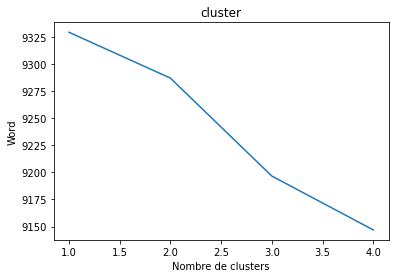

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(1,5),wcc)
plt.title('cluster')
plt.xlabel('Nombre de clusters')
plt.ylabel('Word')
plt.show()

### instantiation 

In [54]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1) 
kmeans.fit(res)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_init=20, n_jobs=1)

In [57]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("\n")
    print("cluster %d:" % i),
    for ind in order_centroids[i, :22]:
        print(' %s' % terms[ind]),
    print



cluster 0:
 instruction
 devenant
 dmmeixjnbm
 k60lmkmhrp
 lâchent
 cimetière
 forro
 clinton
 gk7gw75dpo
 devoirs
 gf9bsvbs4h
 gar
 expriment
 jbzvirwk5o
 plastic
 damas
 pronos
 aminés
 inside
 plantent
 q3
 hague


cluster 1:
 asrlqiovbs
 europhobe
 bürki
 hébergeurs
 3820
 instruction
 awdag34vmp
 puts
 cxdl5zs5h9
 bceu43uddf
 admission
 phbutxyfth
 potentielle
 prolonge
 camion
 a2khlavnae
 glaoui
 consultation
 contrôle
 controle
 contributeur
 contrairement


cluster 2:
 europhobe
 asrlqiovbs
 gf9bsvbs4h
 gk7gw75dpo
 plantent
 cimetière
 lcvr
 damas
 devoirs
 plastic
 clinton
 consultation
 oppbtp
 instruction
 ppawaxzzy4
 gar
 730ob9h97l
 7wkinuzwac
 devenant
 chroniqueur
 numéros
 paper


cluster 3:
 notoriété
 confondes
 législateurs
 instruction
 clinton
 gf9bsvbs4h
 mcconnell
 asrlqiovbs
 europhobe
 conflits
 expriment
 publiquement
 préconisée
 proportions
 gk7gw75dpo
 notons
 notourisme
 mario
 i5dtw4yuvv
 0g7npzg7al
 laniña
 ayaa_hdkk


cluster 4:
 cimetière
 gar
 euro

***k_means avec k=20 :***

In [48]:

from sklearn.cluster import KMeans
wcc = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(res)
    wcc.append(kmeans.inertia_)


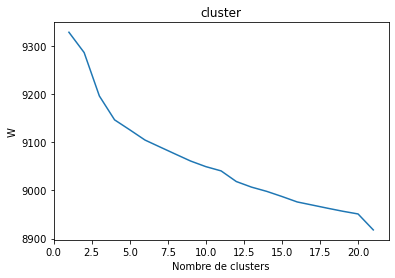

In [49]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),wcc)
plt.title('cluster')
plt.xlabel('Nombre de clusters')
plt.ylabel('Word')
plt.show()

### *les versions des packages utilisés : *

`conda install -c conda-forge watermark`

In [46]:
%load_ext watermark
%watermark --iversions

numpy  : 1.19.3
nltk   : 3.5
pandas : 1.1.3
re     : 2.2.1
twitter: 3.5
tweepy : 3.9.0

